In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
beijing_aq_plus_met = pd.read_csv('tmp_beijing_aq_plus_met.csv.gz')
beijing_stations = pd.read_csv('tmp_beijing_stations.csv.gz')

In [4]:
beijing_aq_plus_met.head(2)

time  station_id   longitude   latitude  PM25_Concentration  \
0  2014-05-01 00:00:00        1001  116.173553  40.090679               138.0   
1  2014-05-01 00:00:00        1002  116.205310  40.003950                89.0   

   PM10_Concentration  NO2_Concentration  CO_Concentration  O3_Concentration  \
0               159.4               56.3               0.9              50.8   
1               132.9               30.5               0.8              96.5   

   SO2_Concentration  weather  temperature  pressure  humidity  wind_speed  \
0               17.2      0.0         20.0    1004.0      56.0        7.92   
1                7.6      0.0         20.0    1004.0      56.0        7.92   

   wind_direction  
0            13.0  
1            13.0

In [5]:
test1 =  beijing_aq_plus_met.drop(["station_id","time", "longitude",	"latitude", "weather",	"temperature", "pressure",	"humidity",	"wind_speed",	"wind_direction"], axis = 1)
test1.head(2)

PM25_Concentration  PM10_Concentration  NO2_Concentration  \
0               138.0               159.4               56.3   
1                89.0               132.9               30.5   

   CO_Concentration  O3_Concentration  SO2_Concentration  
0               0.9              50.8               17.2  
1               0.8              96.5                7.6

                    PM25_Concentration  PM10_Concentration  NO2_Concentration  \
PM25_Concentration            1.000000            0.802688           0.585237   
PM10_Concentration            0.802688            1.000000           0.512767   
NO2_Concentration             0.585237            0.512767           1.000000   
CO_Concentration              0.775585            0.587526           0.624442   
O3_Concentration             -0.183389           -0.126455          -0.491799   
SO2_Concentration             0.494055            0.386572           0.467628   

                    CO_Concentration  O3_Concentration  SO2_Concentration  
PM25_Concentration          0.775585         -0.183389           0.494055  
PM10_Concentration          0.587526         -0.126455           0.386572  
NO2_Concentration           0.624442         -0.491799           0.467628  
CO_Concentration            1.000000         -0.329075           0.591859  
O3_Concentration           -0.329075          1.0000

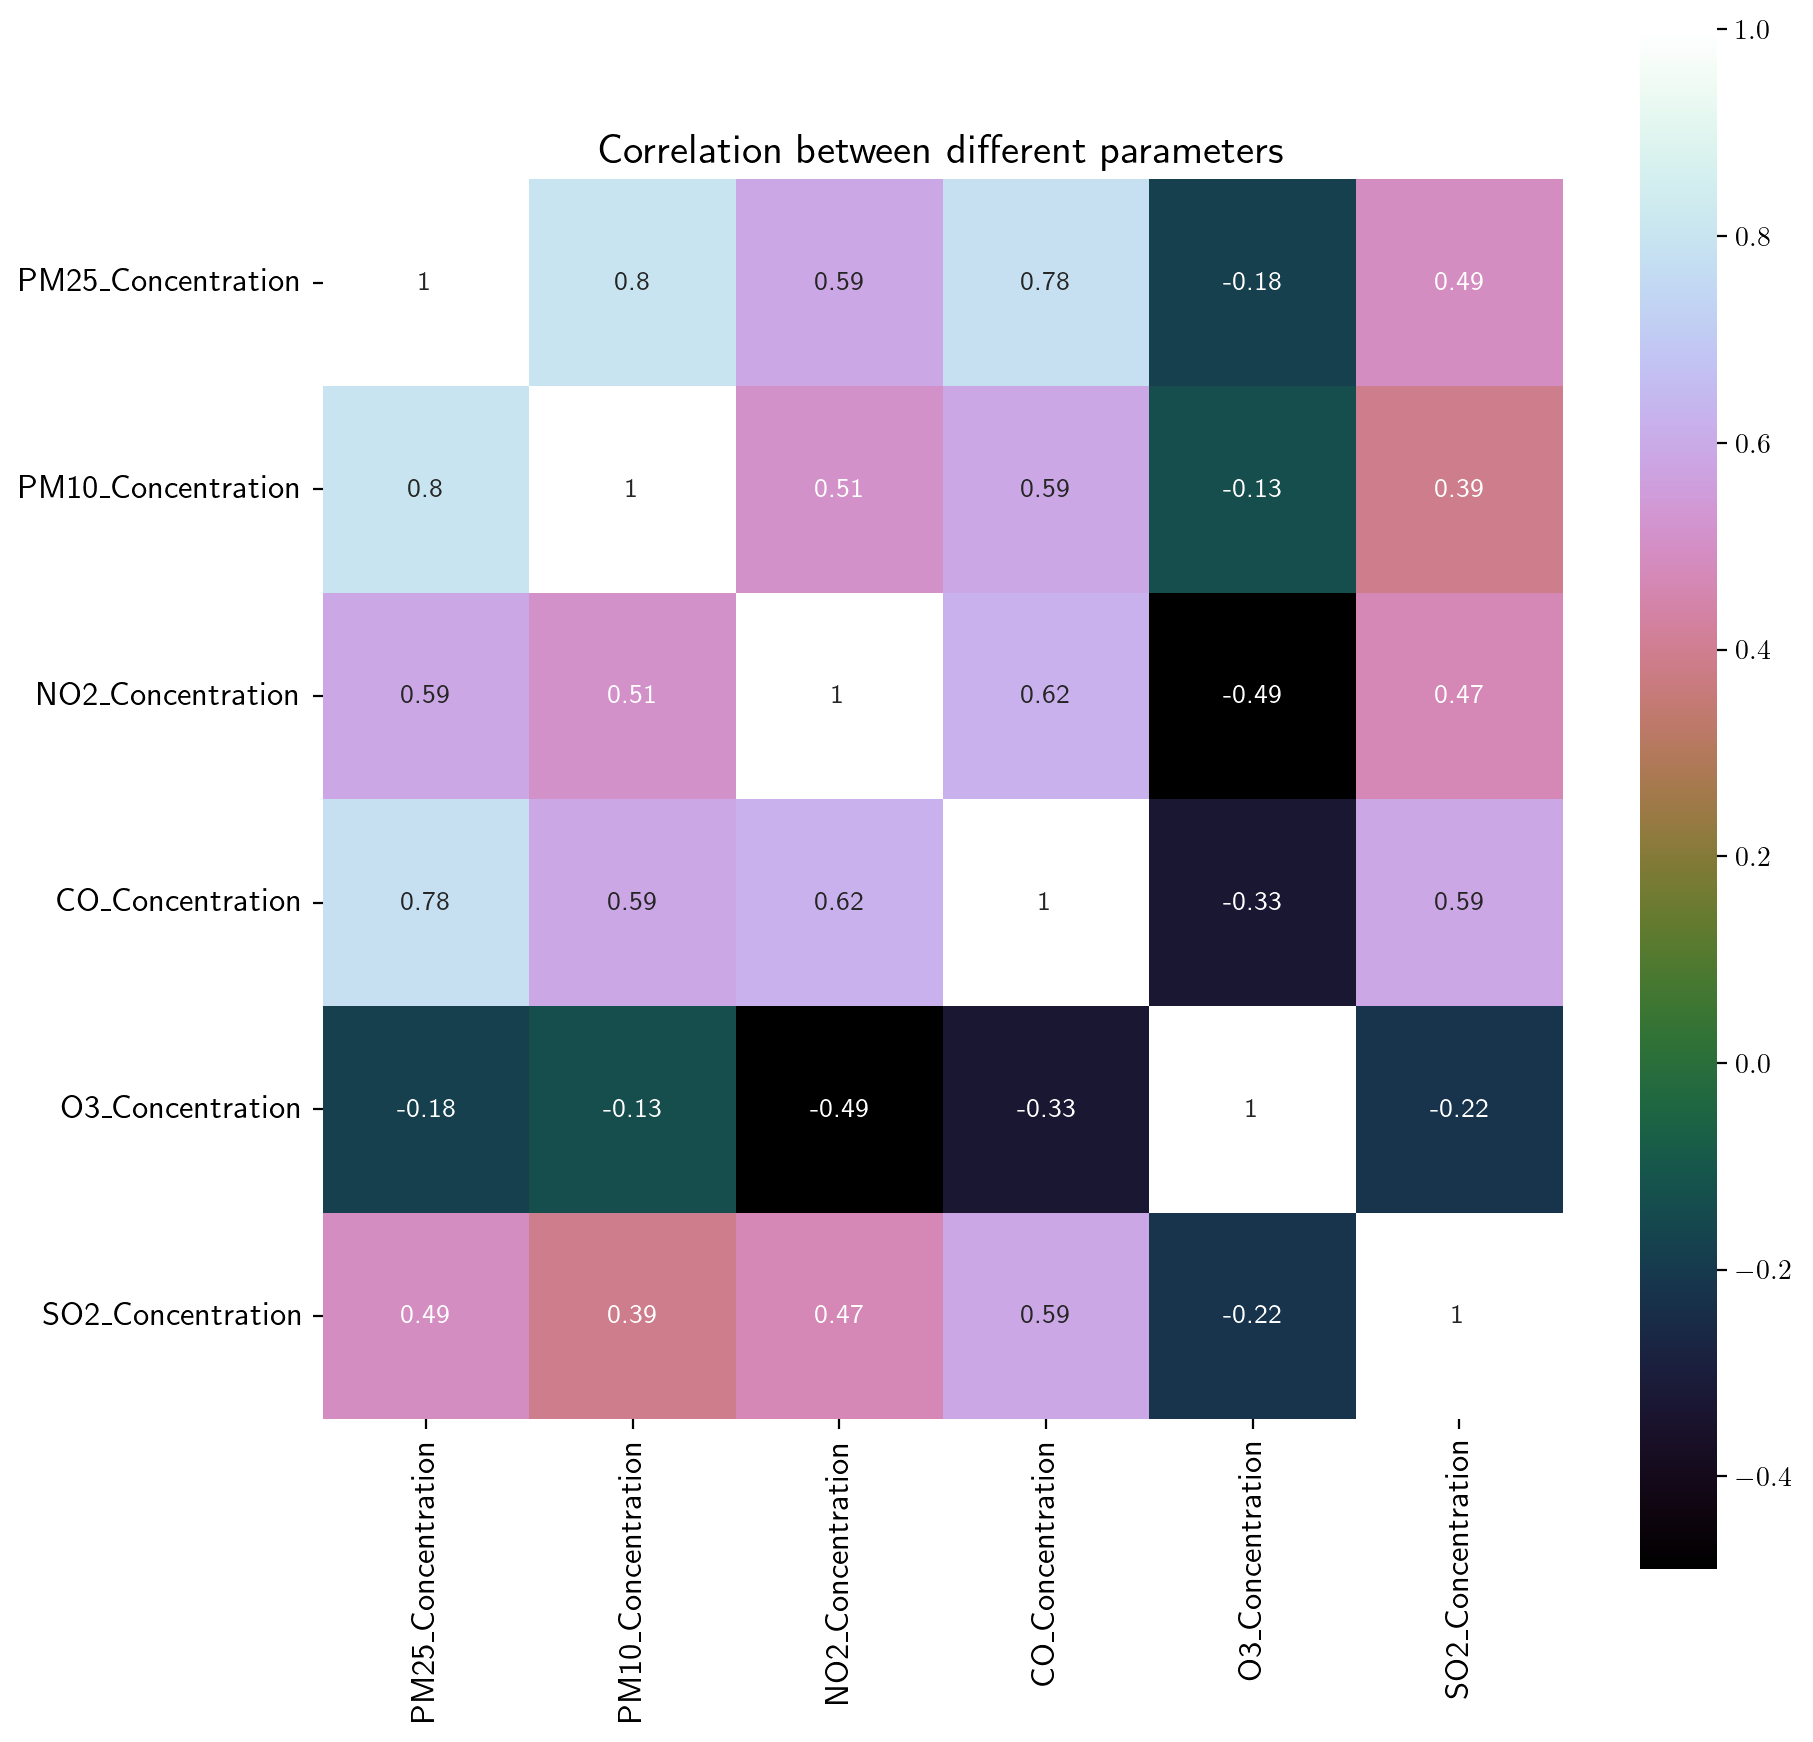

pandas.core.frame.DataFrame

In [6]:
import seaborn as sns
# set plt font to latex
plt.rc('text', usetex=True)
corr = pd.DataFrame(test1).corr(method ='pearson')
print(corr)
# round all numbers in corr to 2 decimals
corr = corr.round(2)
plt.figure(figsize=(10, 10))
print(0)
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix')

# Write TeX for correlation table
print(0)
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation between different parameters', fontsize=15)
plt.show()
type(corr)

### Missing data visualize

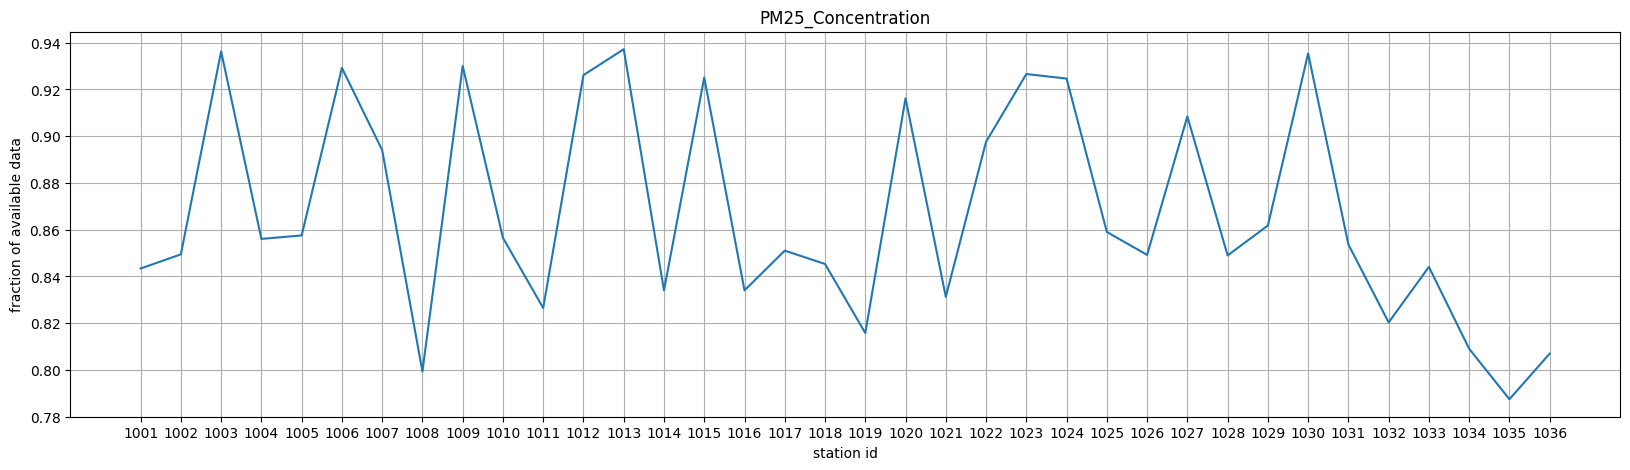

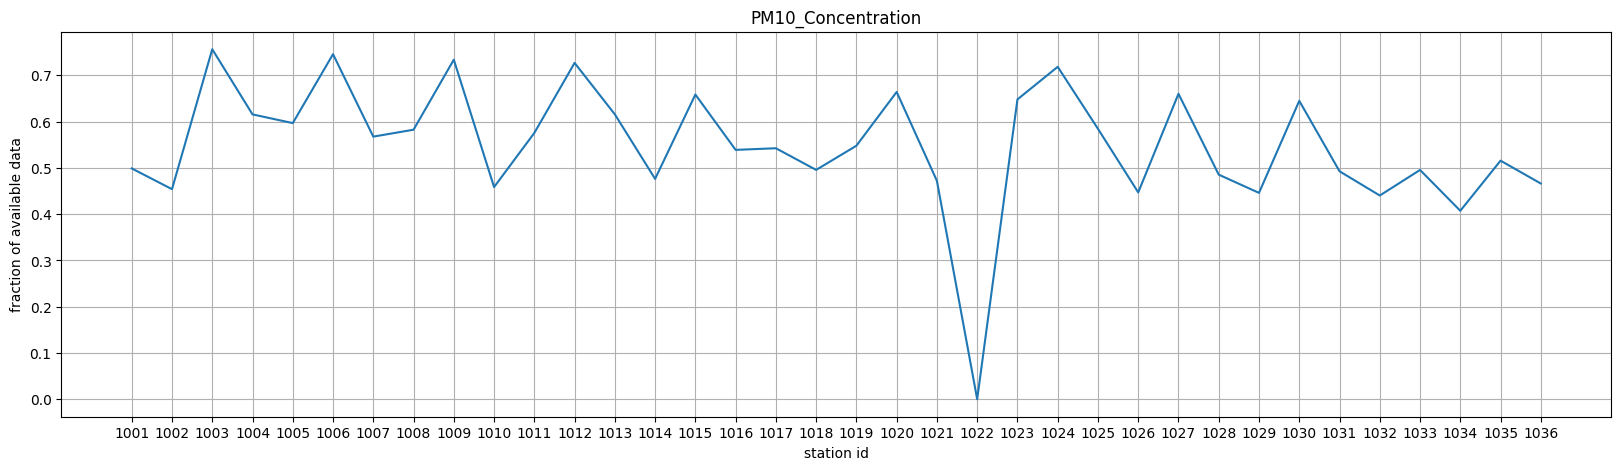

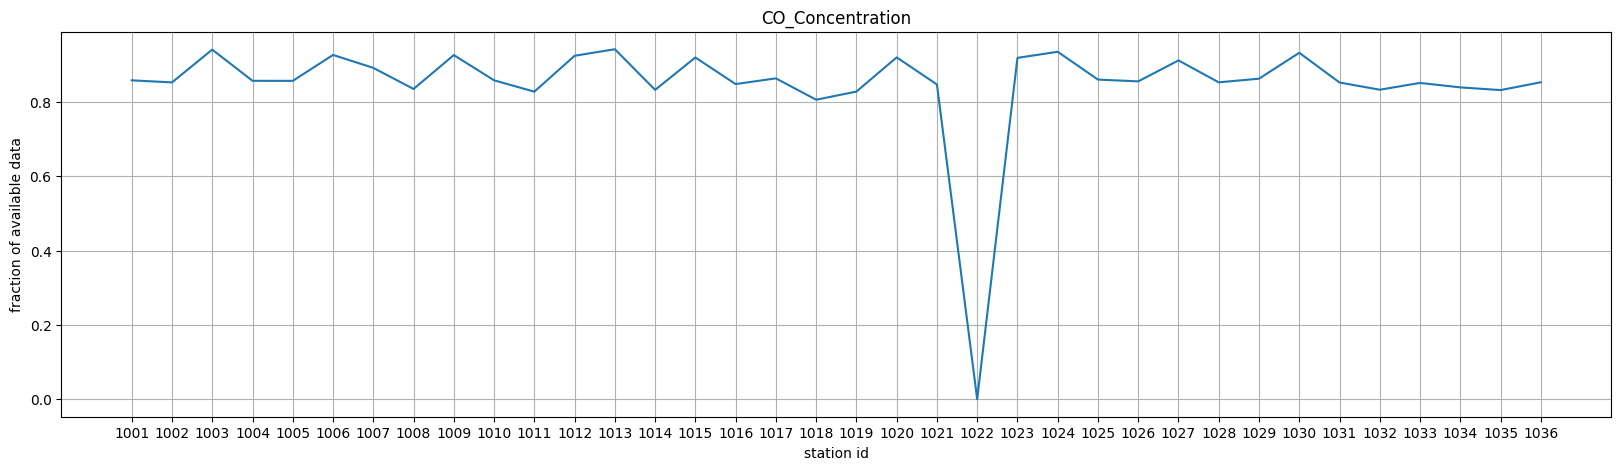

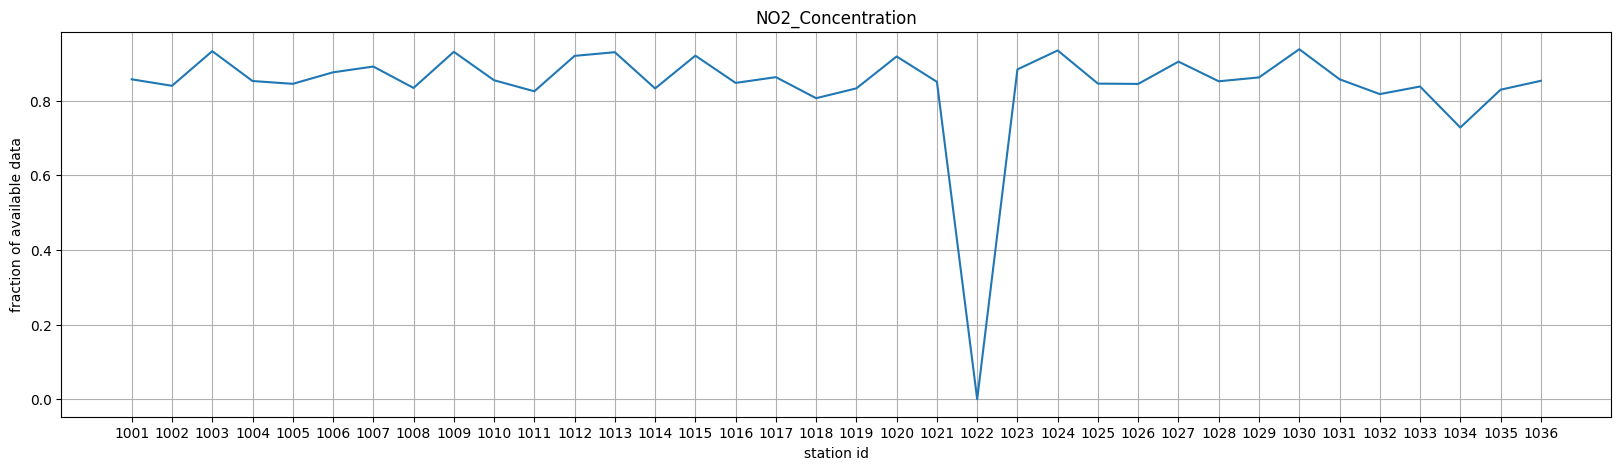

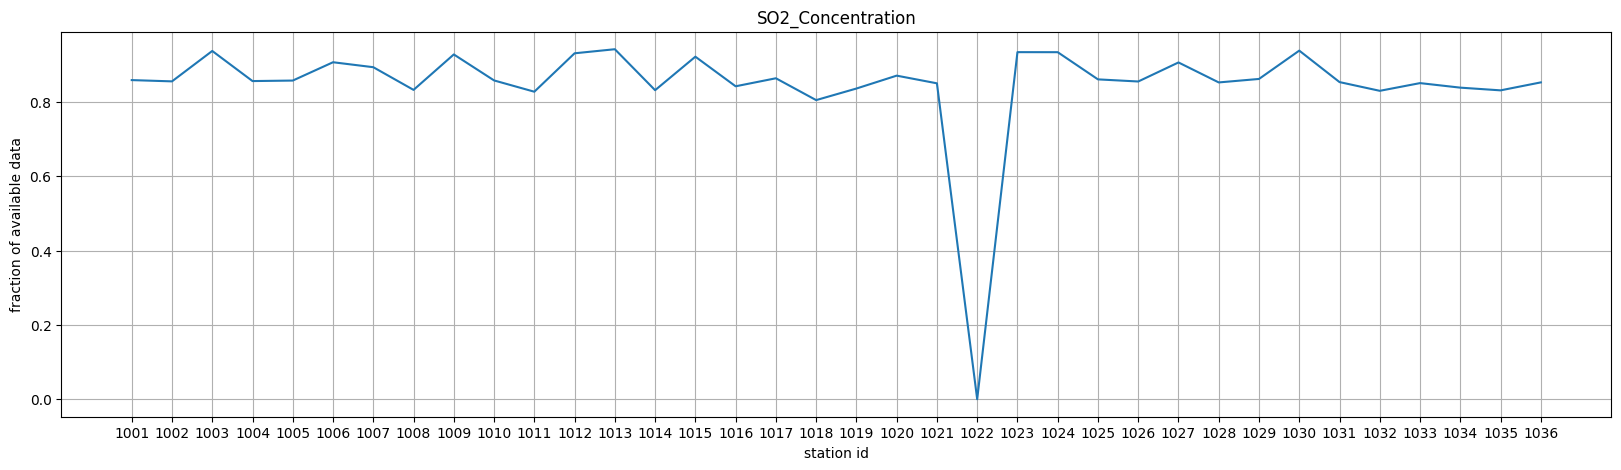

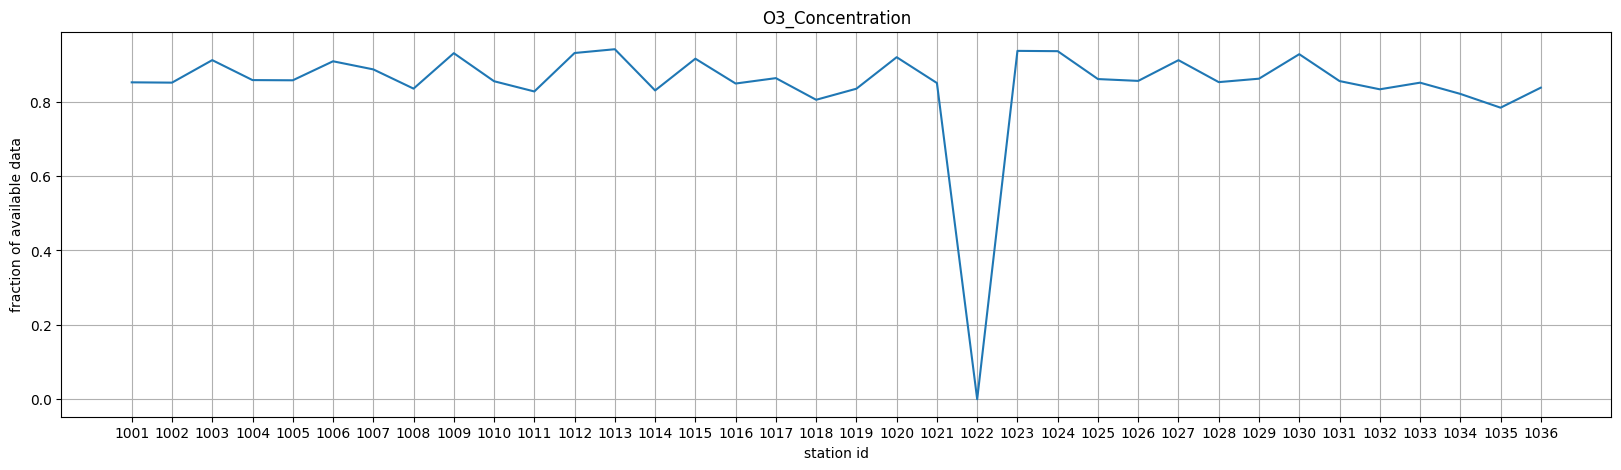

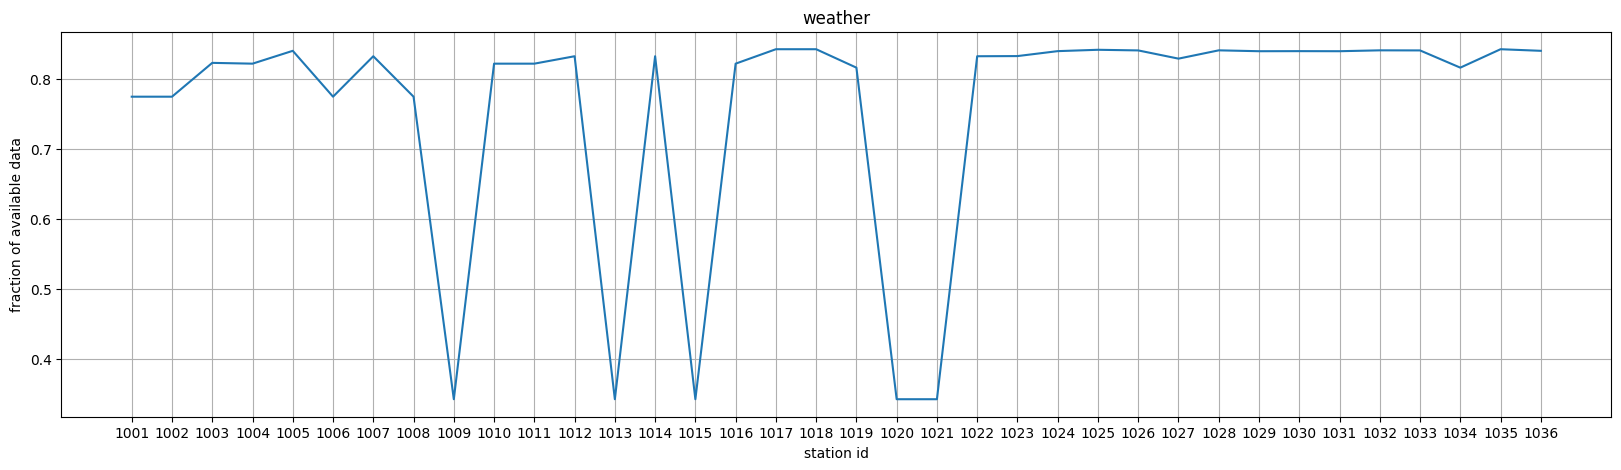

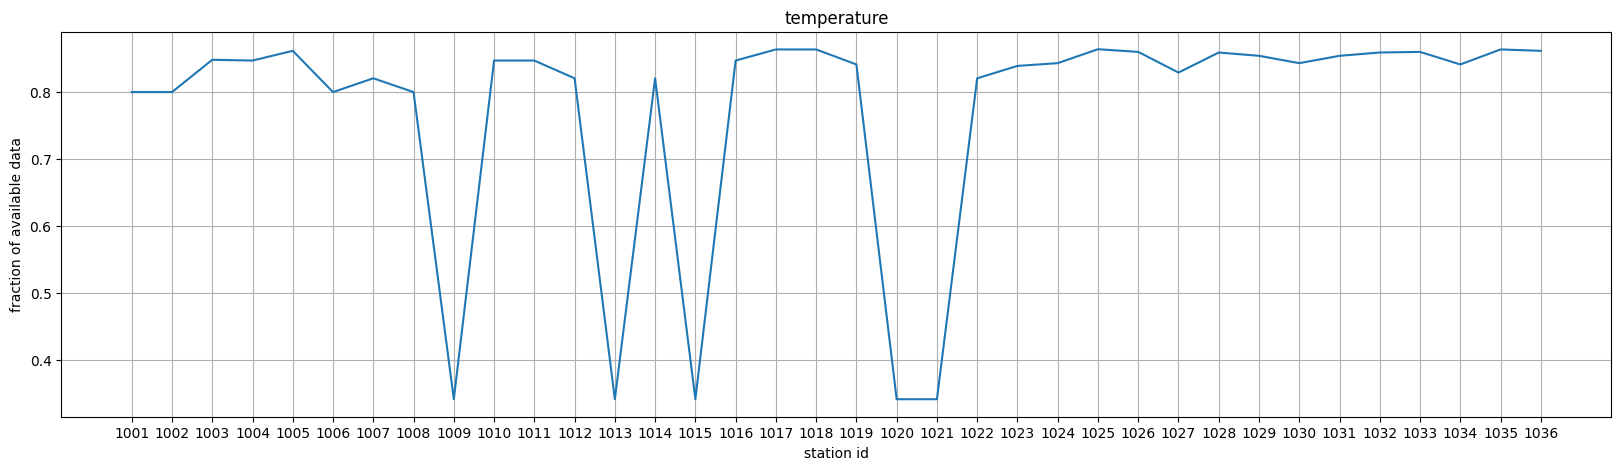

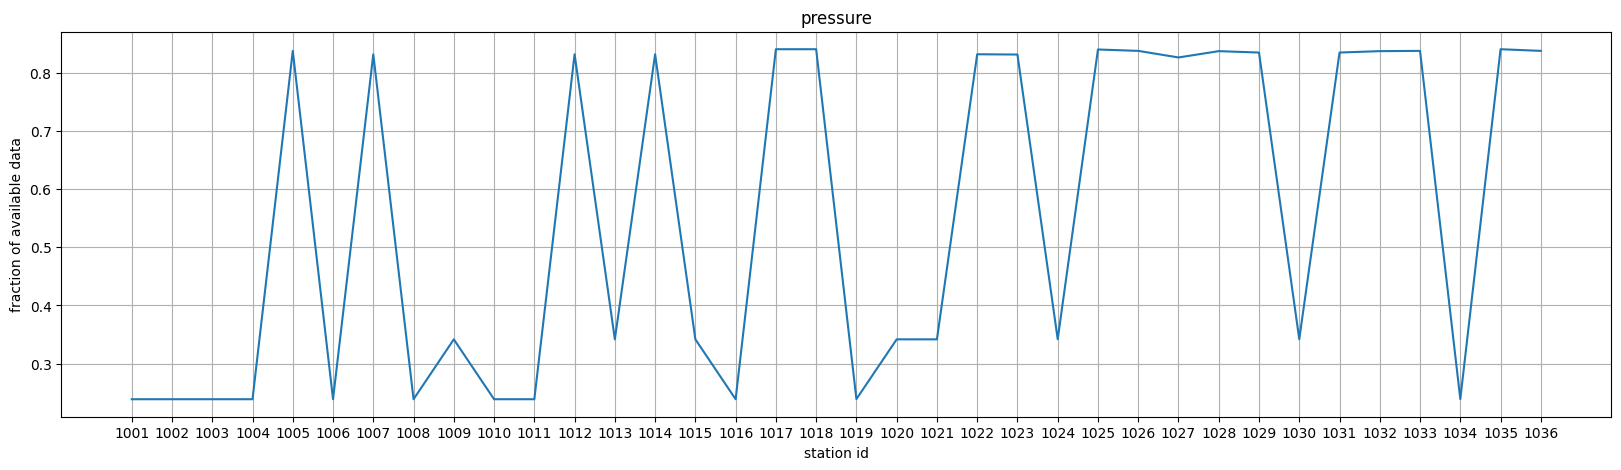

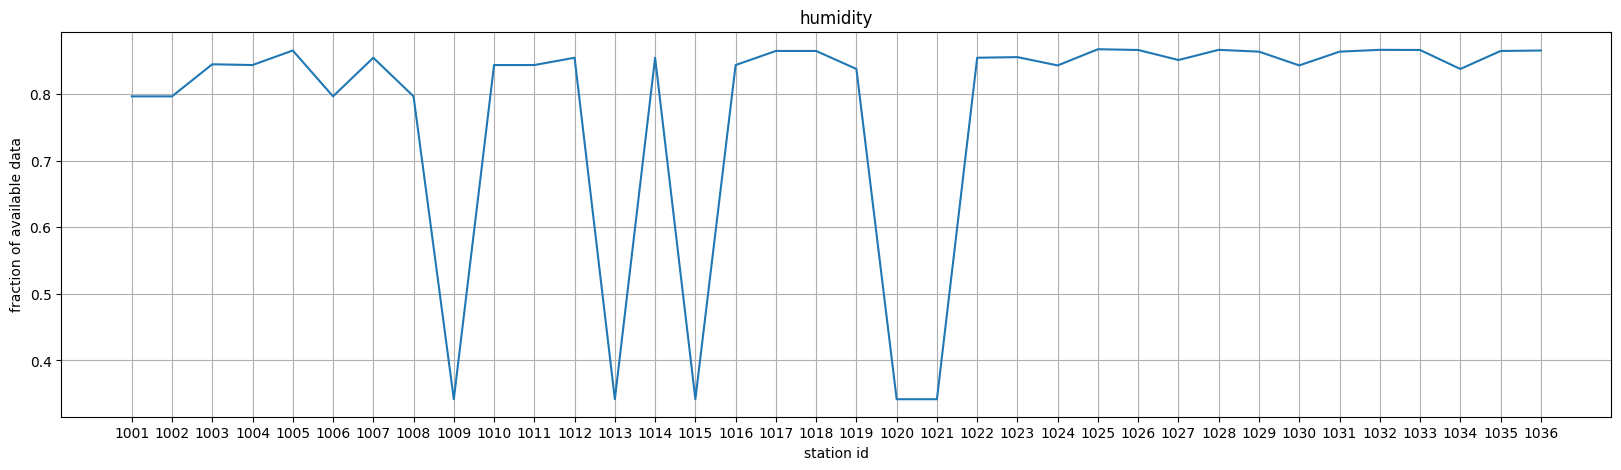

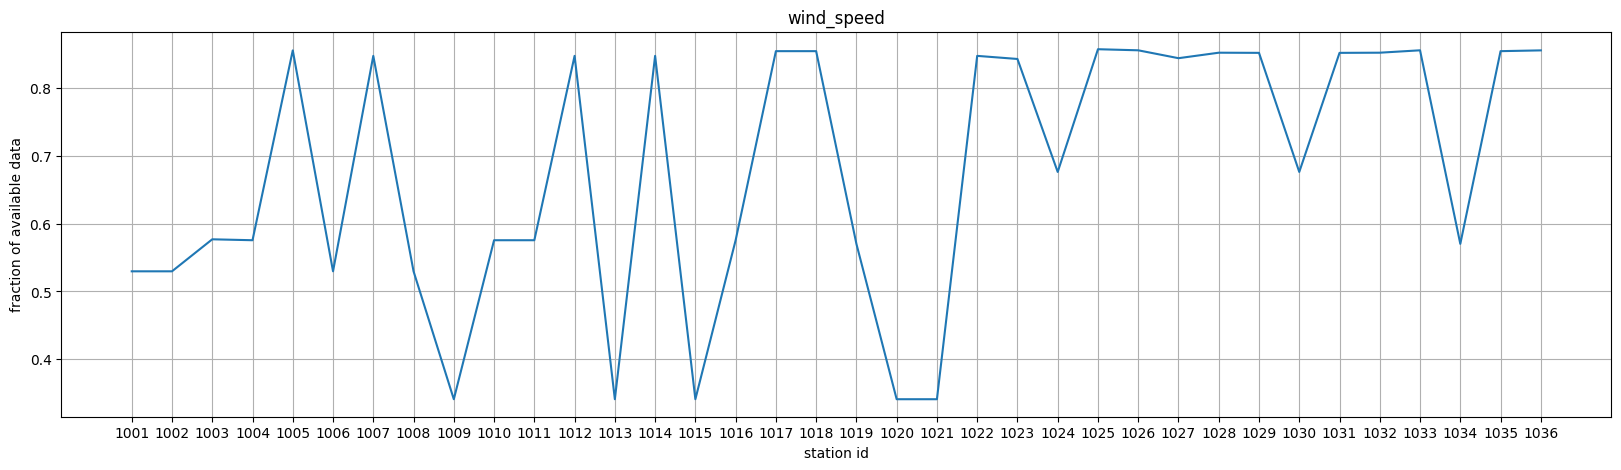

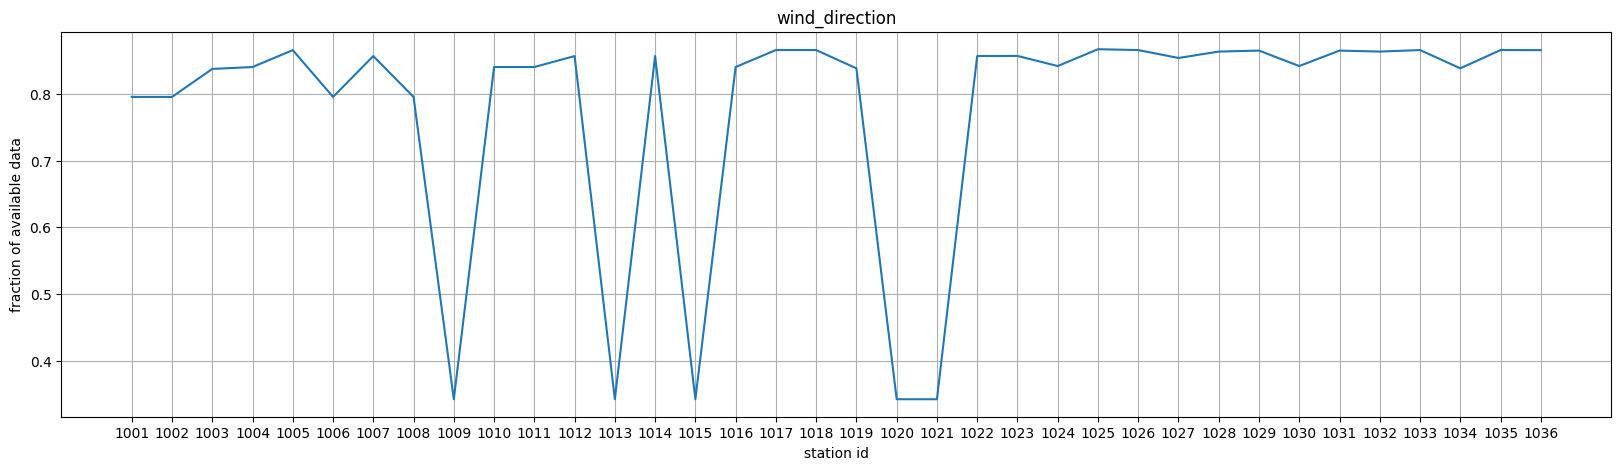

In [5]:
vars = ['PM25_Concentration','PM10_Concentration','CO_Concentration','NO2_Concentration','SO2_Concentration','O3_Concentration','weather', 'temperature', 
        'pressure', 'humidity', 'wind_speed', 'wind_direction']
for var in vars:    
    values = []
    for station in beijing_stations.station_id:
        tmp_df = beijing_aq_plus_met[beijing_aq_plus_met.station_id==station]
        tmp_df['time'] = pd.to_datetime(tmp_df['time']).values
    #     print(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
        values.append(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
    #     break
    plt.figure(figsize=(20,5));
    plt.plot(beijing_stations.station_id.values.astype(int), values);
    plt.title(var);
    plt.ylabel('fraction of available data')
    plt.xlabel('station id')
    plt.xticks(beijing_stations.station_id)
    plt.grid(True)

### Finding non-missing data

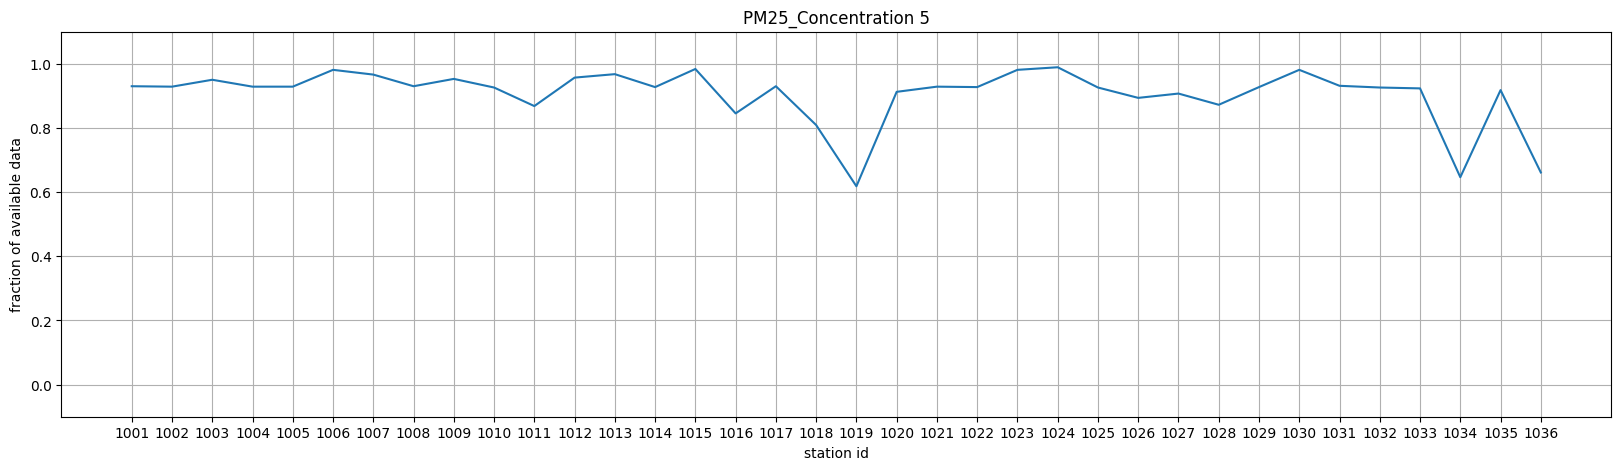

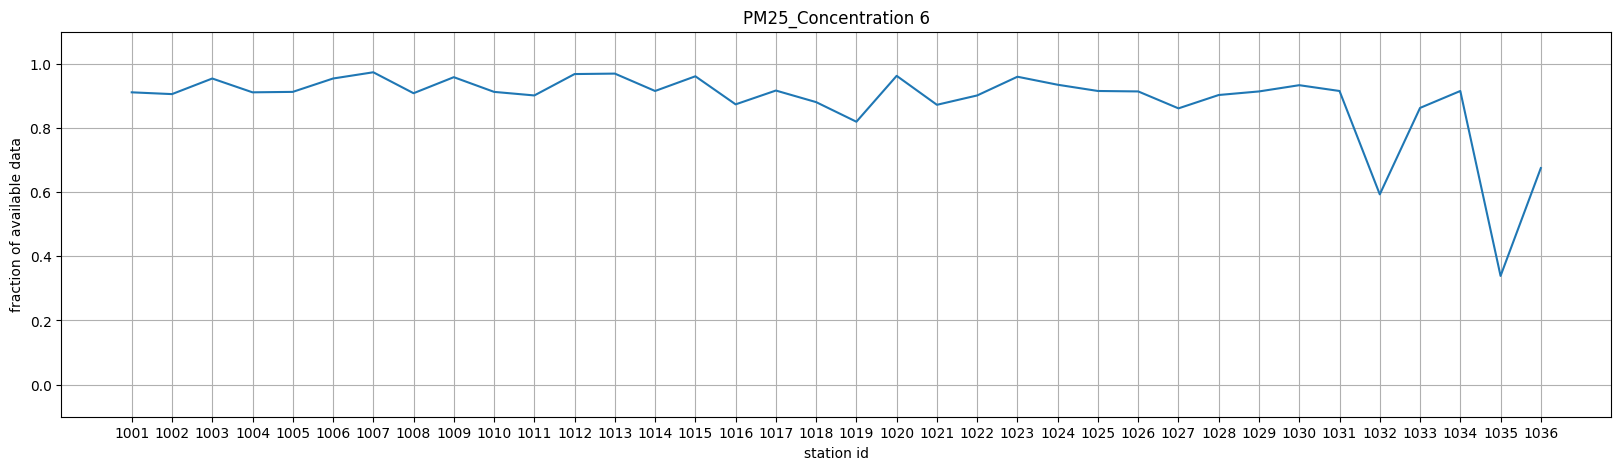

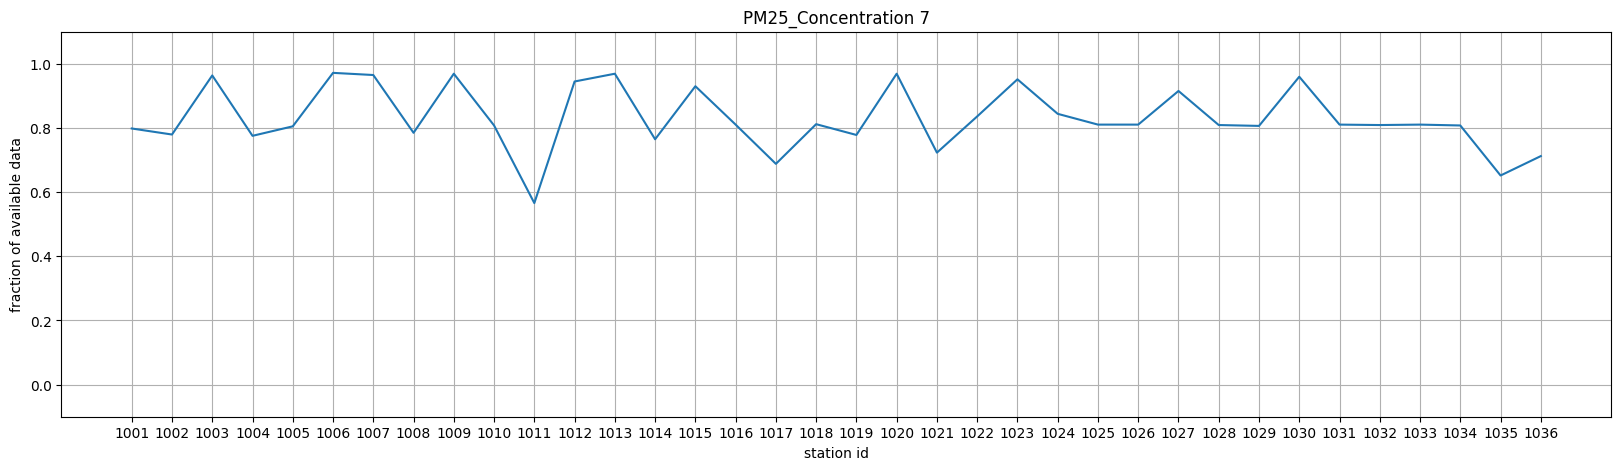

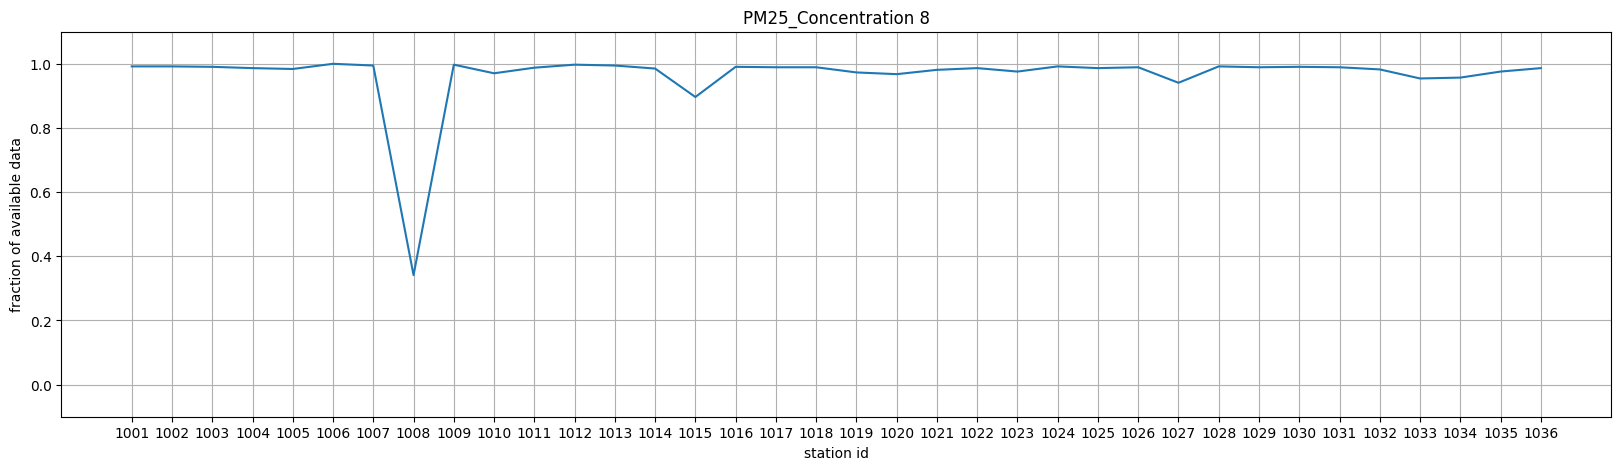

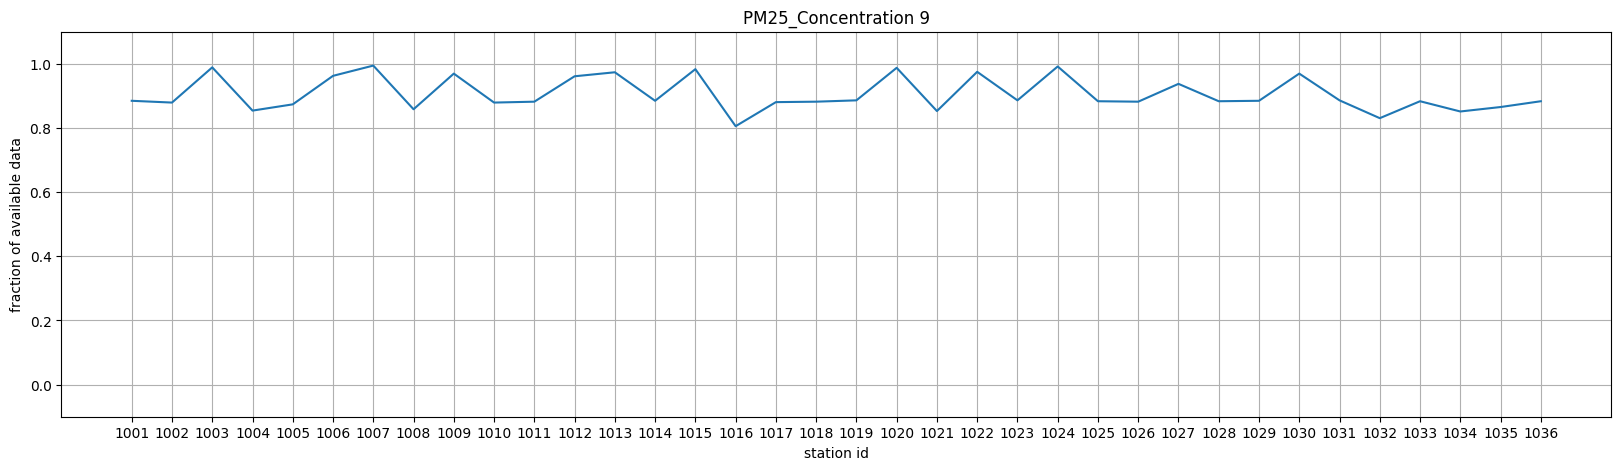

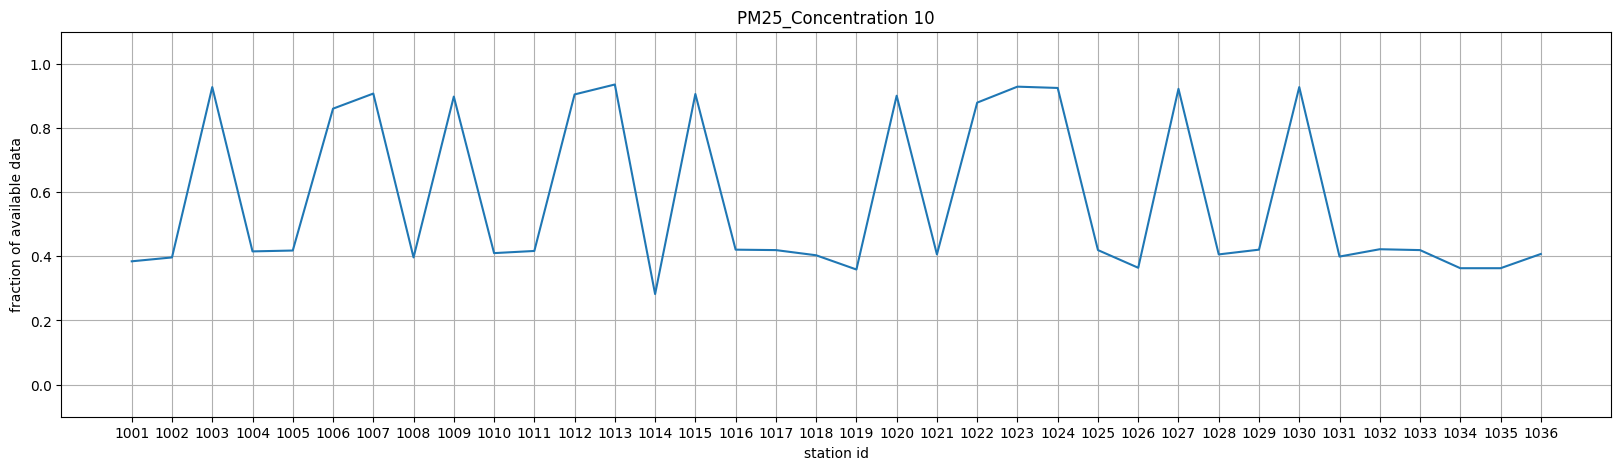

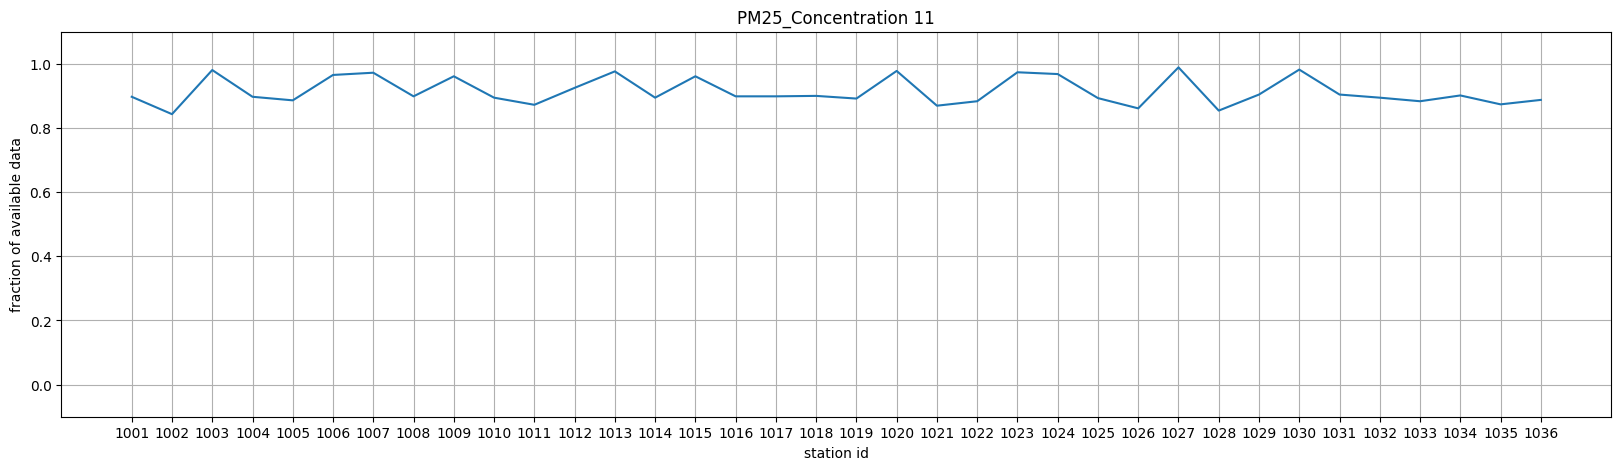

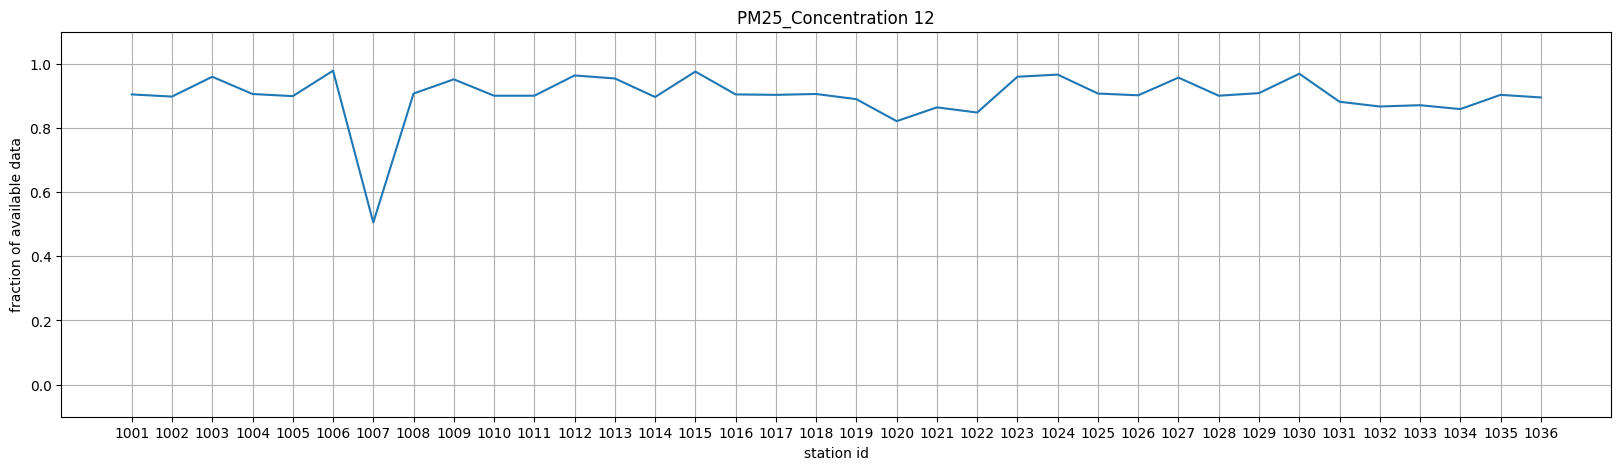

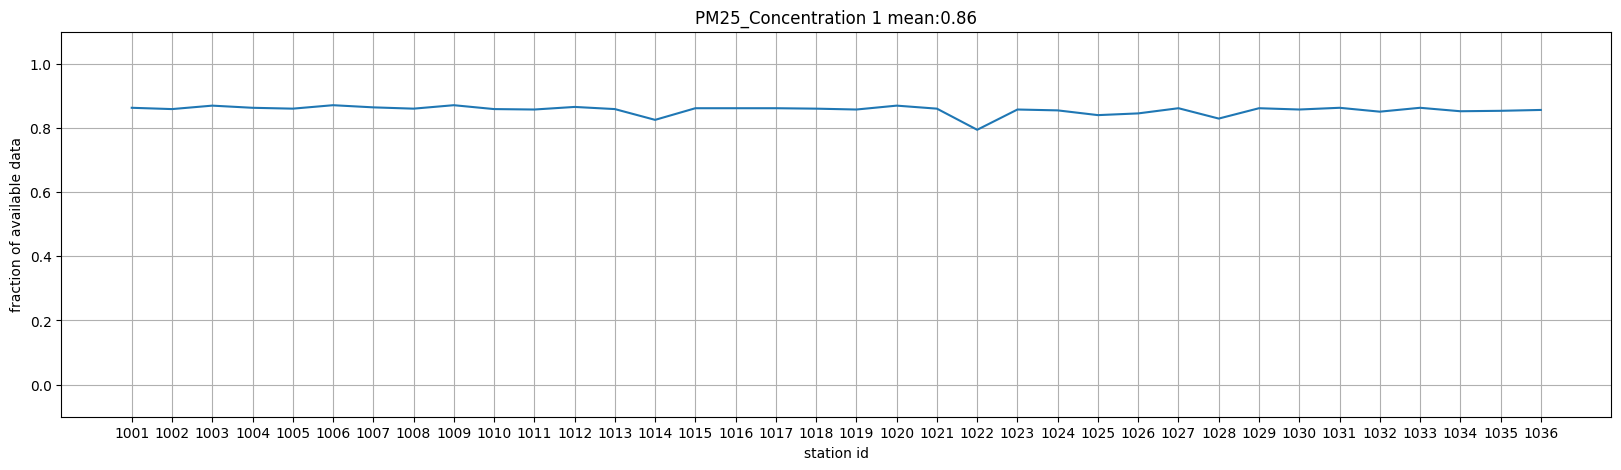

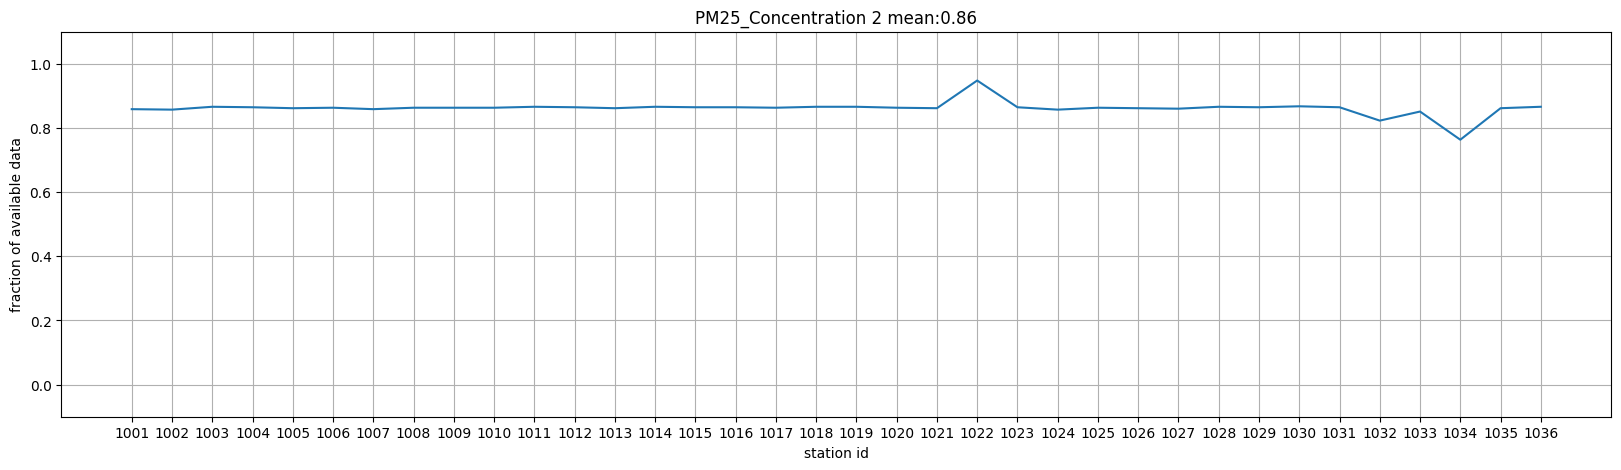

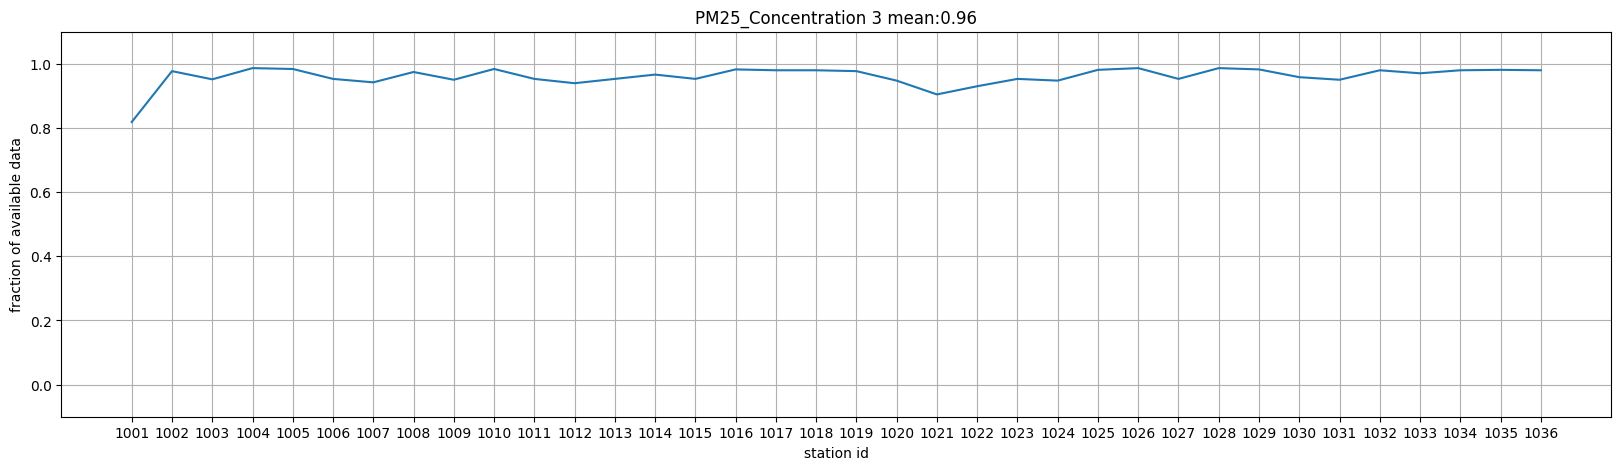

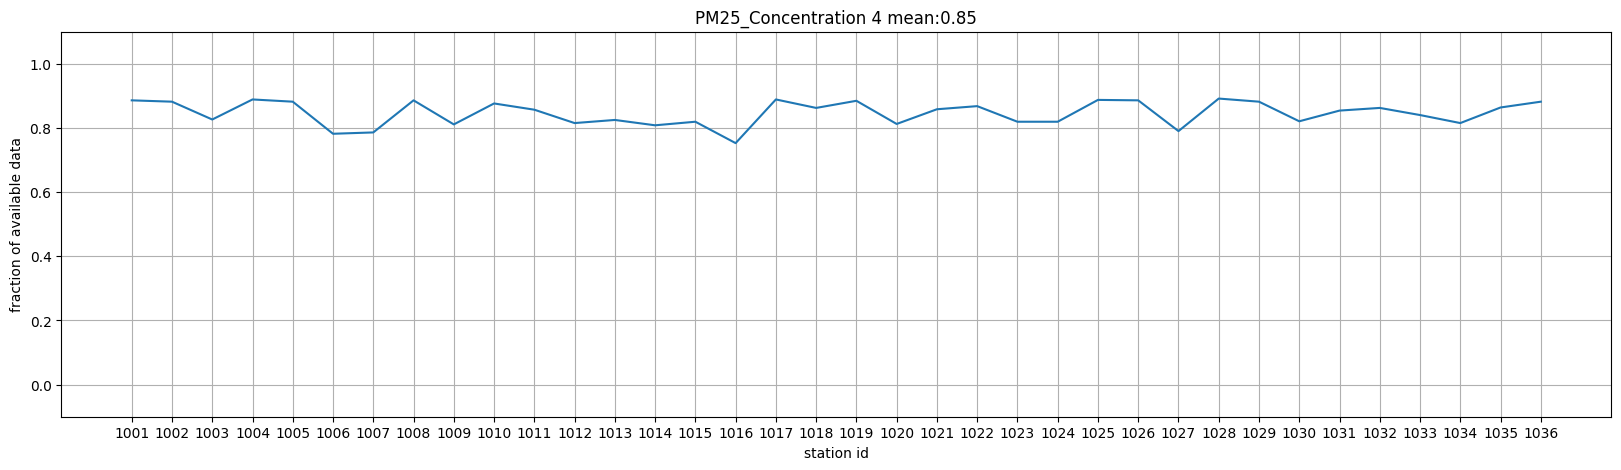

In [6]:
vars = ['PM25_Concentration']#, 'weather', 'temperature', 'pressure', 'humidity', 'wind_speed', 'wind_direction']
for var in vars:    
    for m in range(5,13):
        values = []
        for station in beijing_stations.station_id:
            tmp_df = beijing_aq_plus_met[beijing_aq_plus_met.station_id==station]
            tmp_df['time'] = pd.to_datetime(tmp_df['time']).values
            tmp_df = tmp_df.set_index('time')['2014-'+str(m).zfill(2)]
        #     print(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
            values.append(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
        #     break
        plt.figure(figsize=(20,5));
        plt.plot(beijing_stations.station_id.values.astype(int), values);
        plt.title(var+' '+str(m));
        plt.ylim(-0.1,1.1)
        plt.ylabel('fraction of available data')
        plt.xlabel('station id')
        plt.xticks(beijing_stations.station_id)
        plt.grid(True)
    for m in range(1,5):
        values = []
        for station in beijing_stations.station_id:
            tmp_df = beijing_aq_plus_met[beijing_aq_plus_met.station_id==station]
            tmp_df['time'] = pd.to_datetime(tmp_df['time']).values
            tmp_df = tmp_df.set_index('time')['2015-'+str(m).zfill(2)]
        #     print(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
            values.append(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
        #     break
        plt.figure(figsize=(20,5));
        plt.plot(beijing_stations.station_id.values.astype(int), values);
        plt.title(var+' '+str(m)+' mean:'+str(np.mean(values).round(2)));
        plt.ylim(-0.1,1.1)
        plt.ylabel('fraction of available data')
        plt.xlabel('station id')
        plt.xticks(beijing_stations.station_id)
        plt.grid(True)

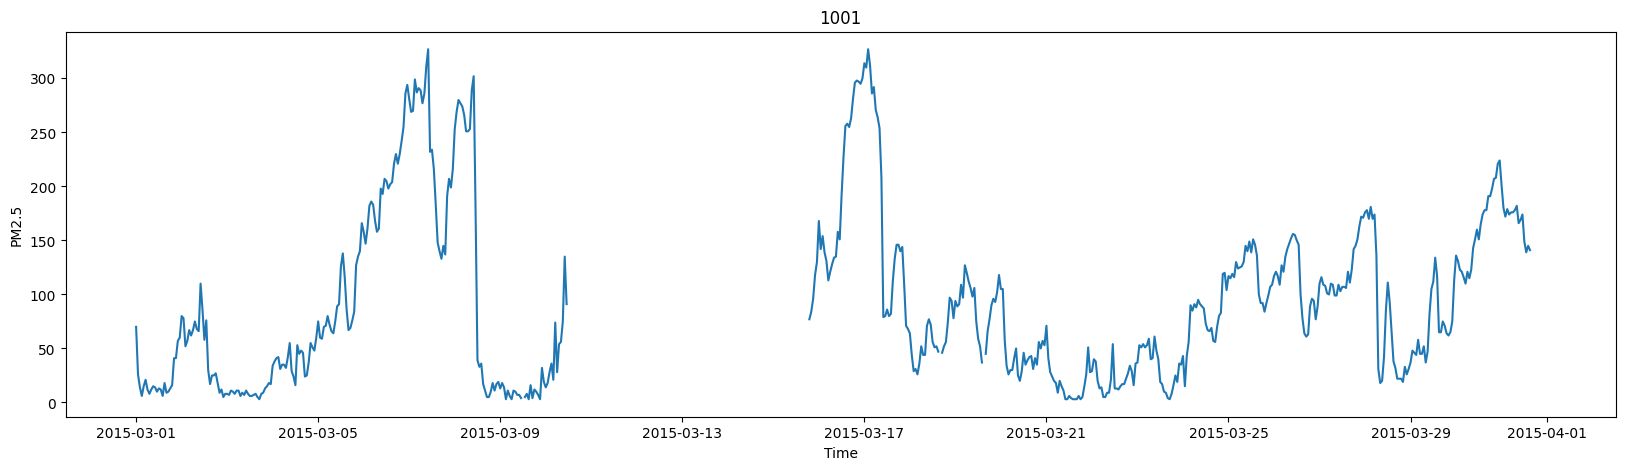

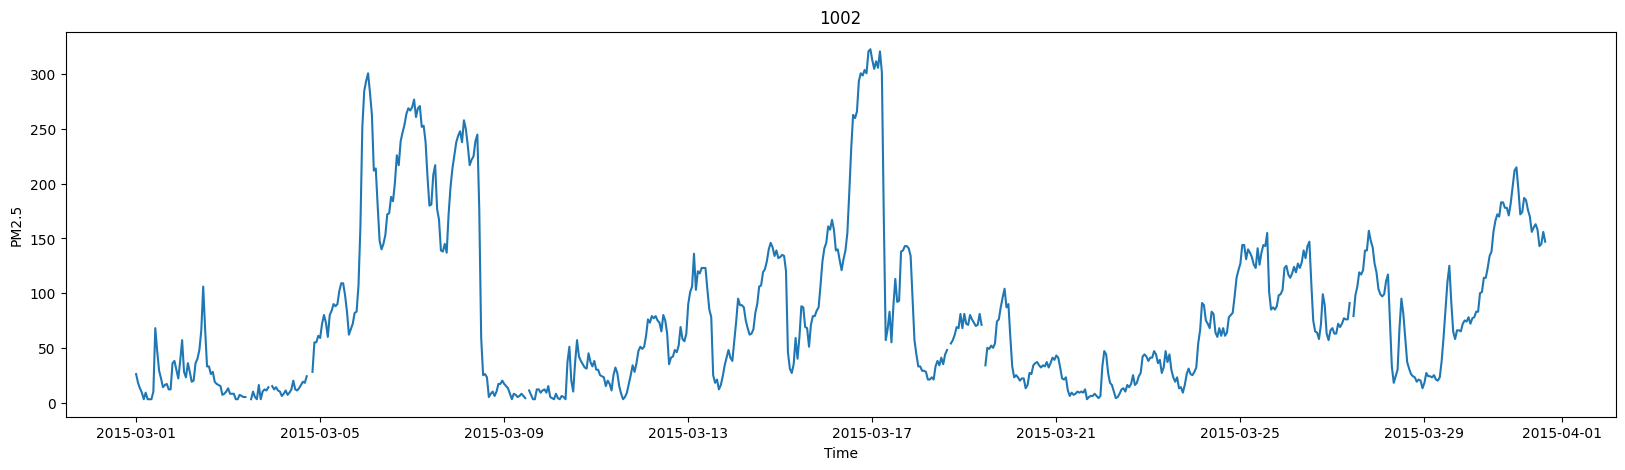

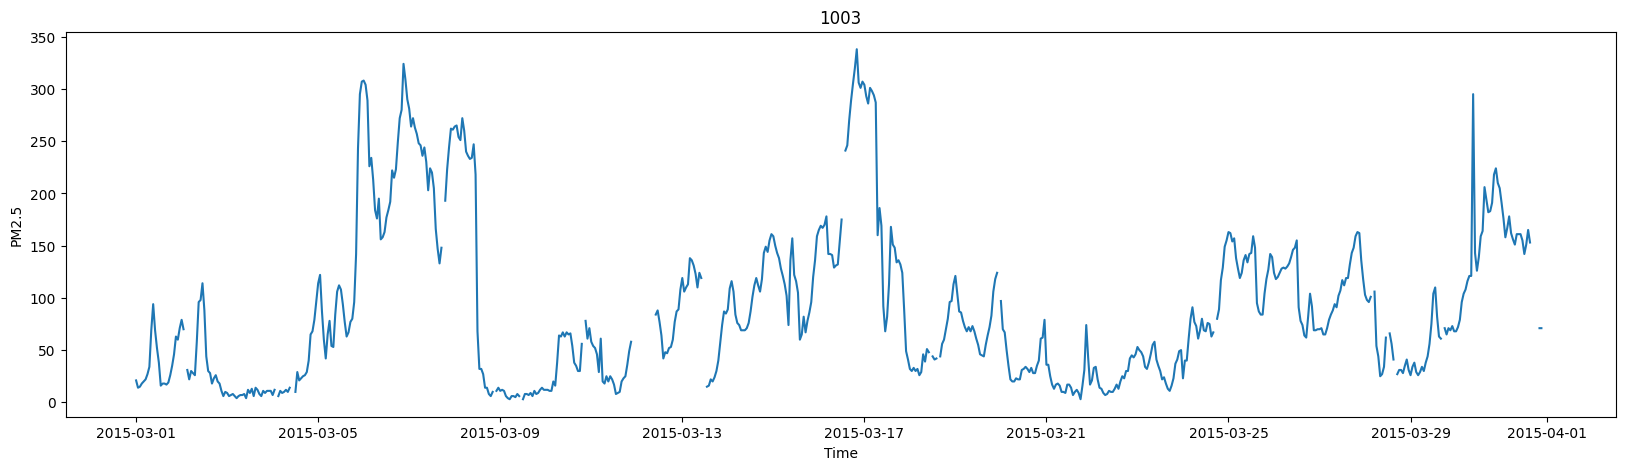

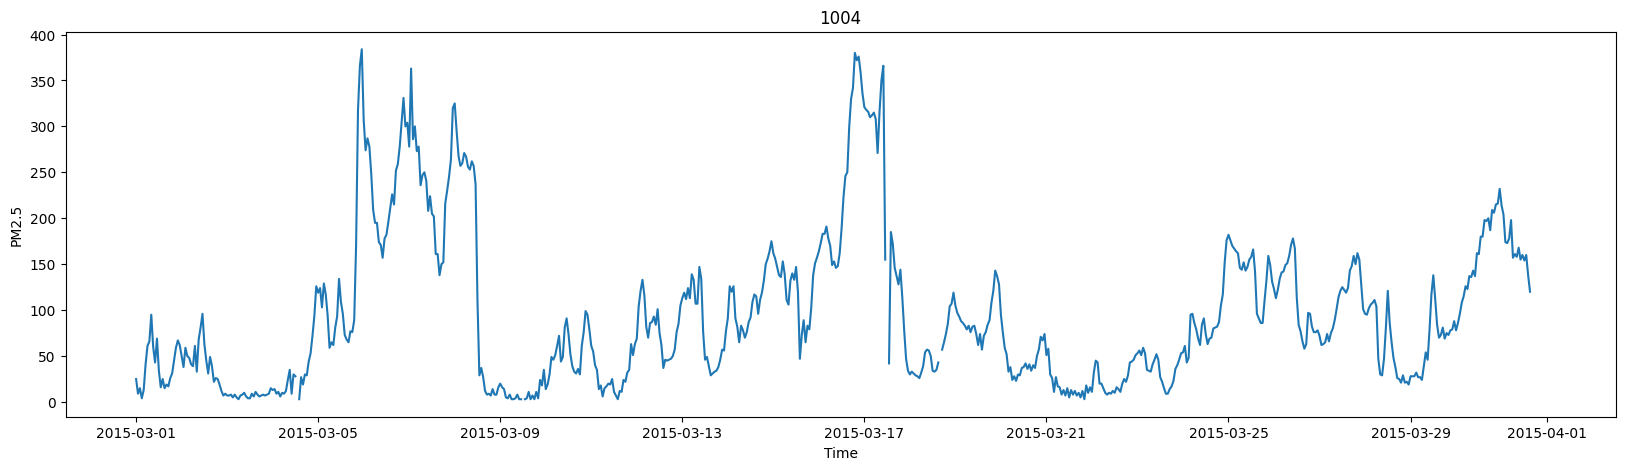

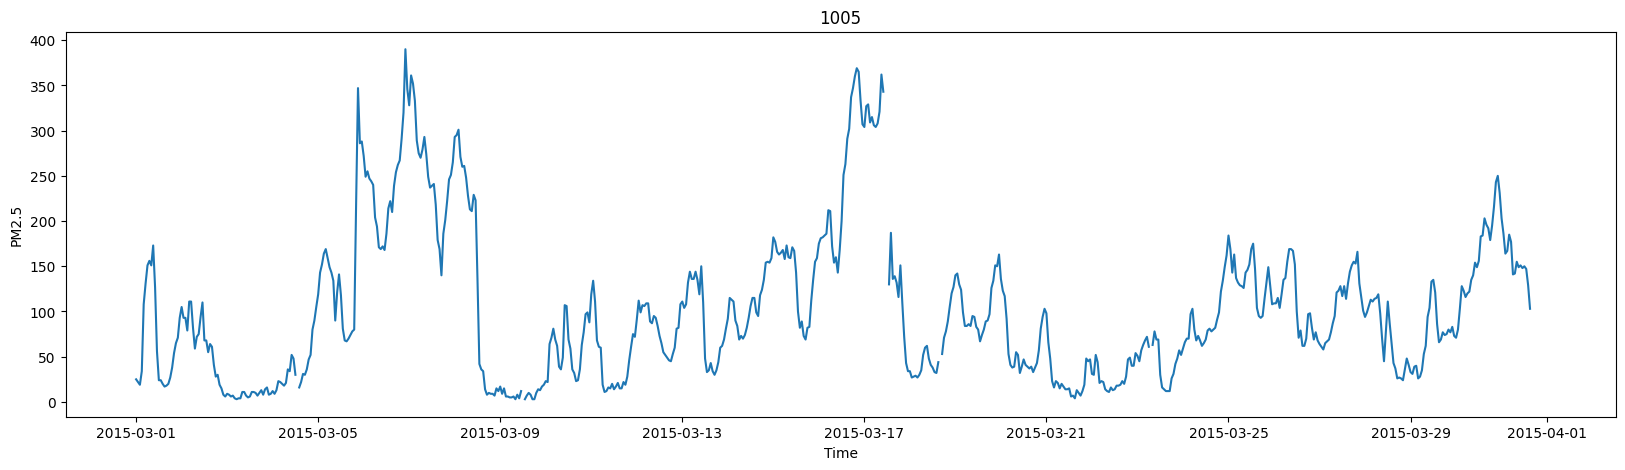

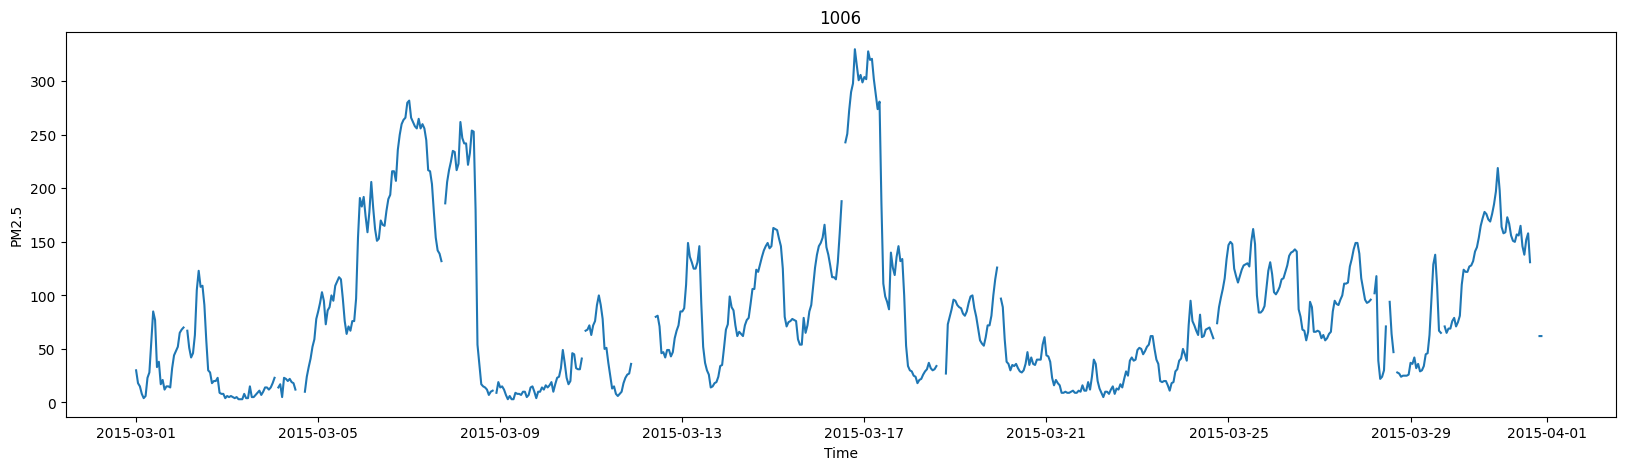

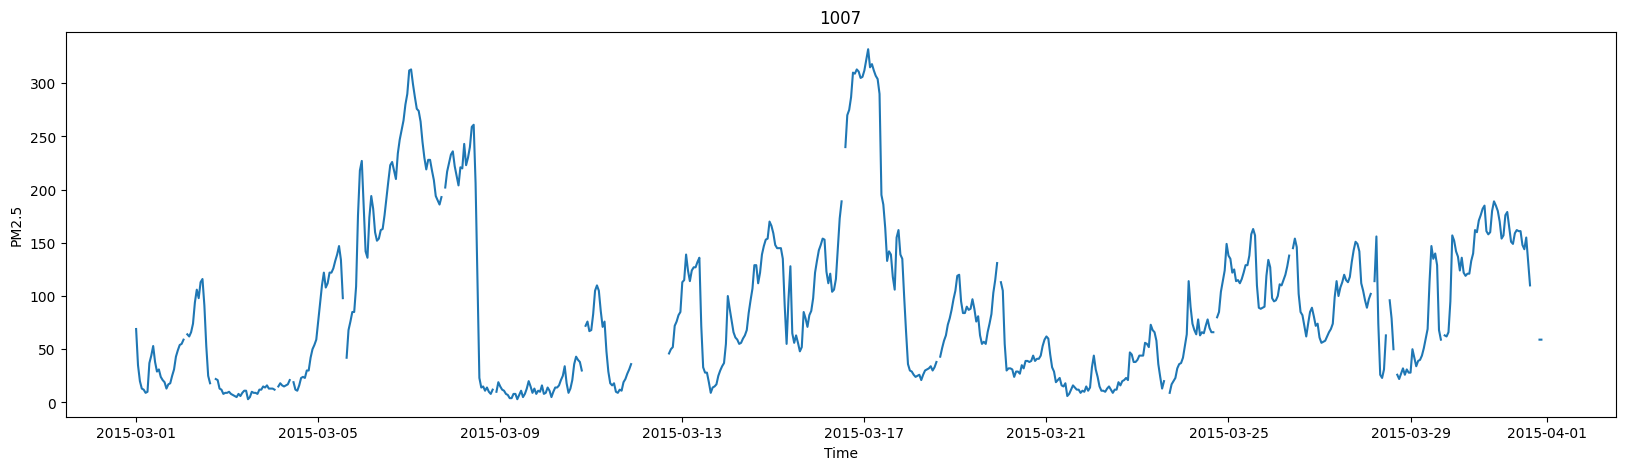

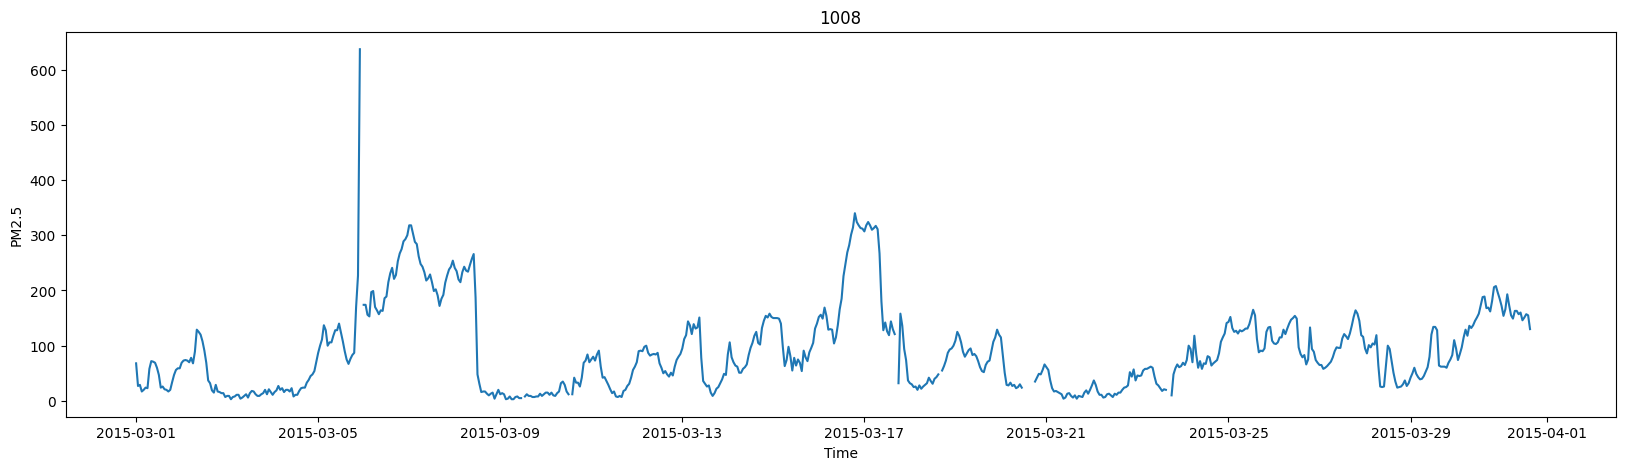

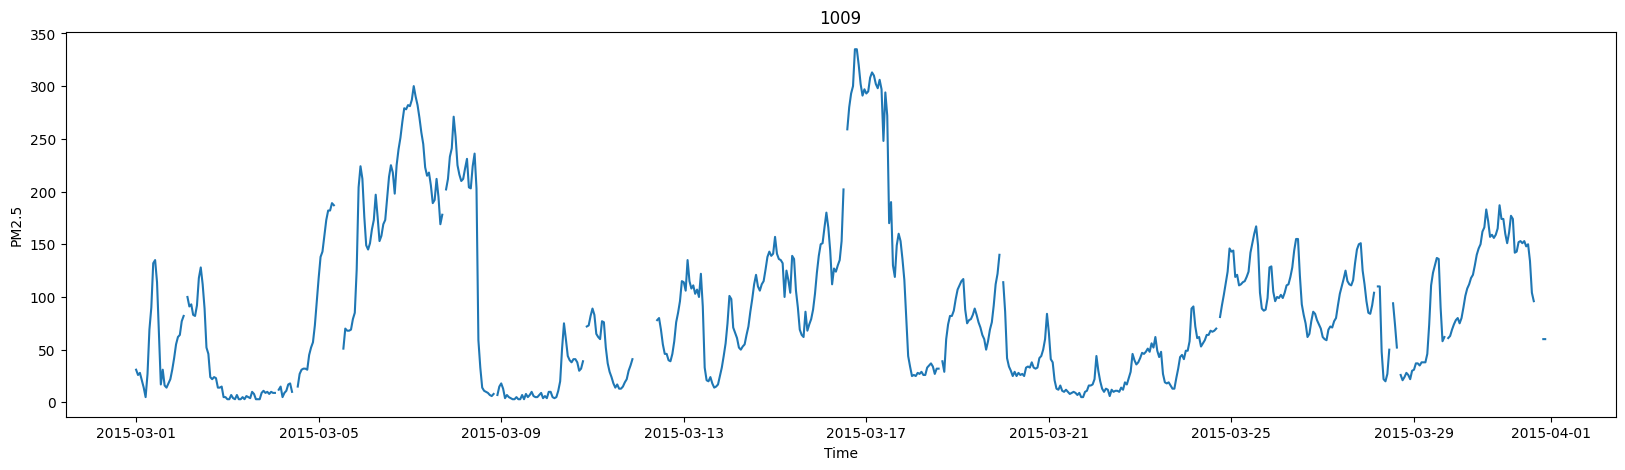

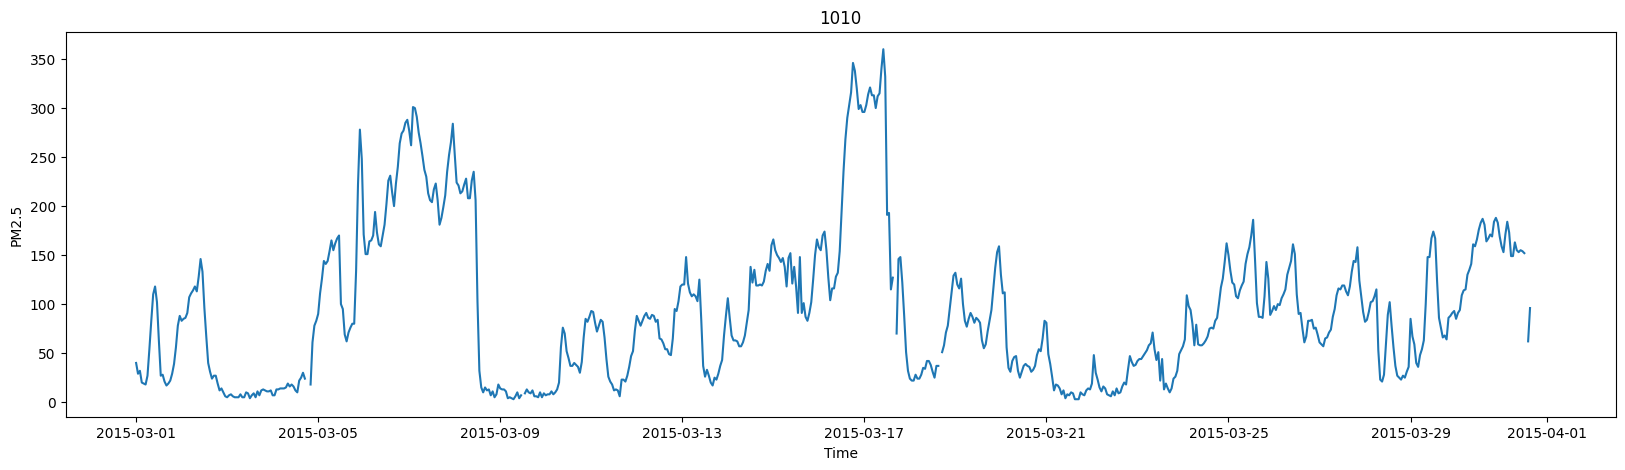

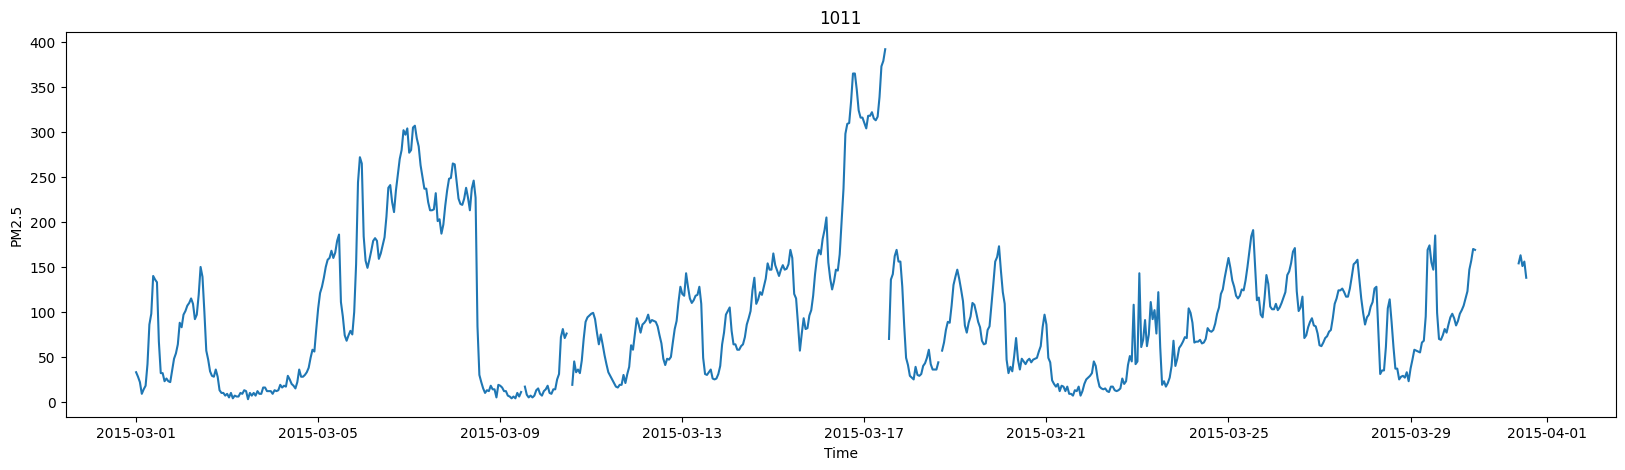

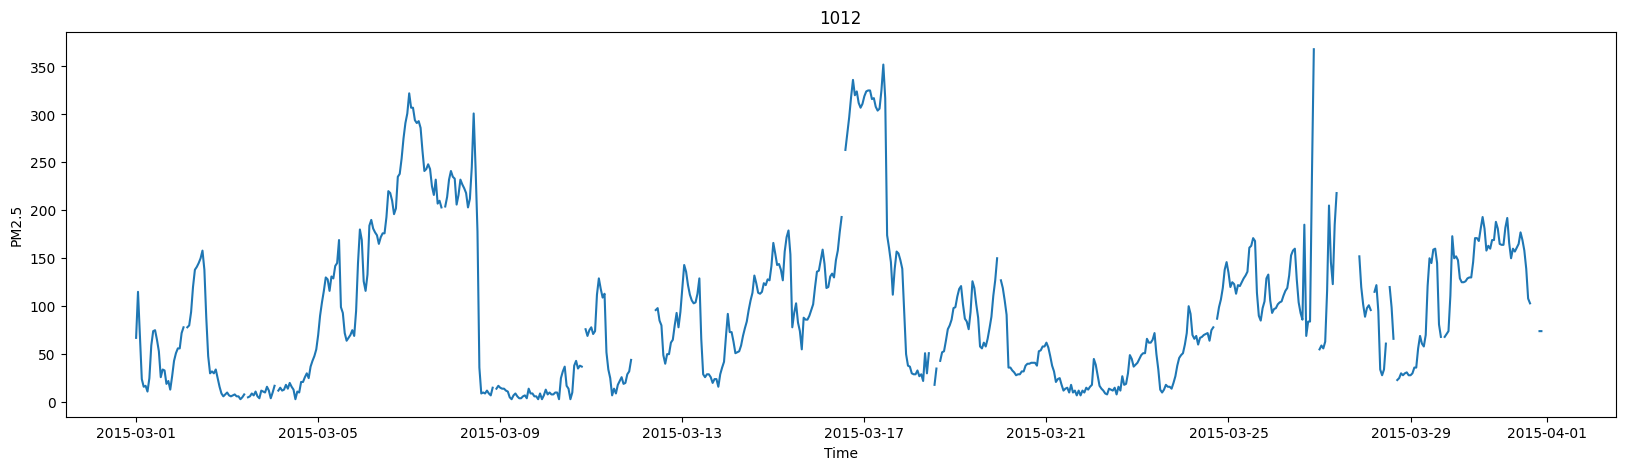

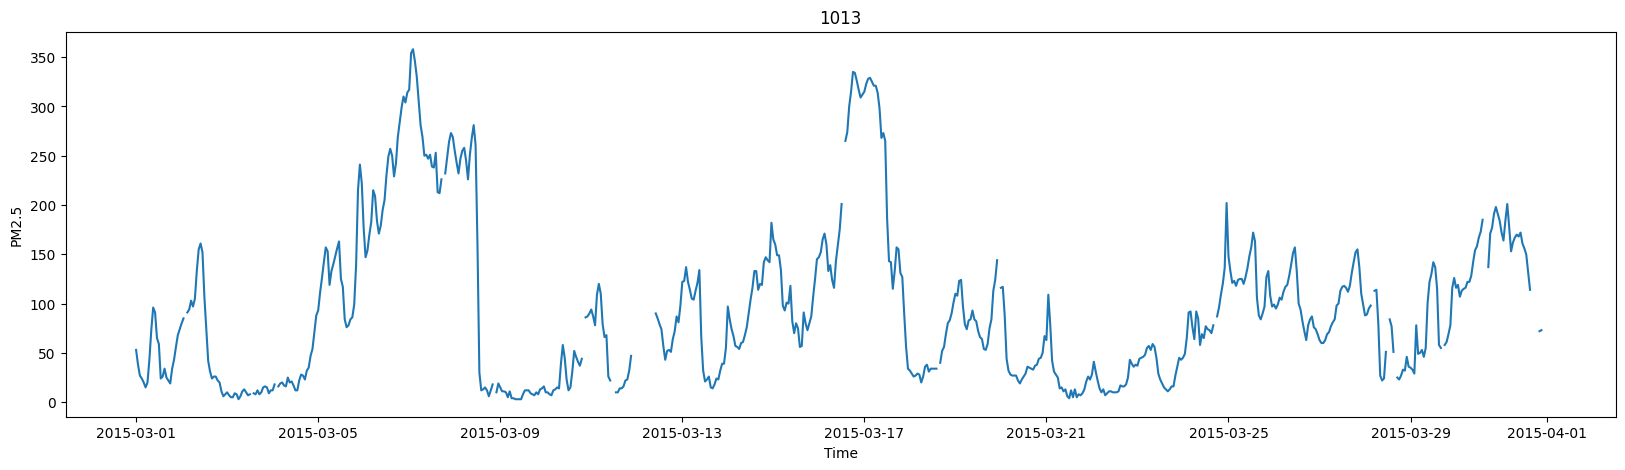

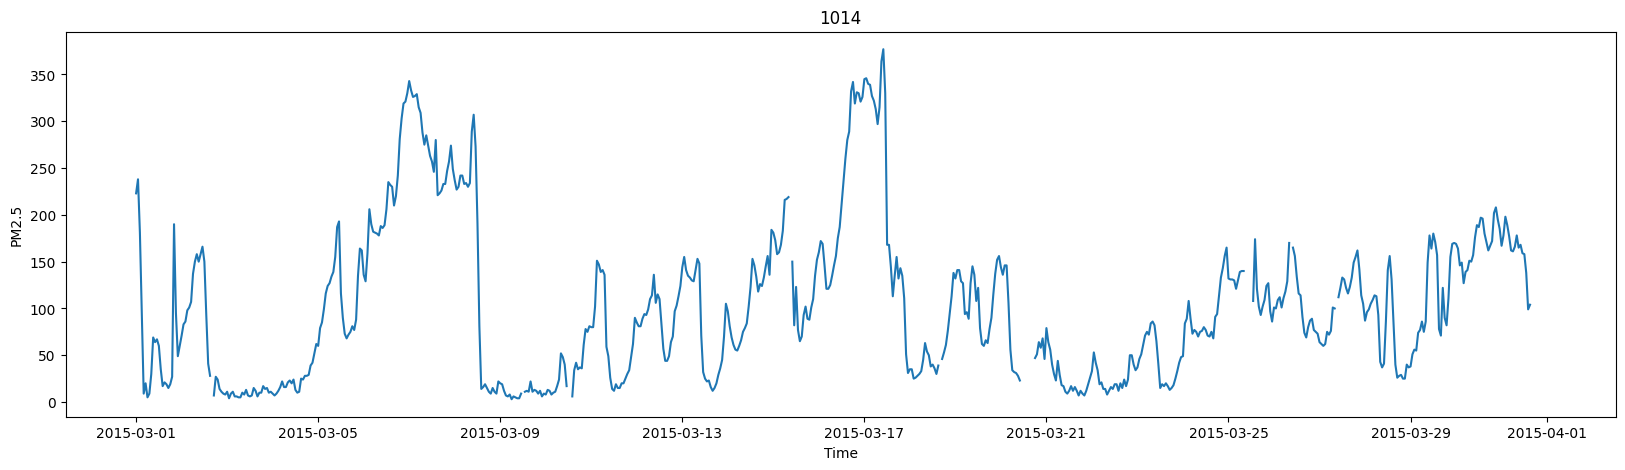

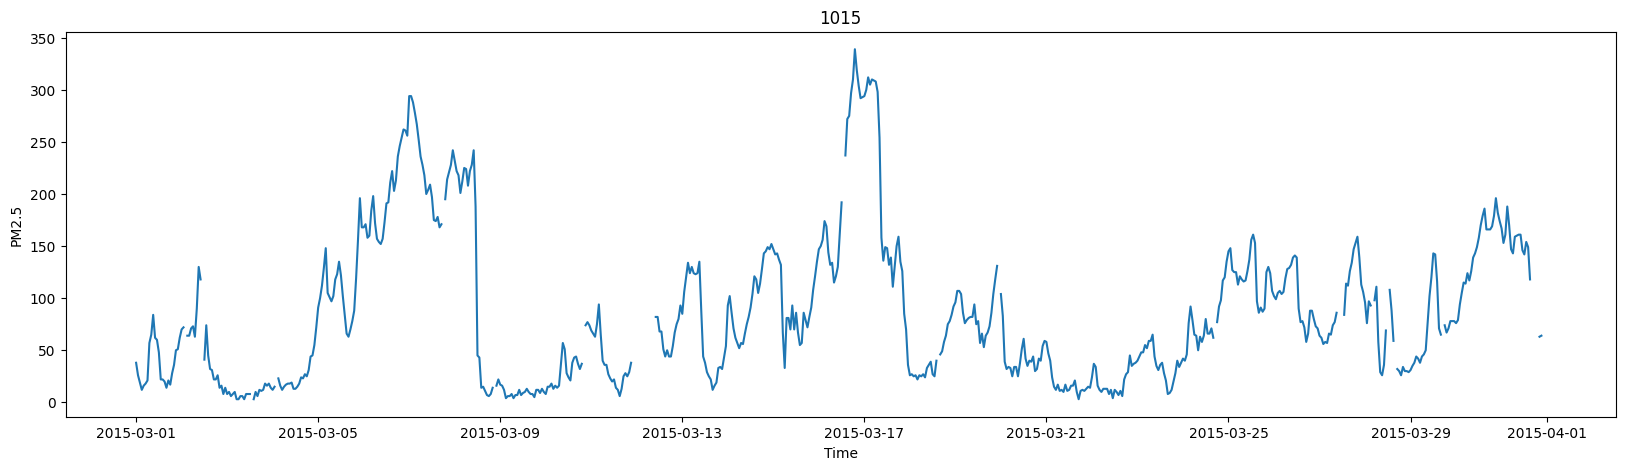

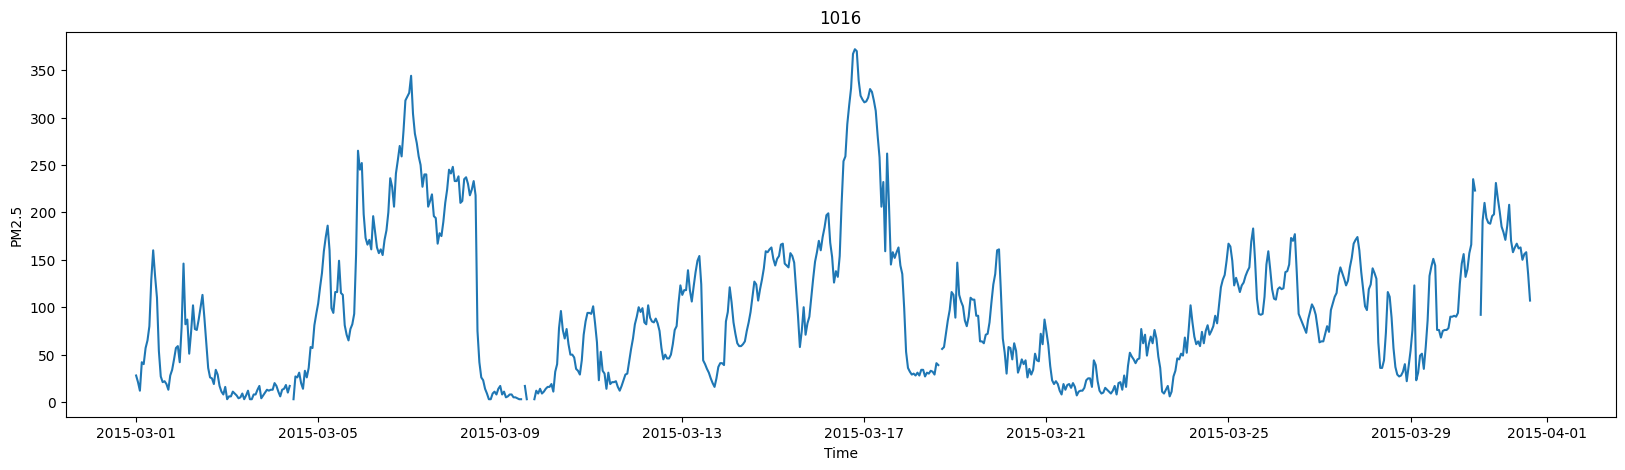

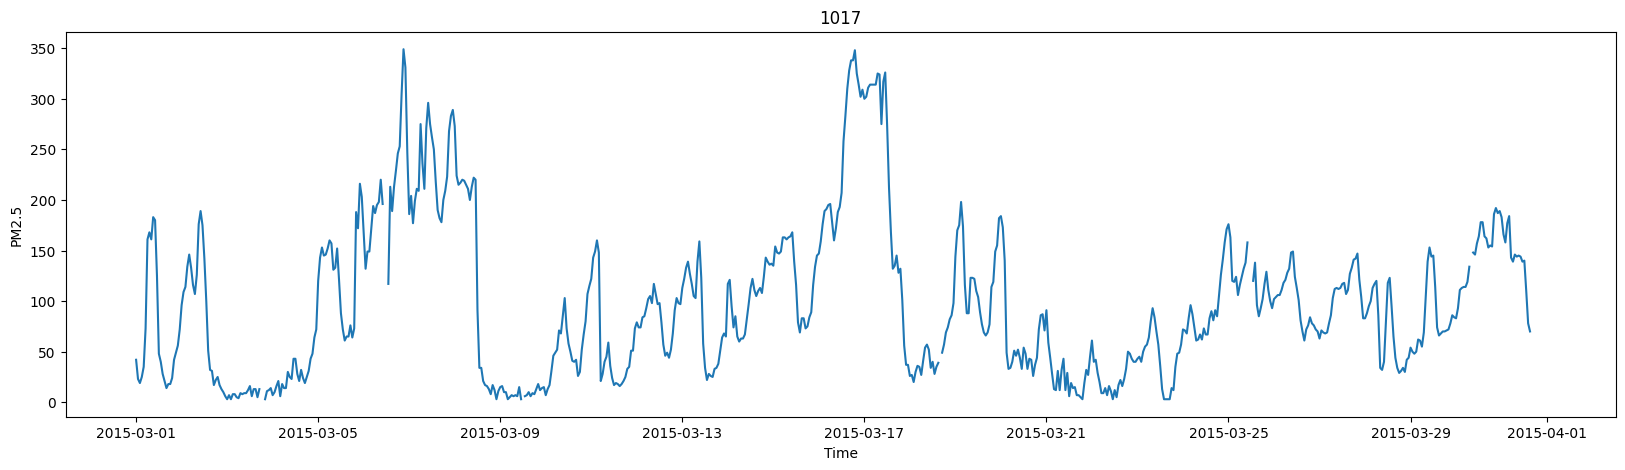

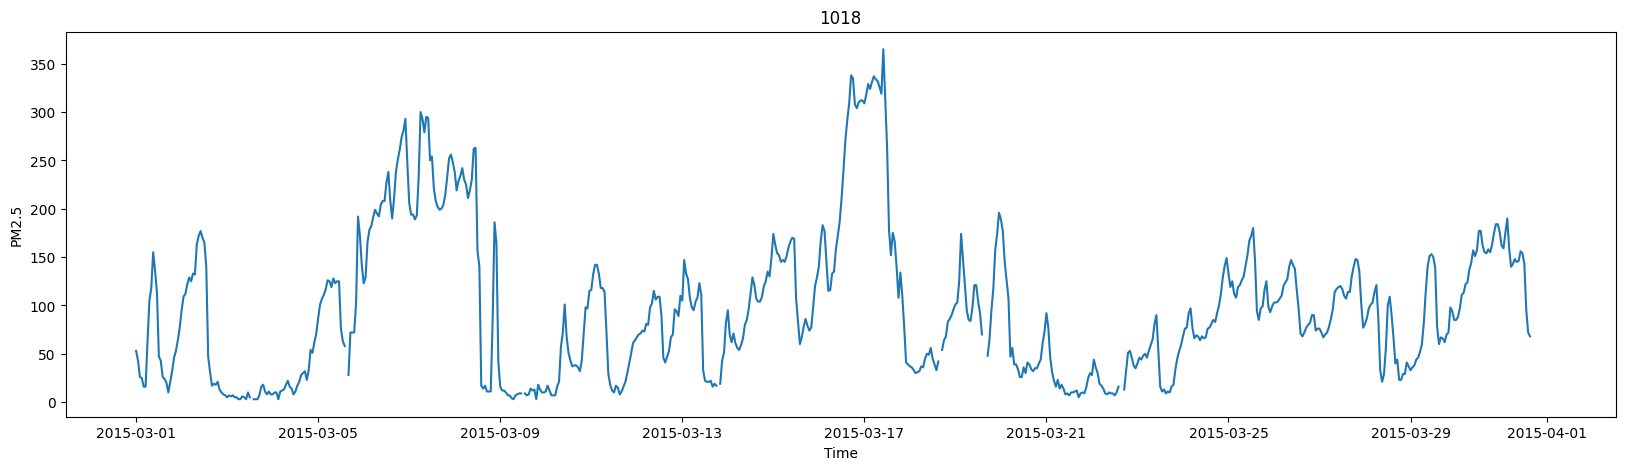

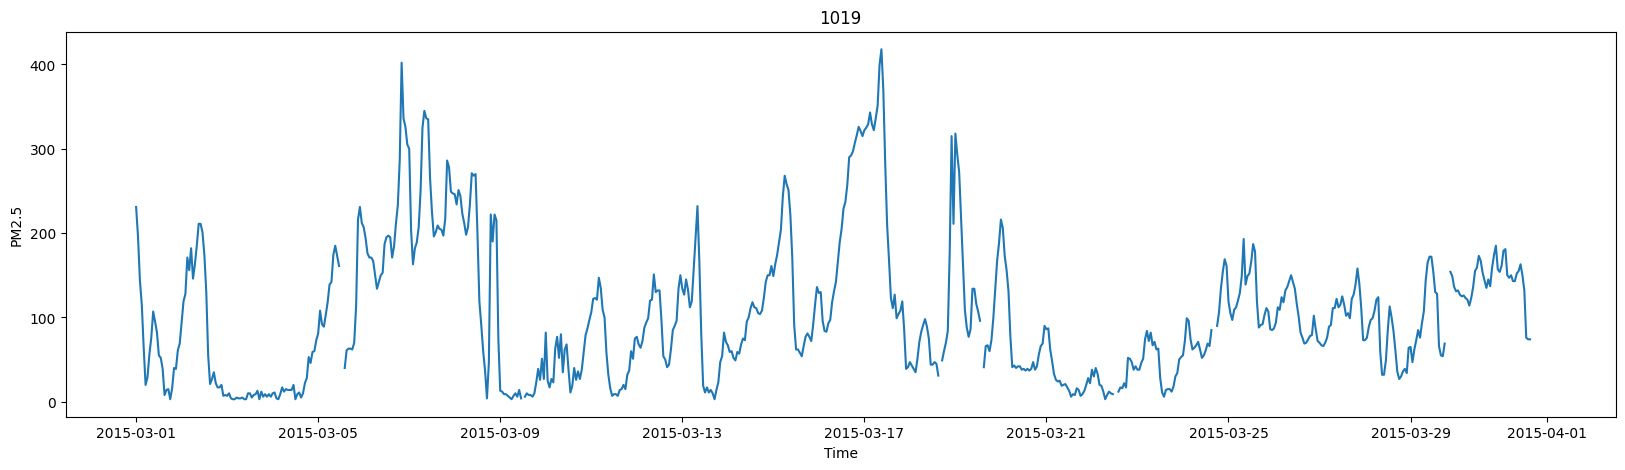

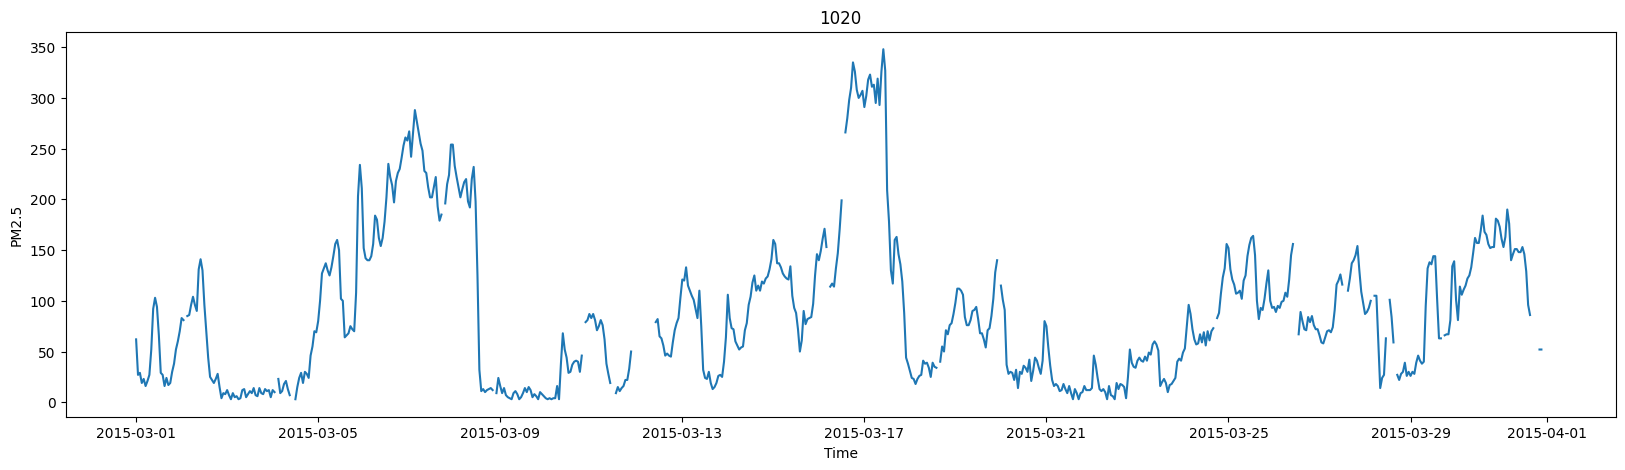

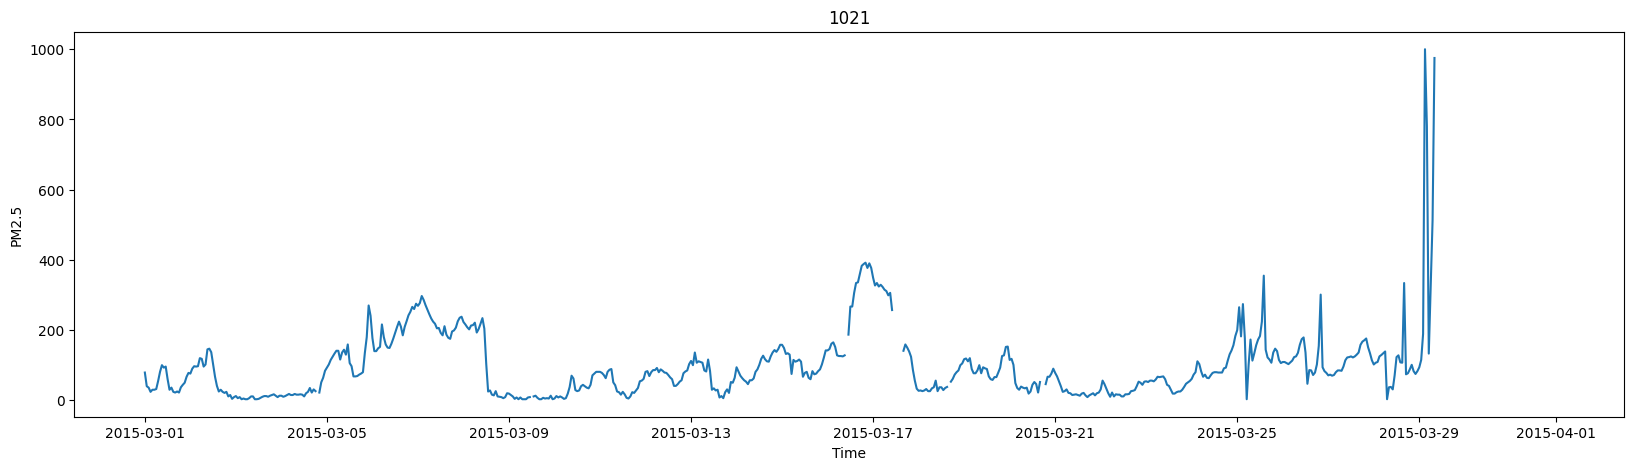

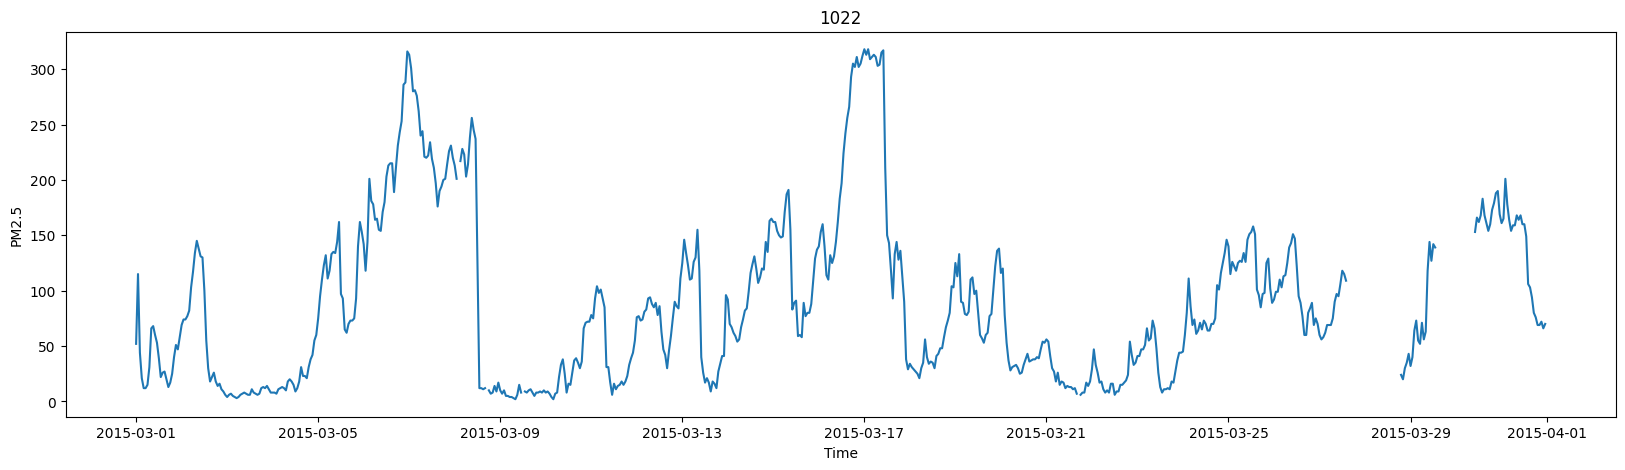

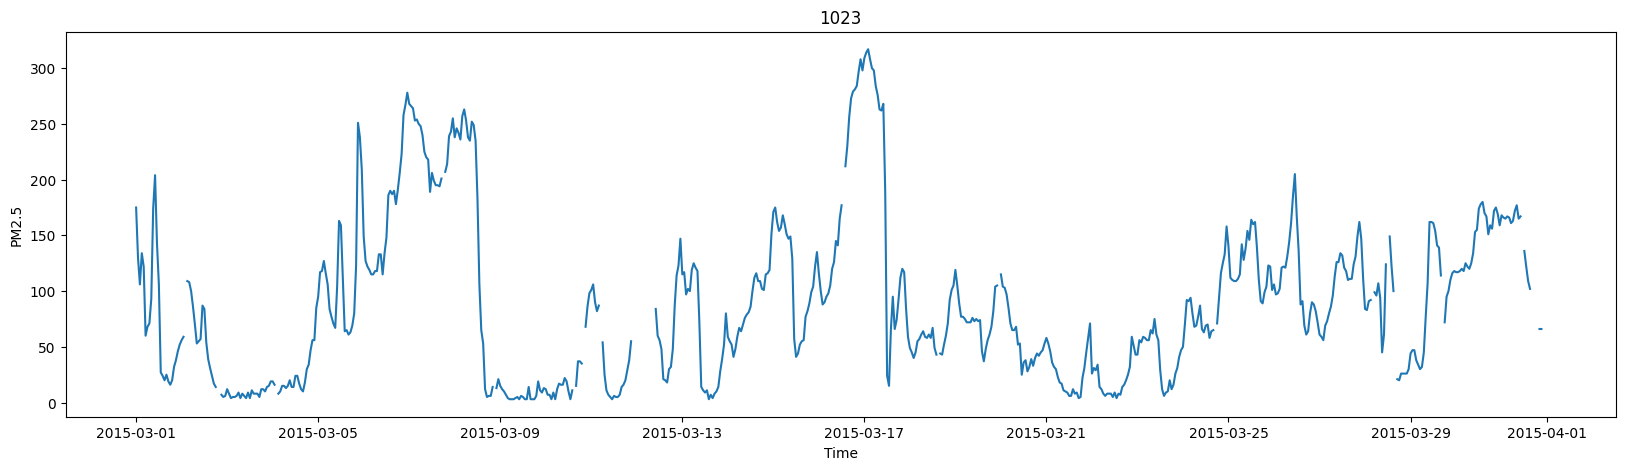

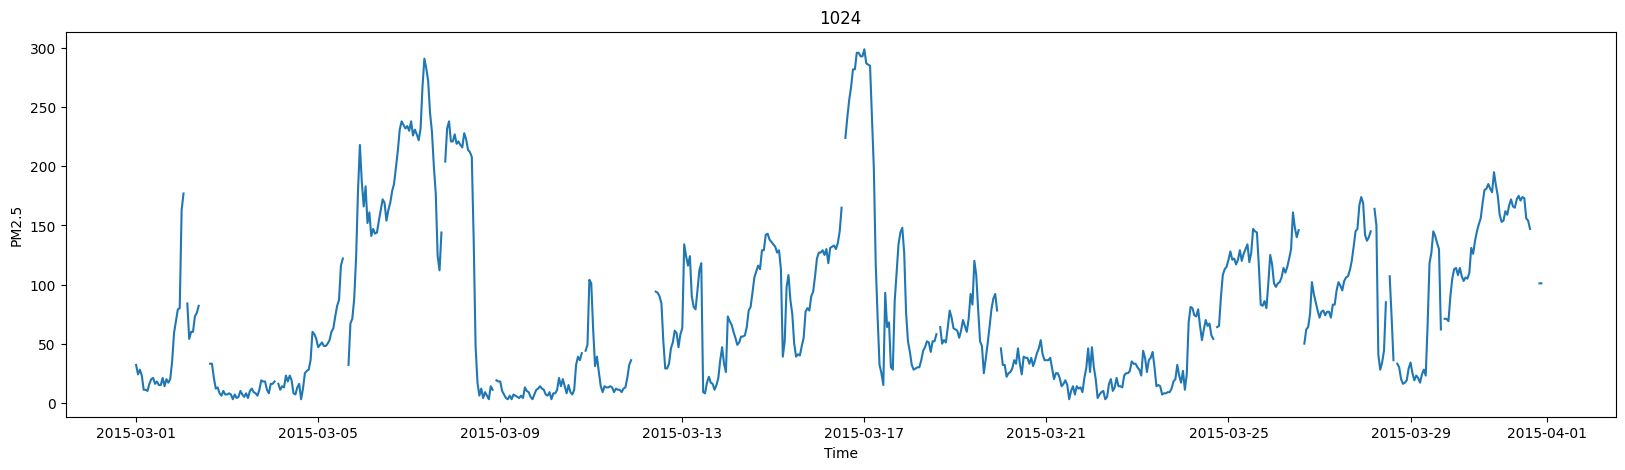

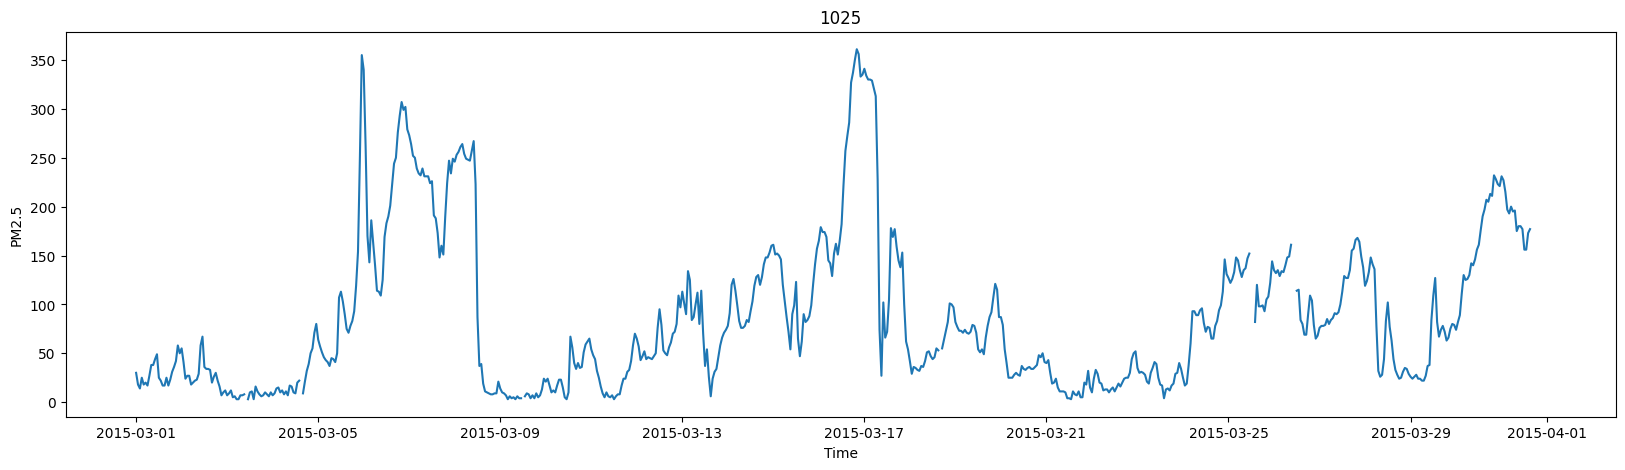

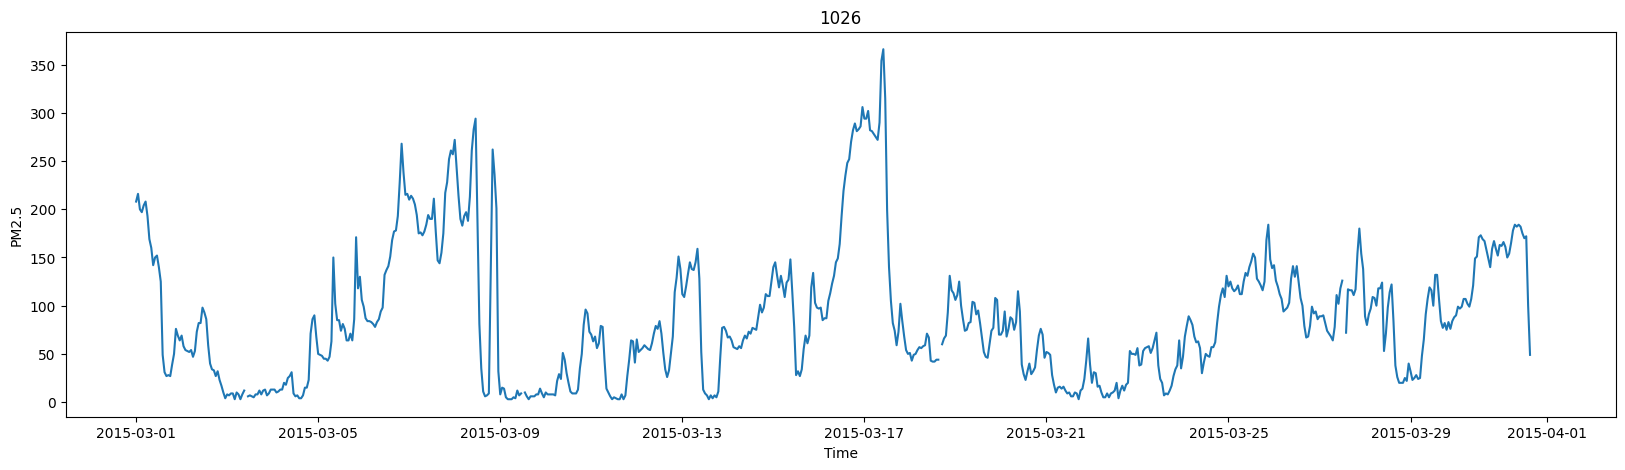

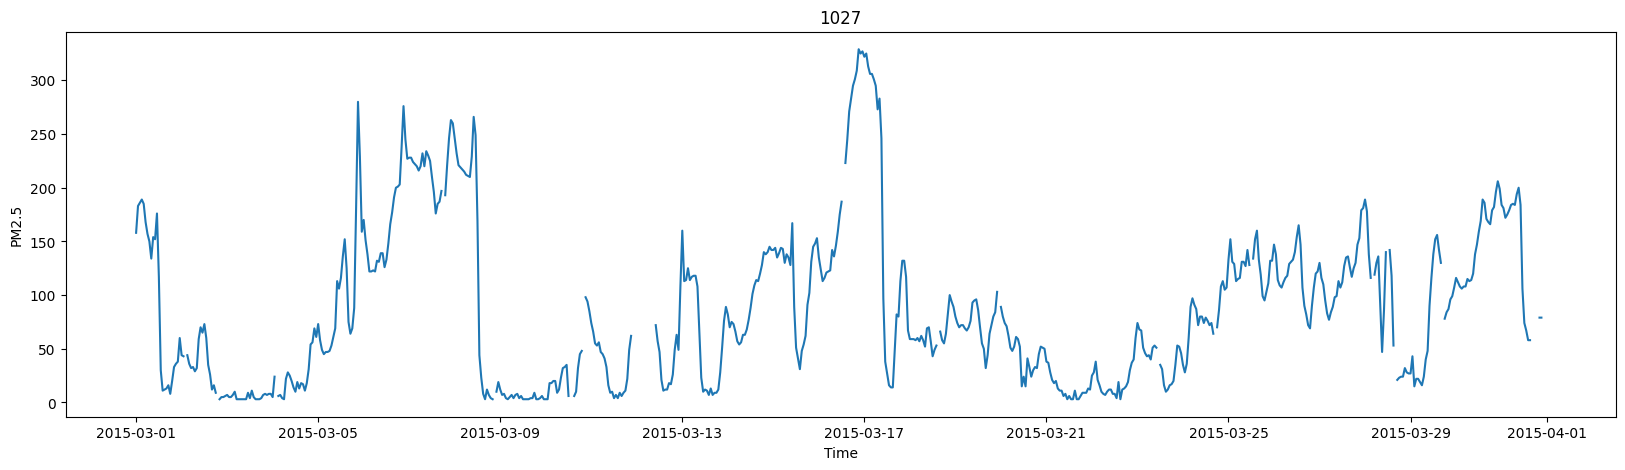

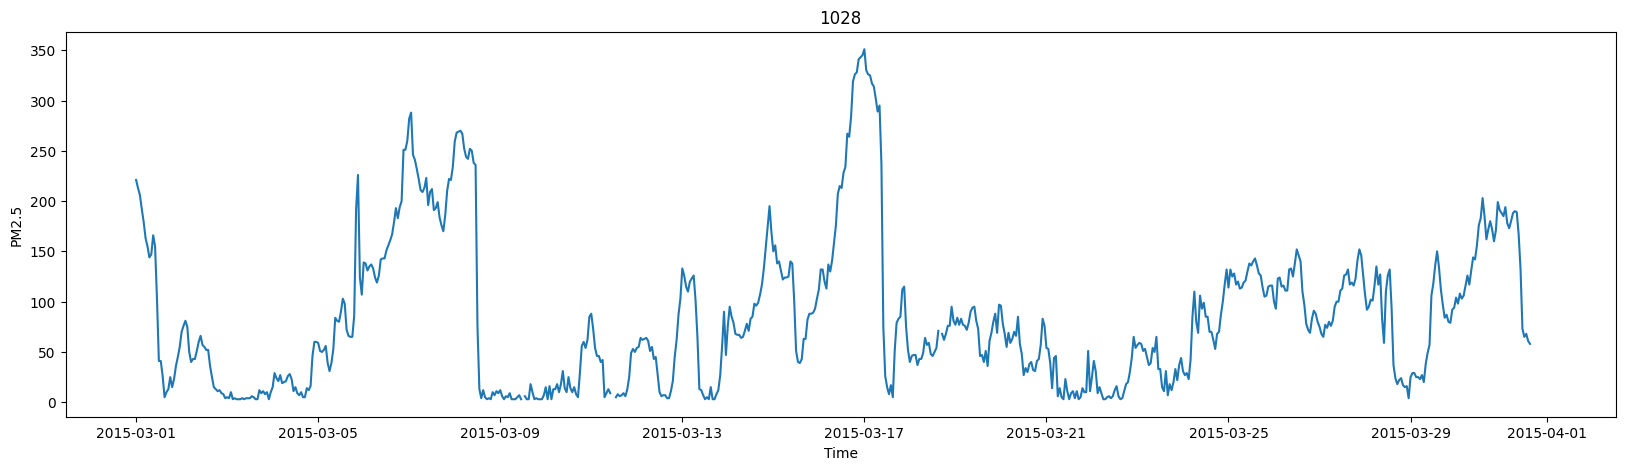

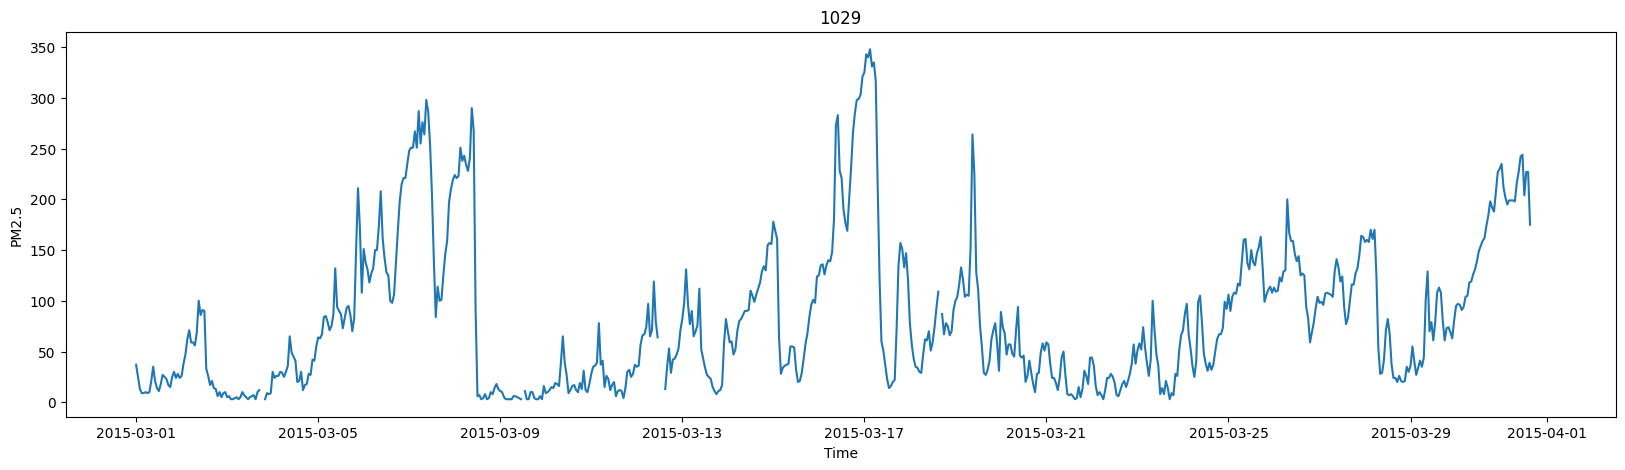

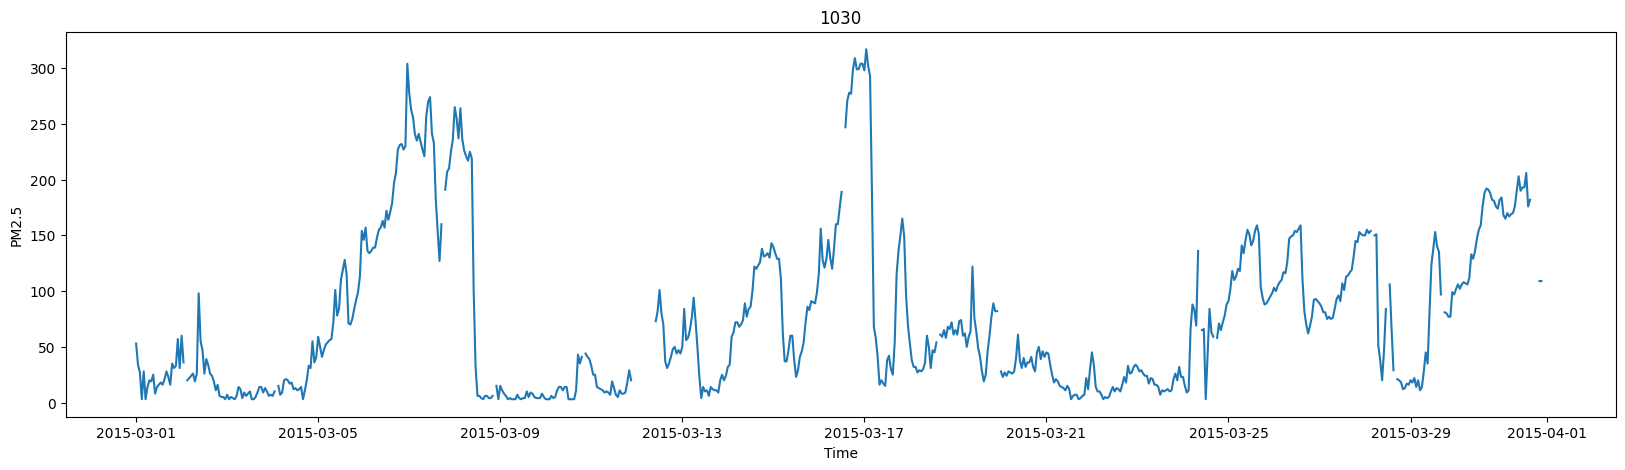

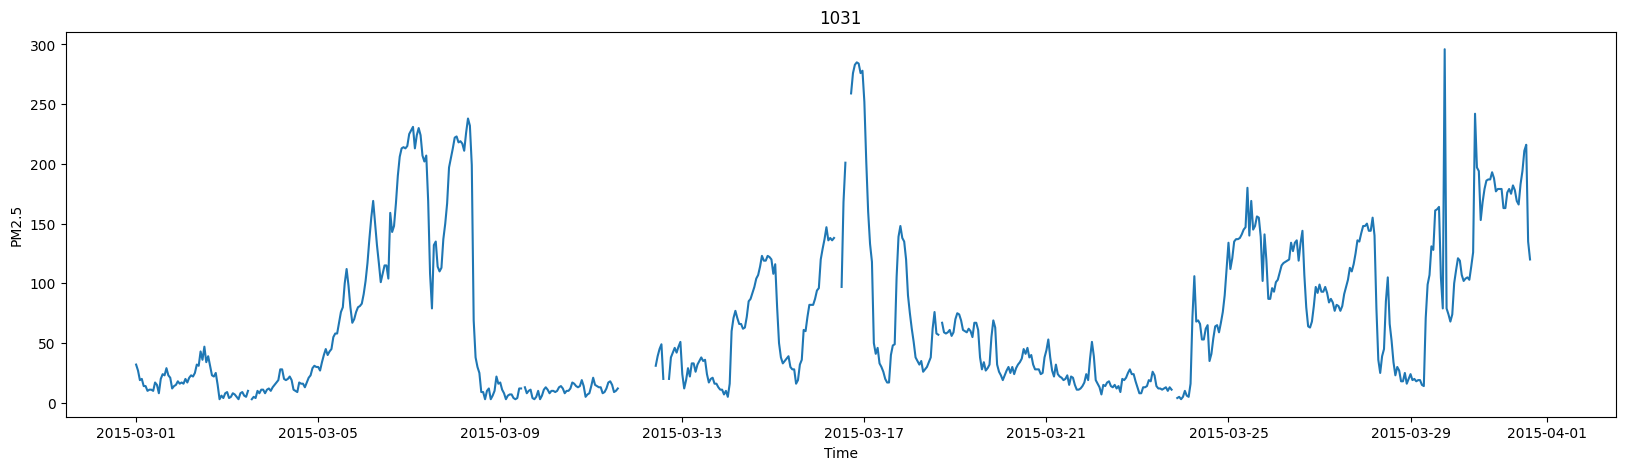

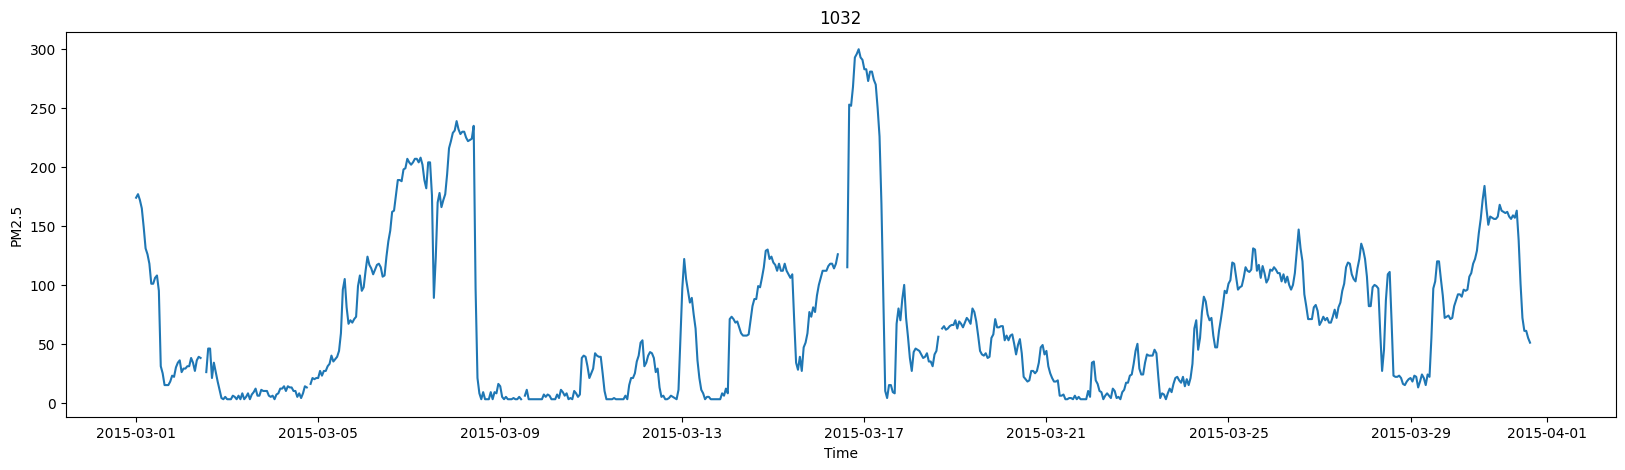

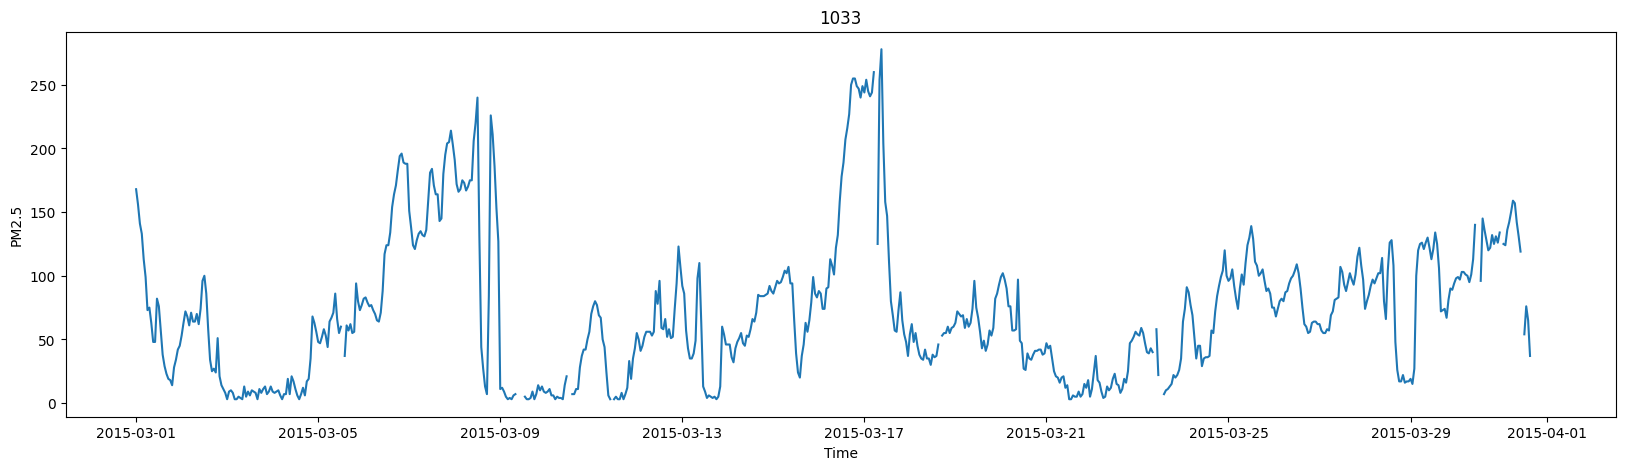

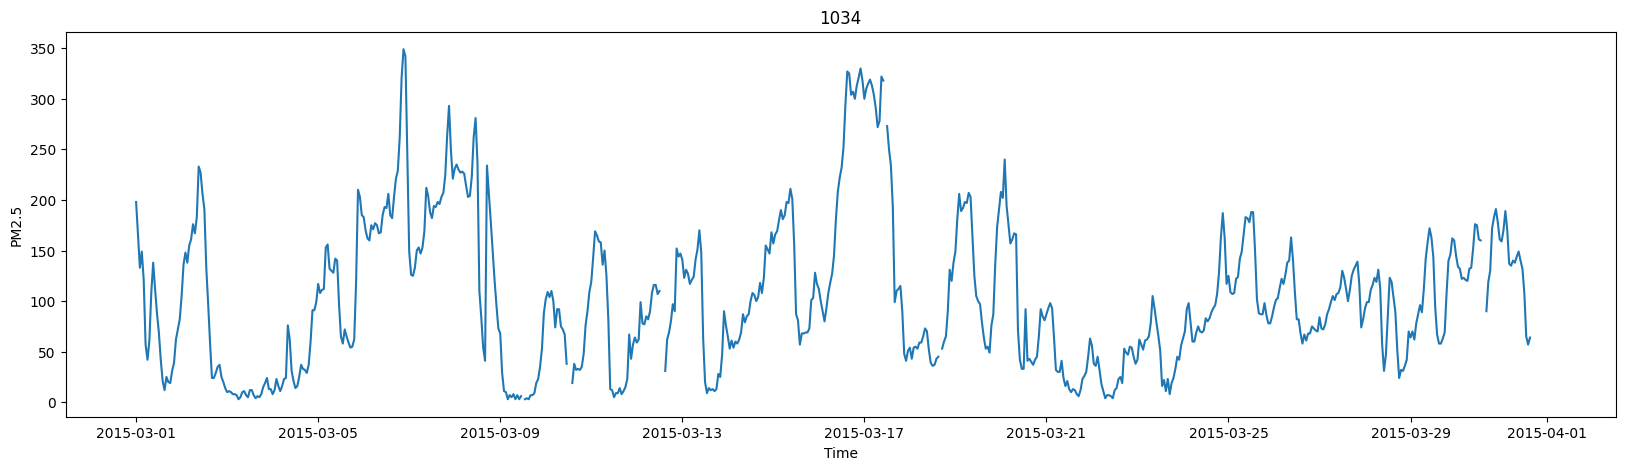

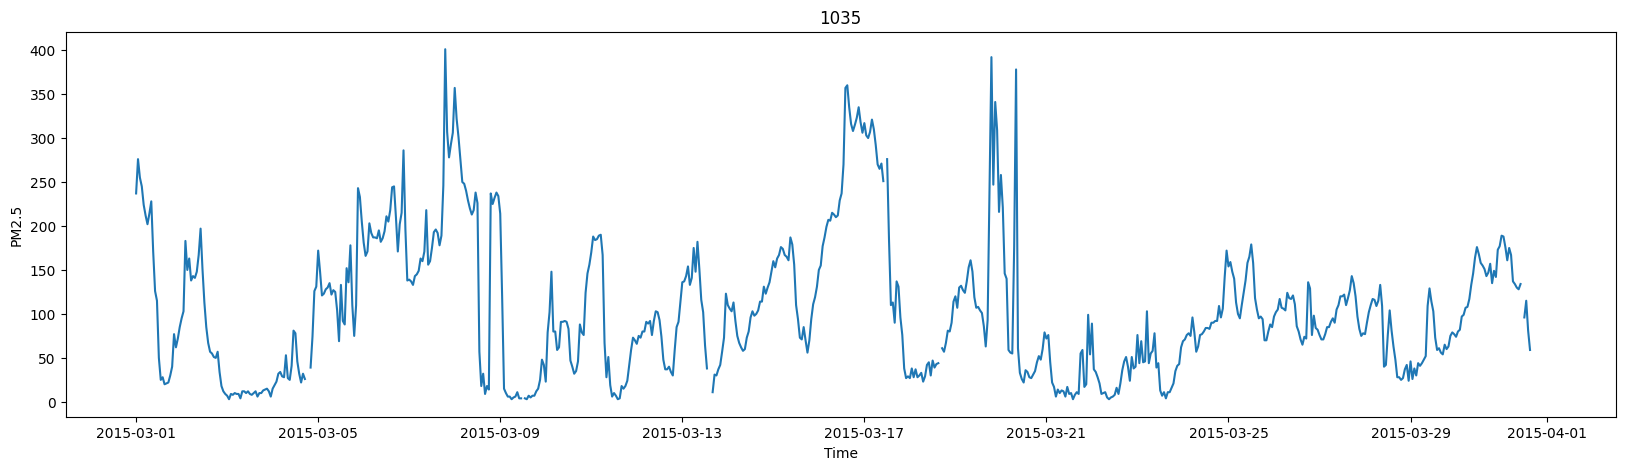

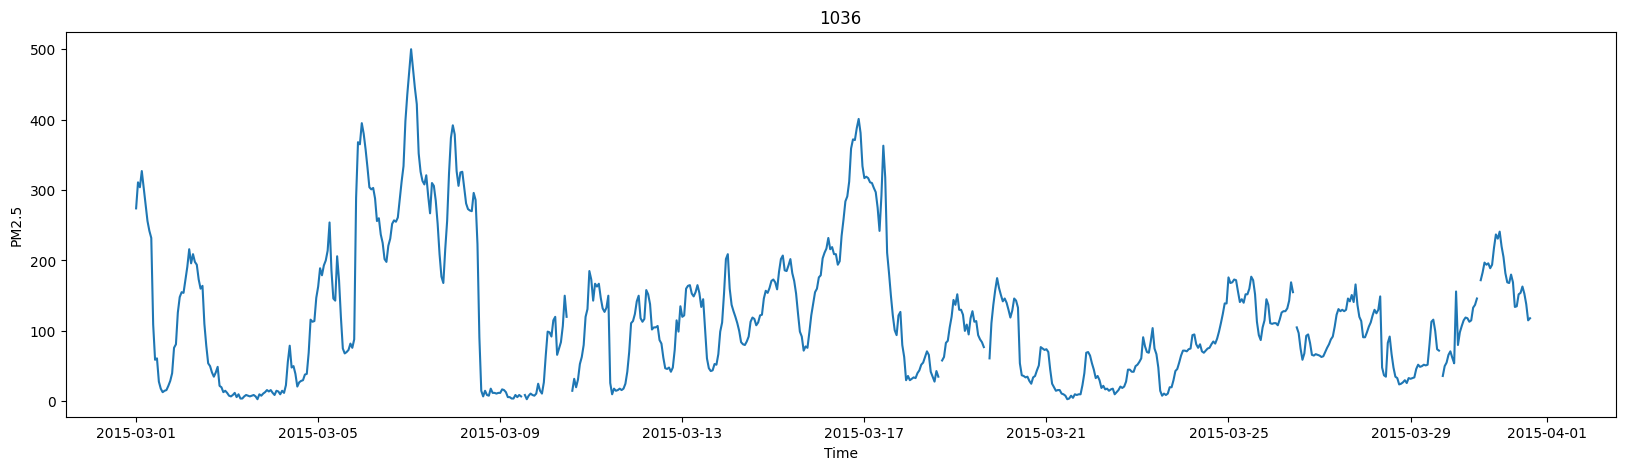

In [7]:
vars = ['PM25_Concentration']#, 'weather', 'temperature', 'pressure', 'humidity', 'wind_speed', 'wind_direction']
for var in vars:    
    for m in range(3,4):
        values = []
        for station in beijing_stations.station_id:
            tmp_df = beijing_aq_plus_met[beijing_aq_plus_met.station_id==station]
            tmp_df['time'] = pd.to_datetime(tmp_df['time']).values
            tmp_df = tmp_df.set_index('time')['2015-'+str(m).zfill(2)]
        #     print(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
#             values.append(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
        #     break
            plt.figure(figsize=(20,5));
#             plt.plot(beijing_stations.station_id.values.astype(int), values);
            plt.title(str(station));
            plt.plot(tmp_df.index, tmp_df[var])
            plt.ylabel('PM2.5')
            plt.xlabel('Time')
#             plt.xticks(beijing_stations.station_id)
#             plt.grid(True)

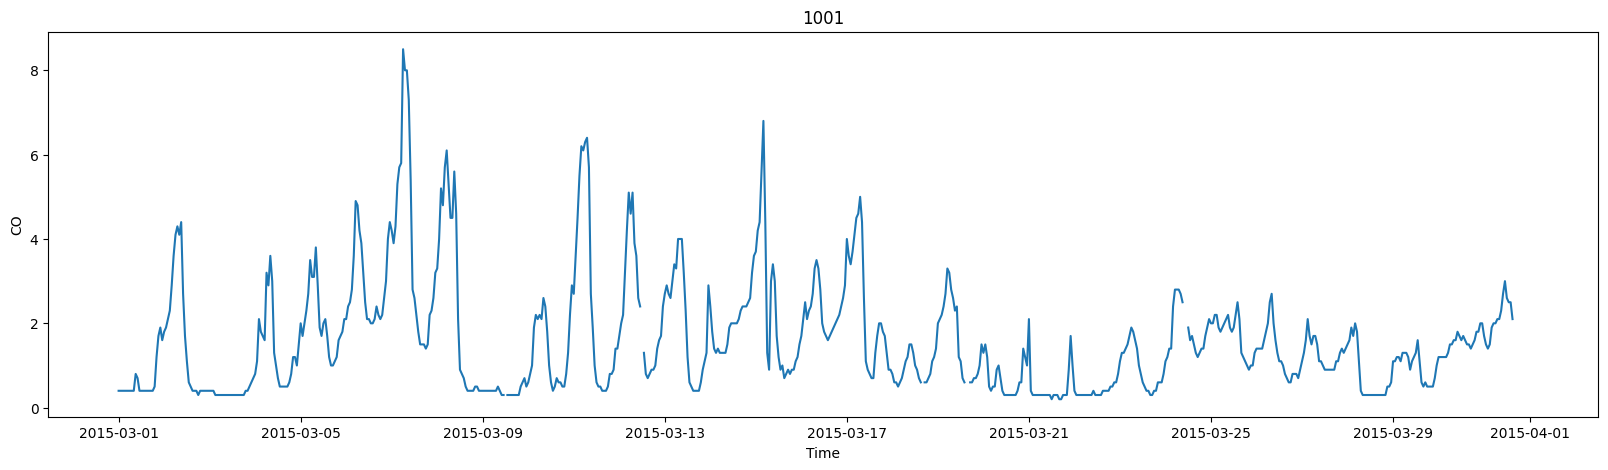

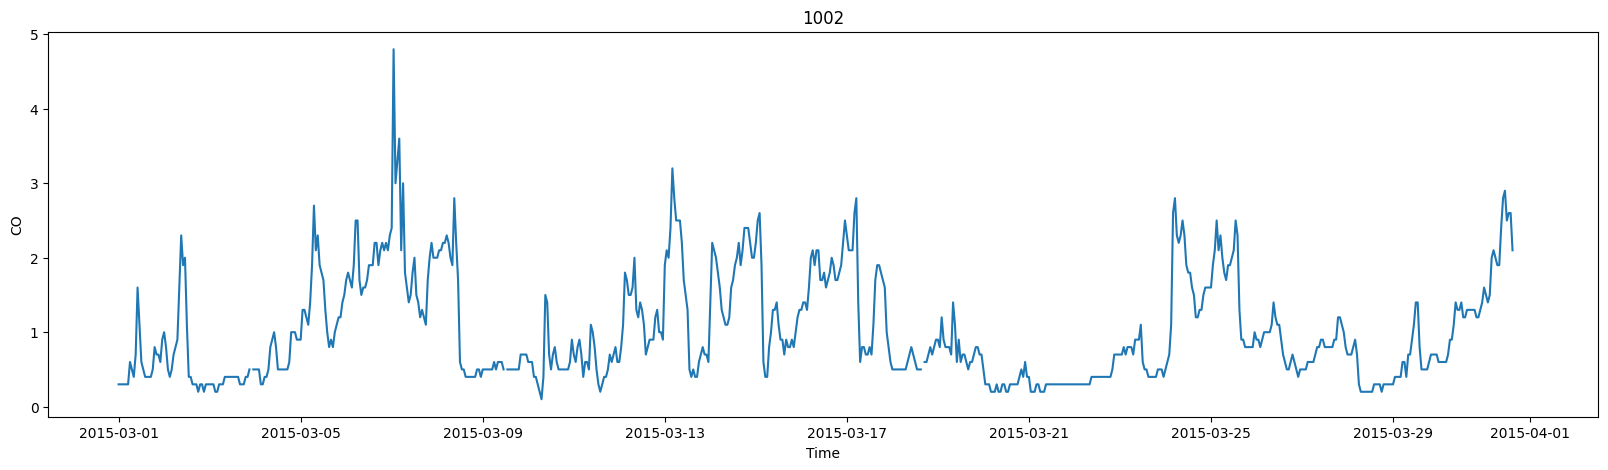

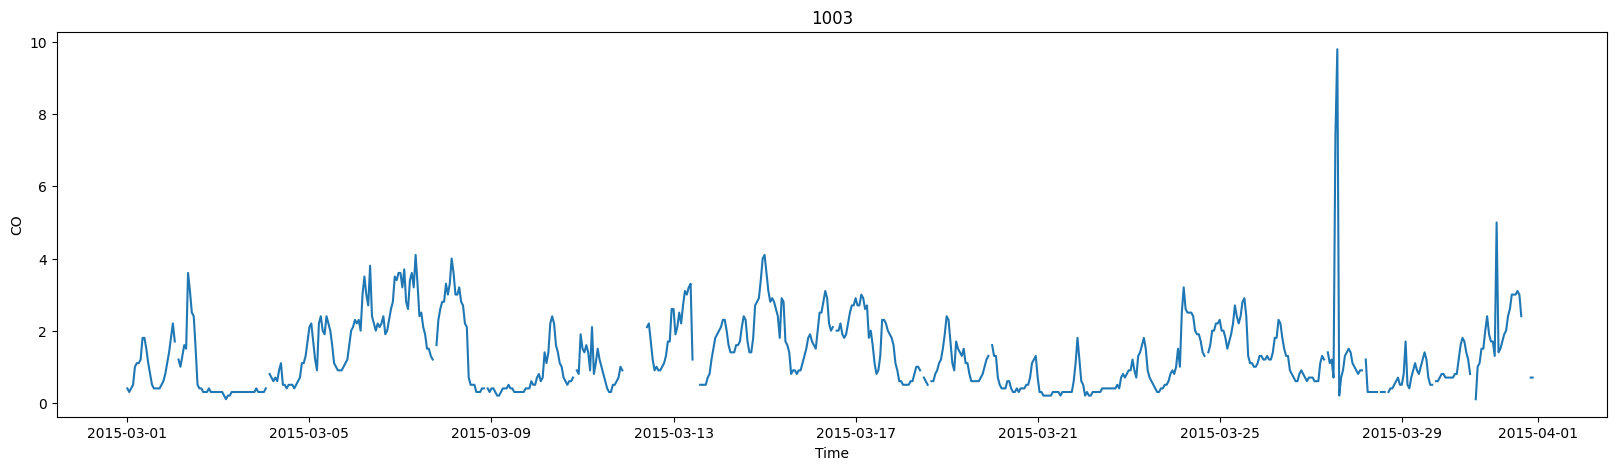

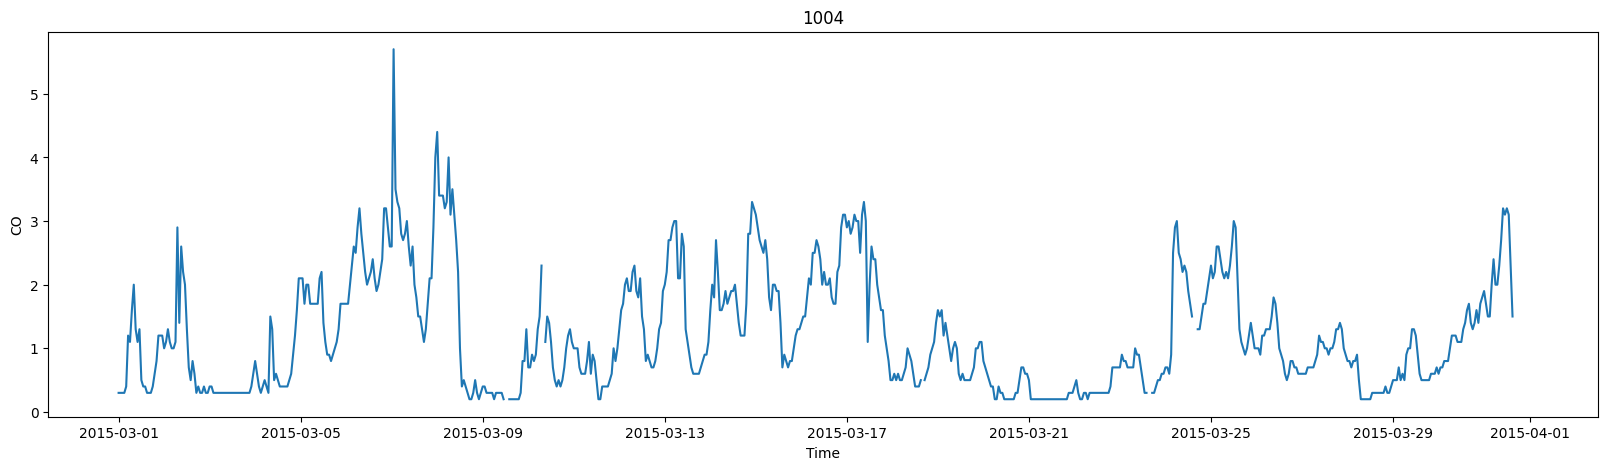

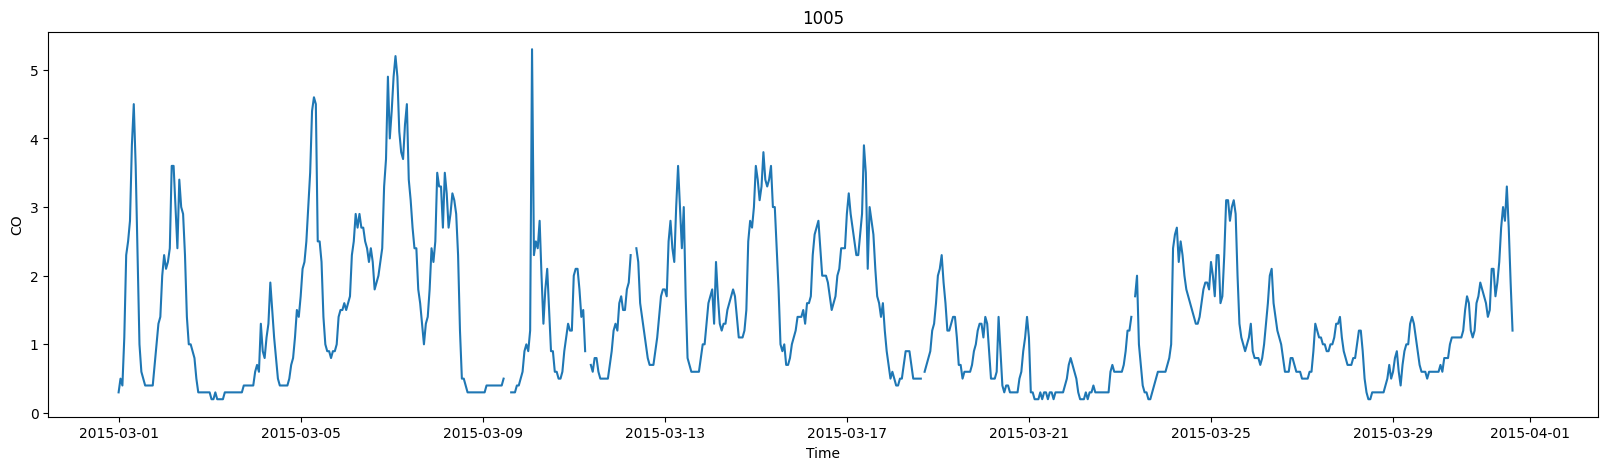

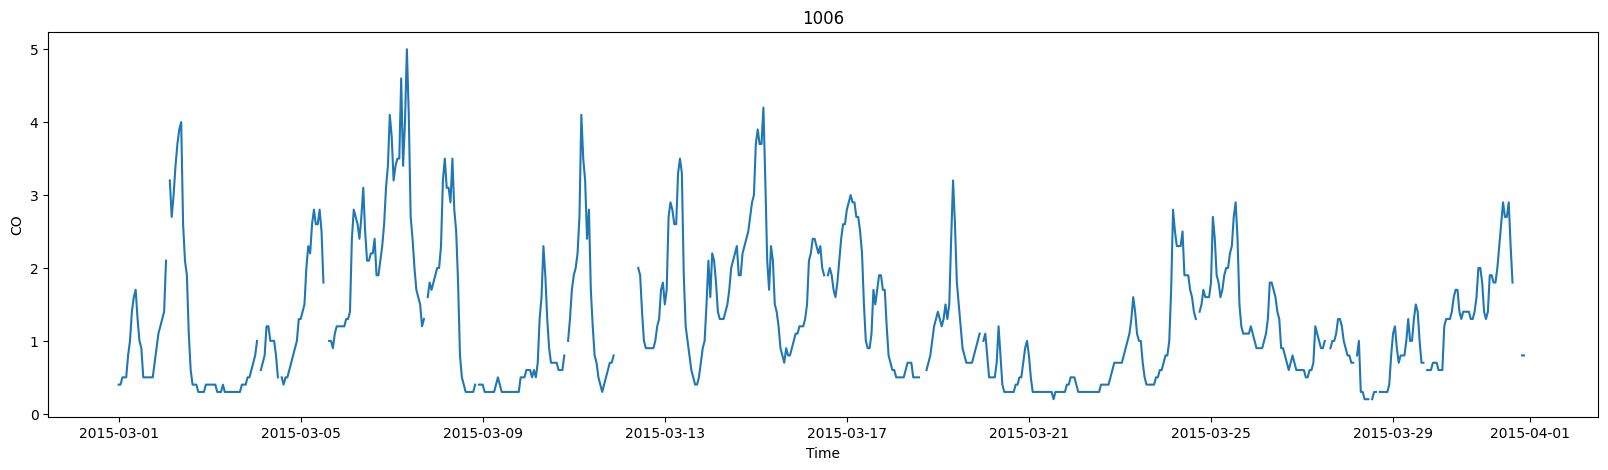

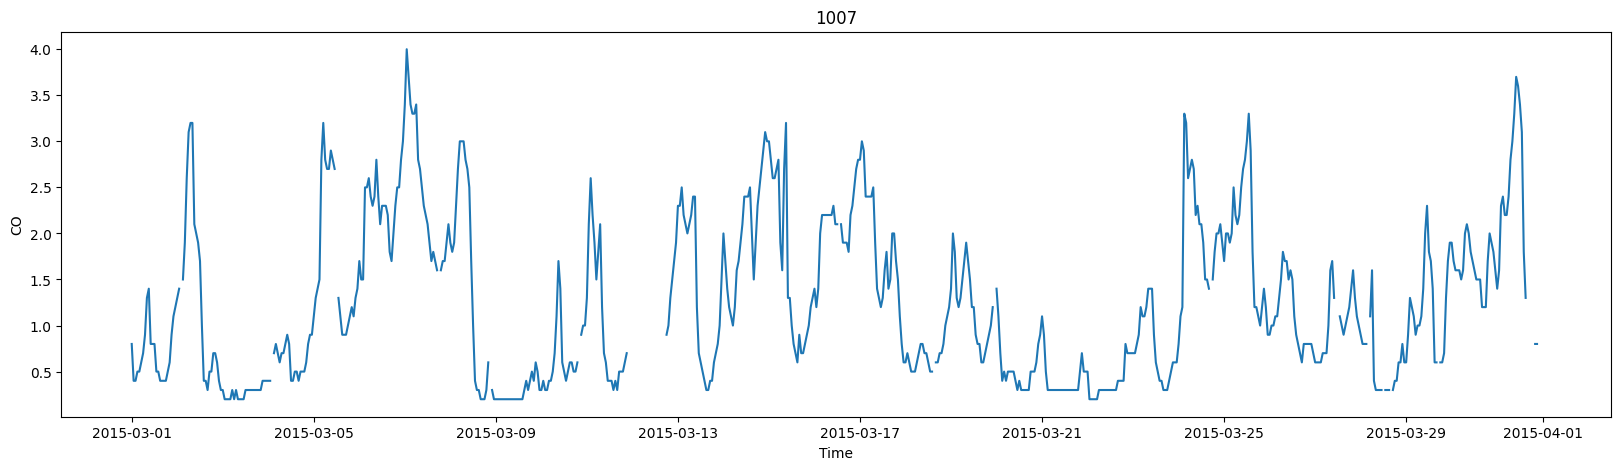

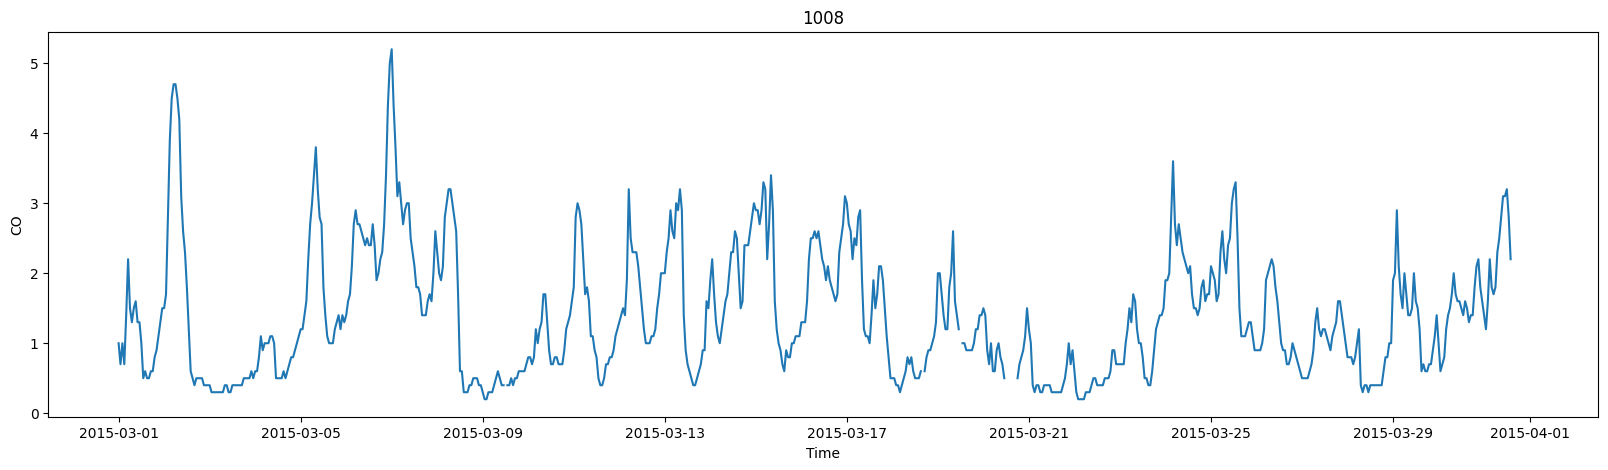

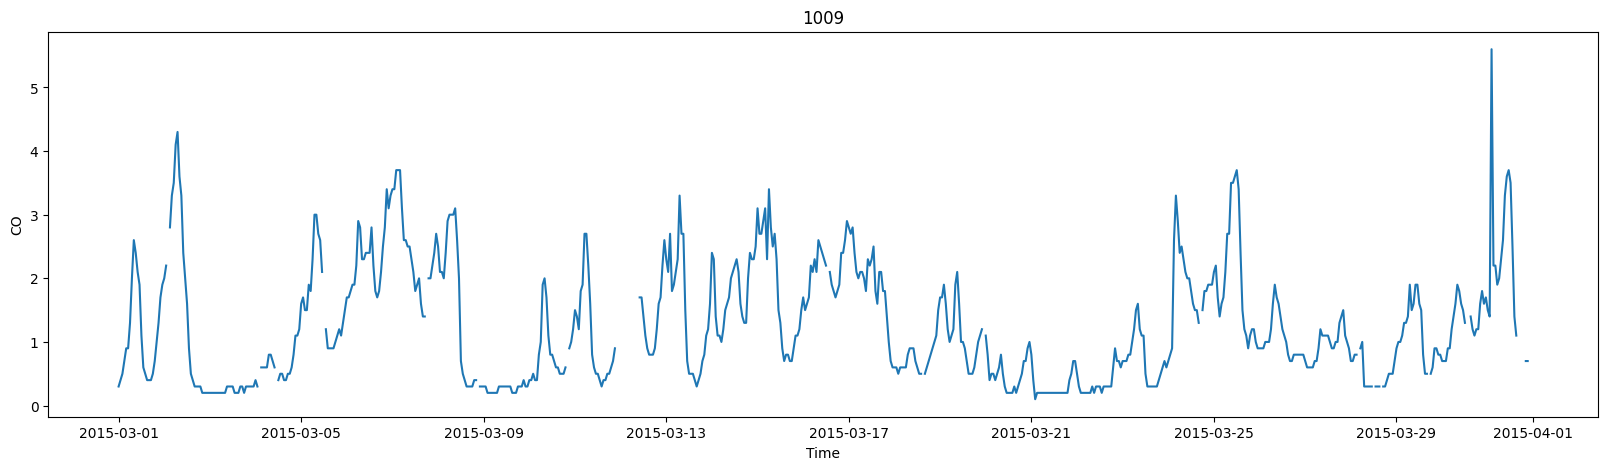

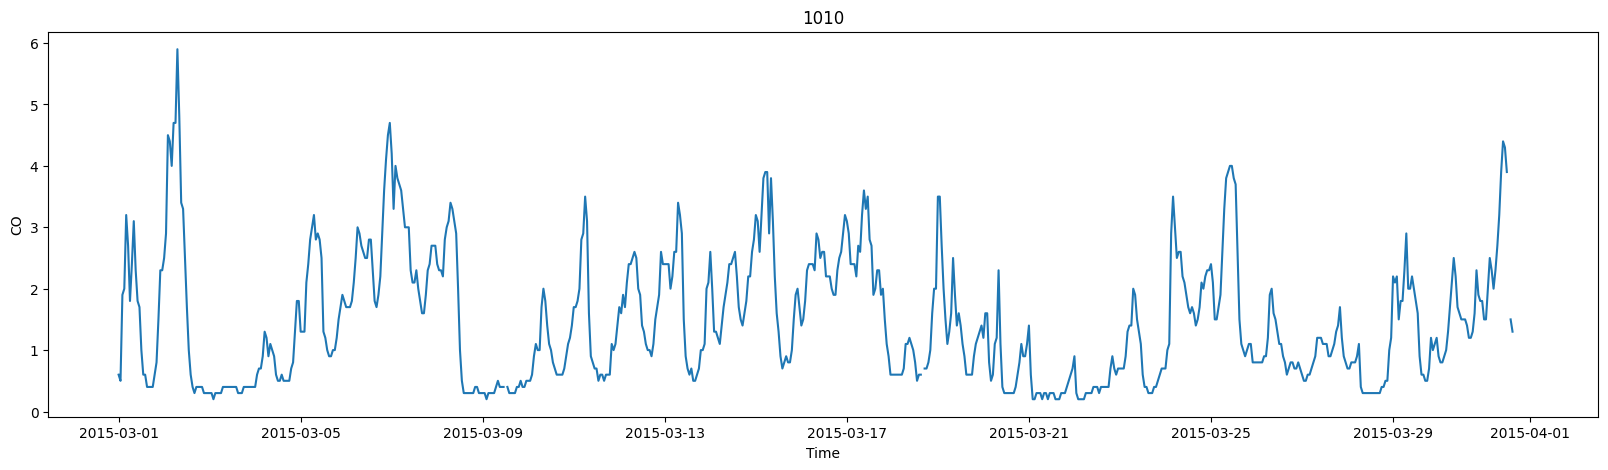

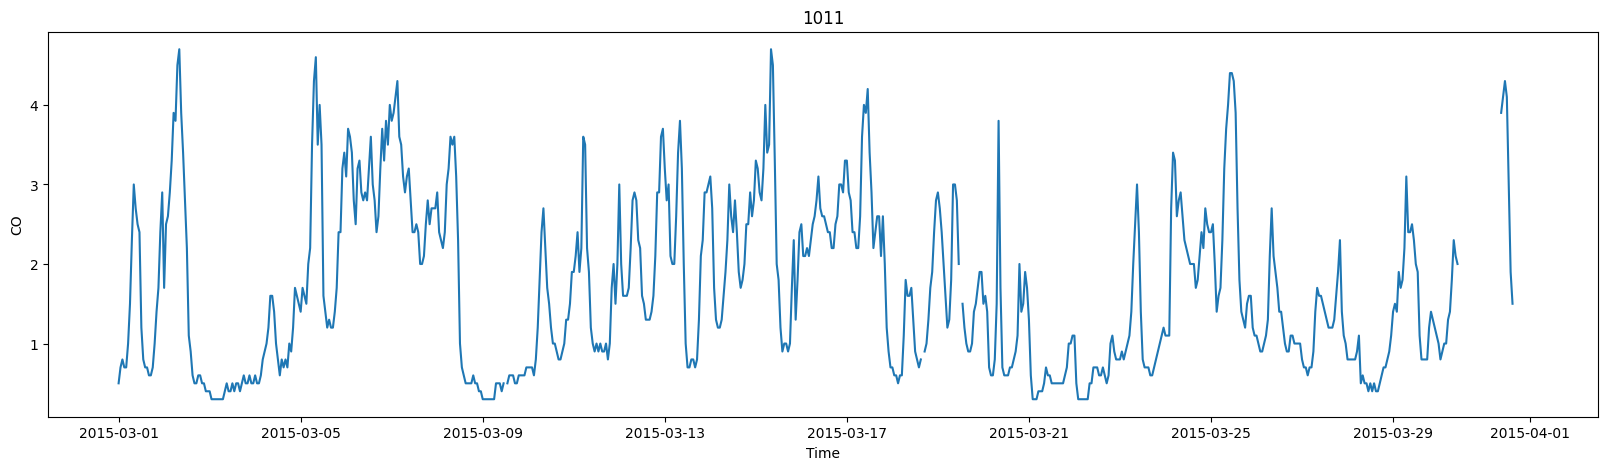

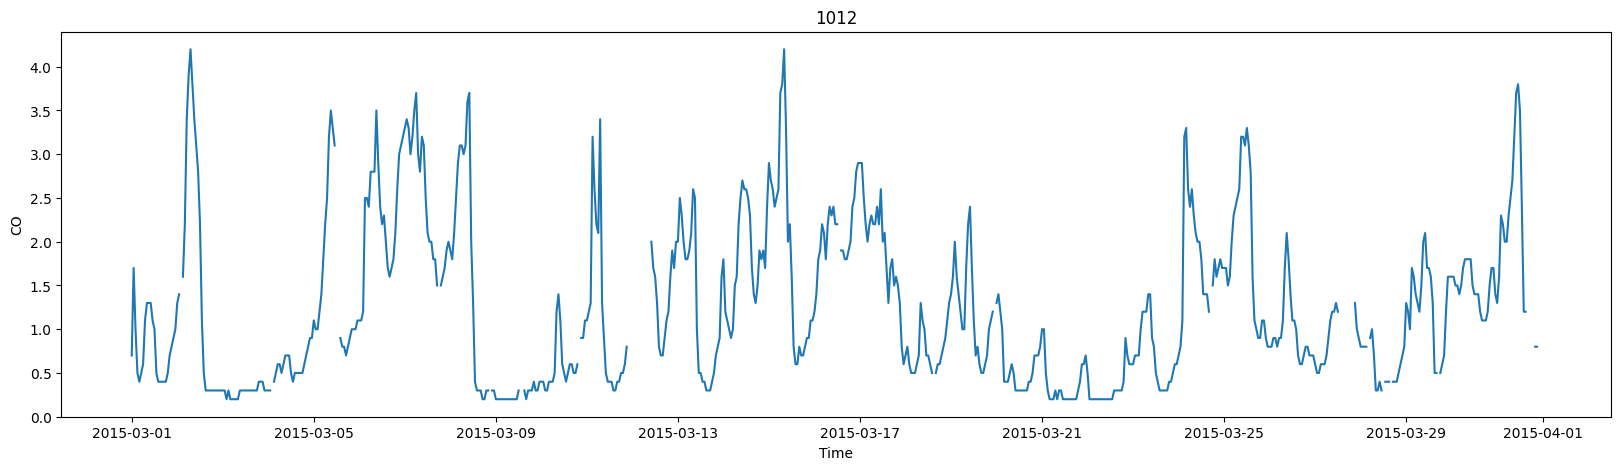

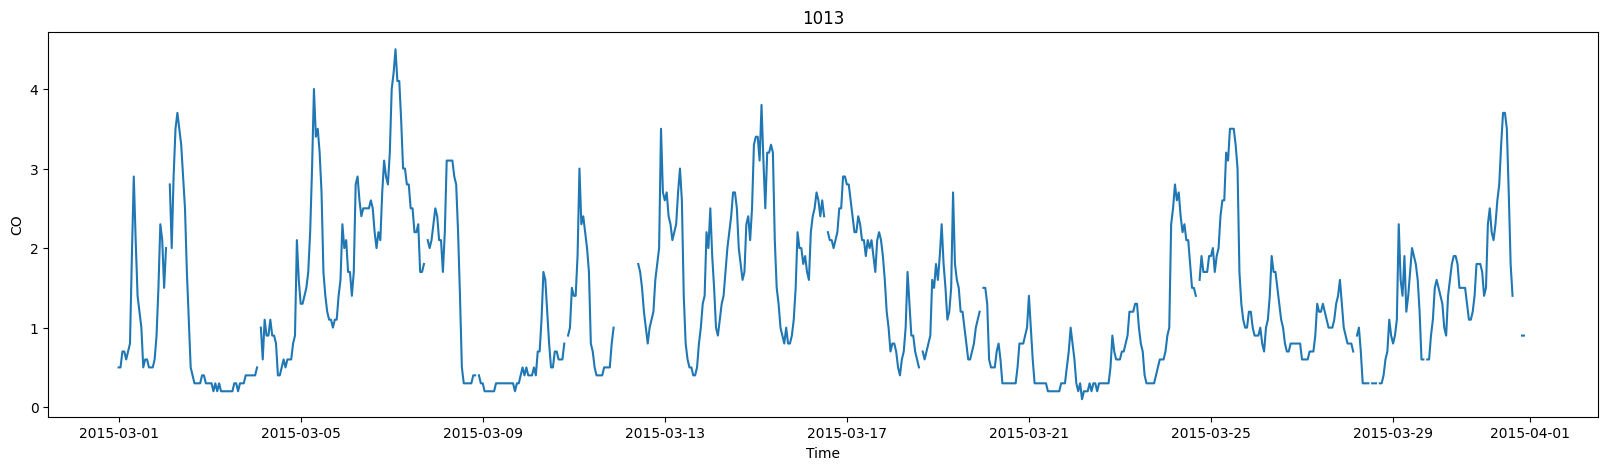

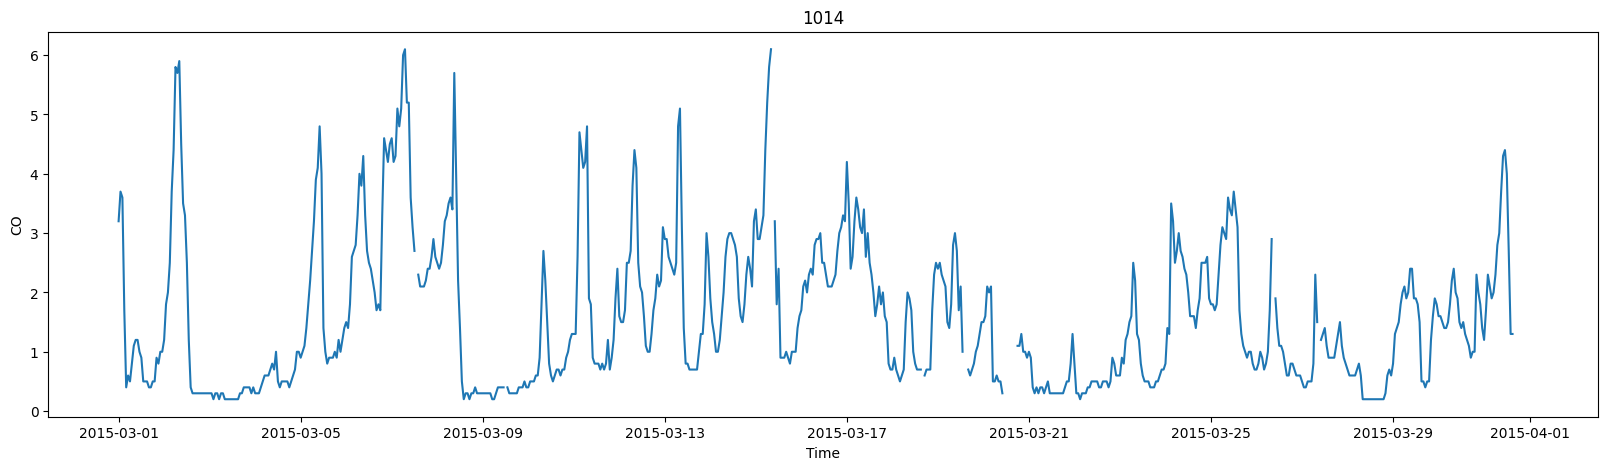

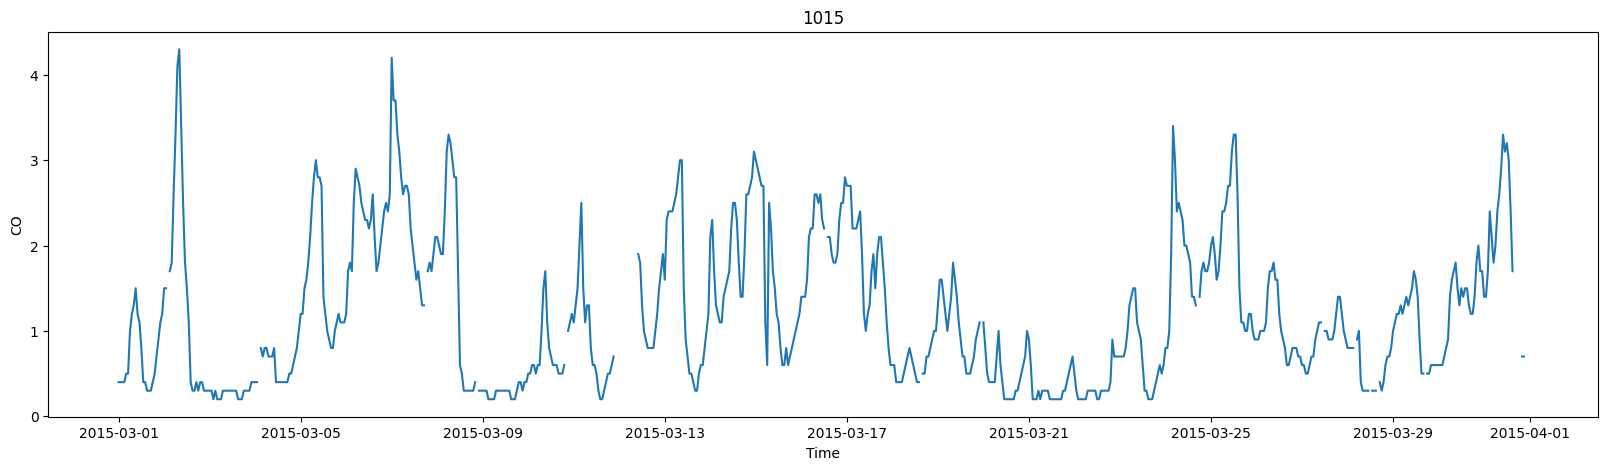

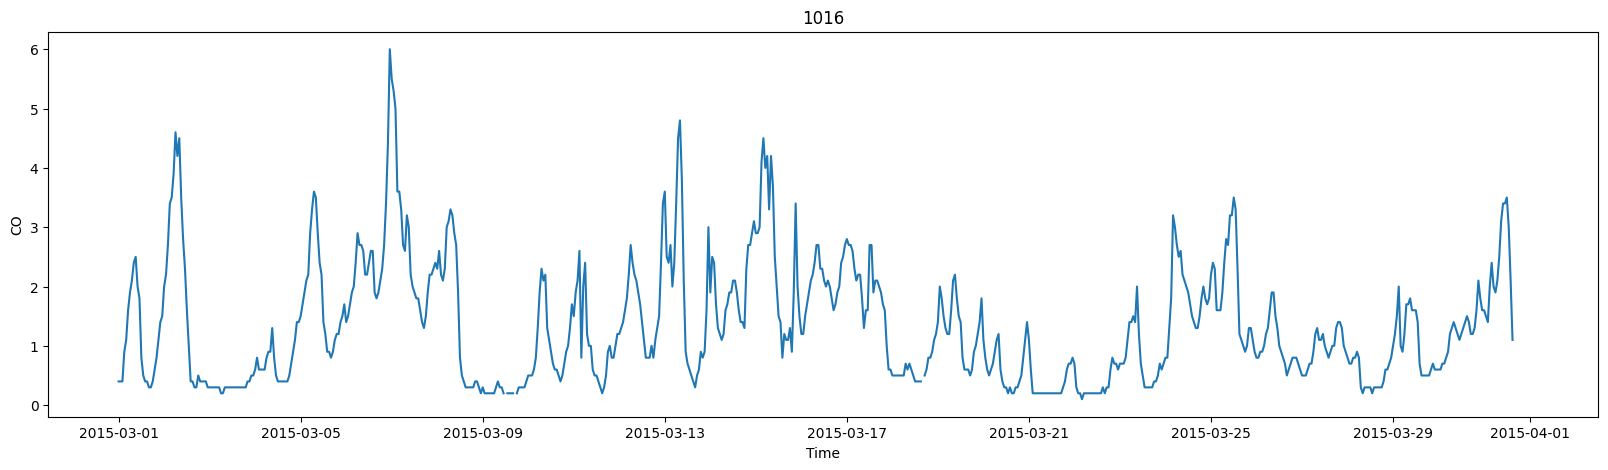

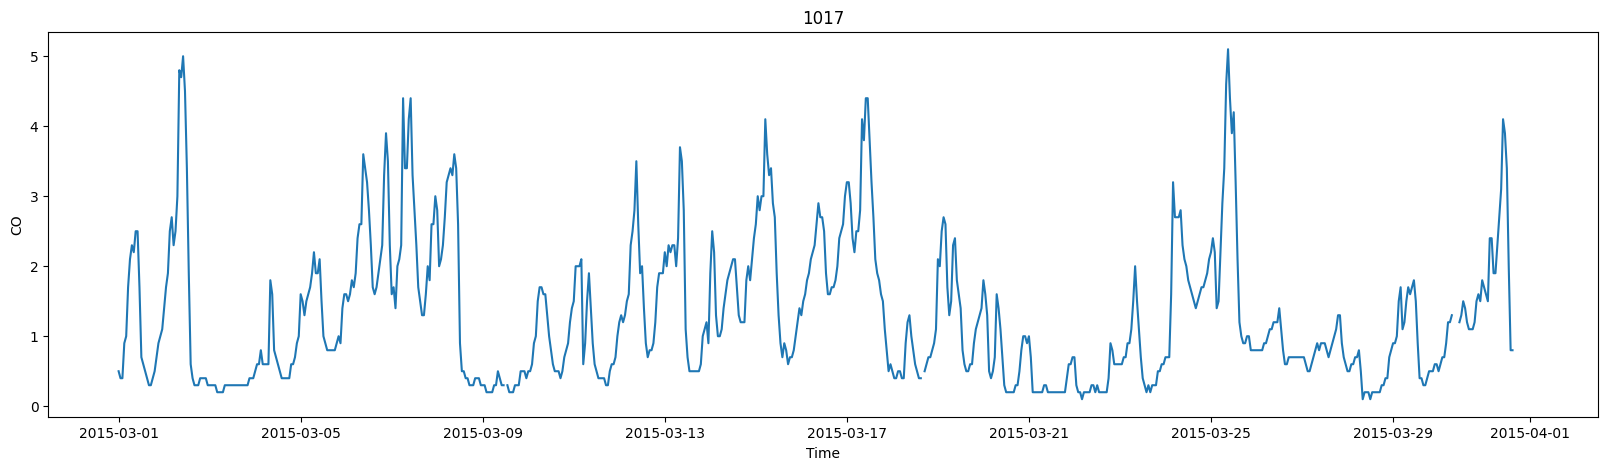

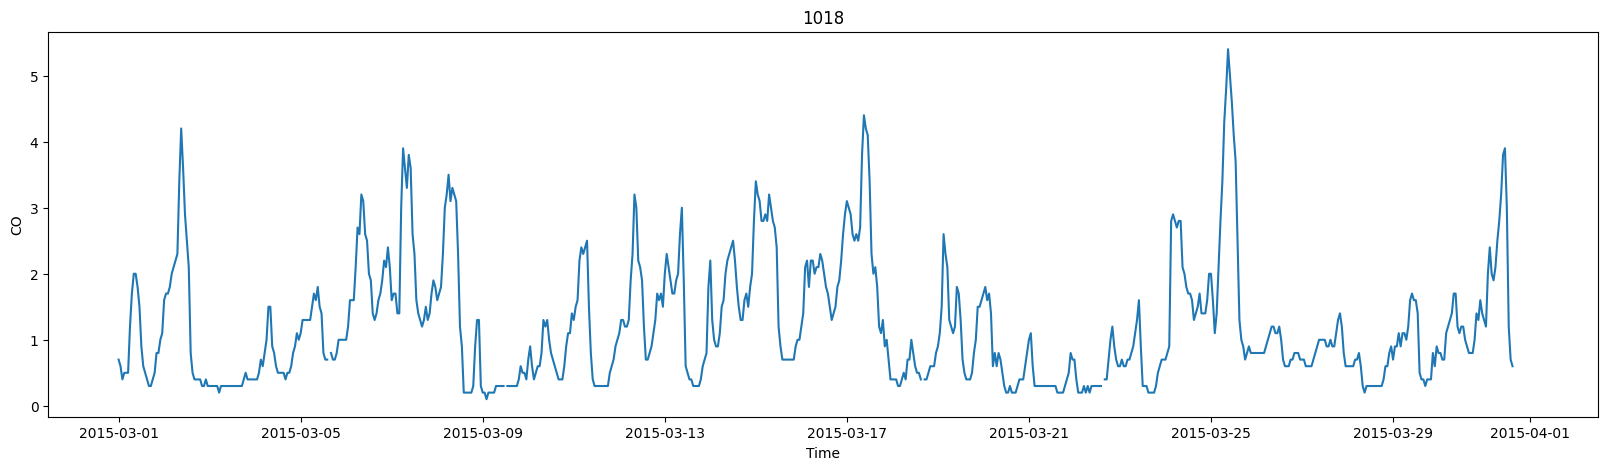

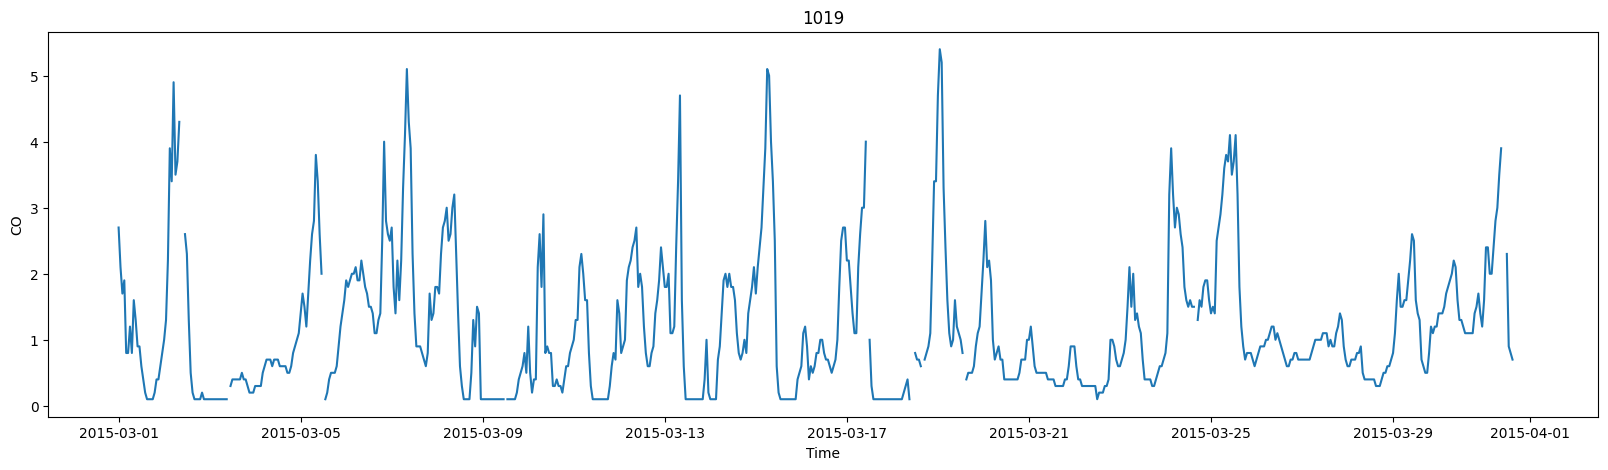

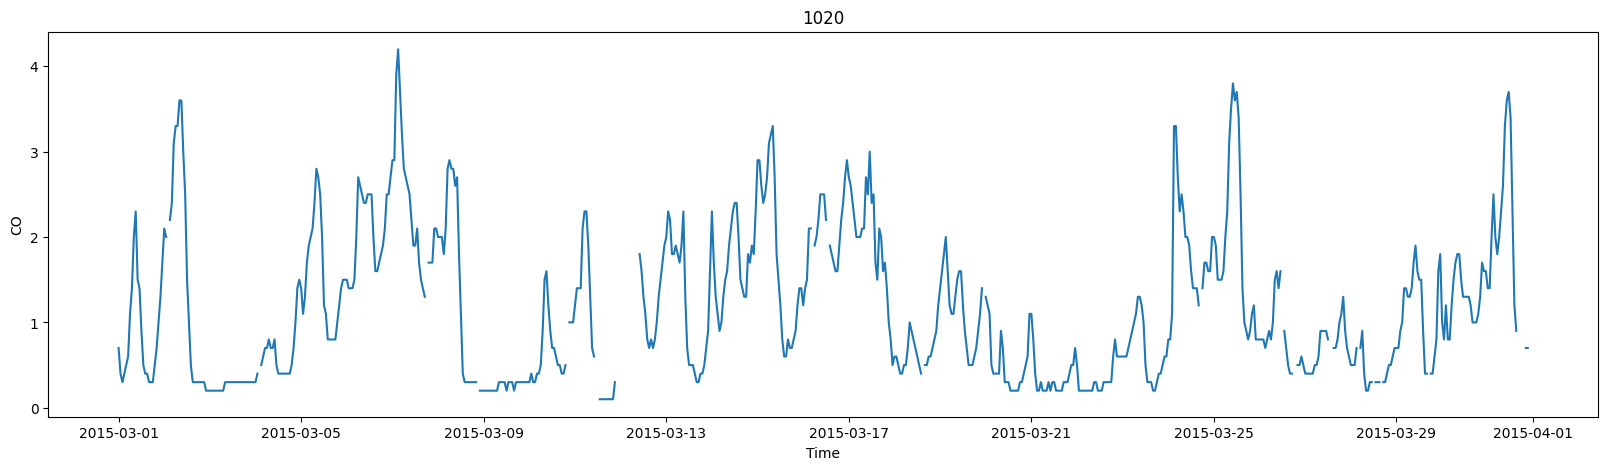

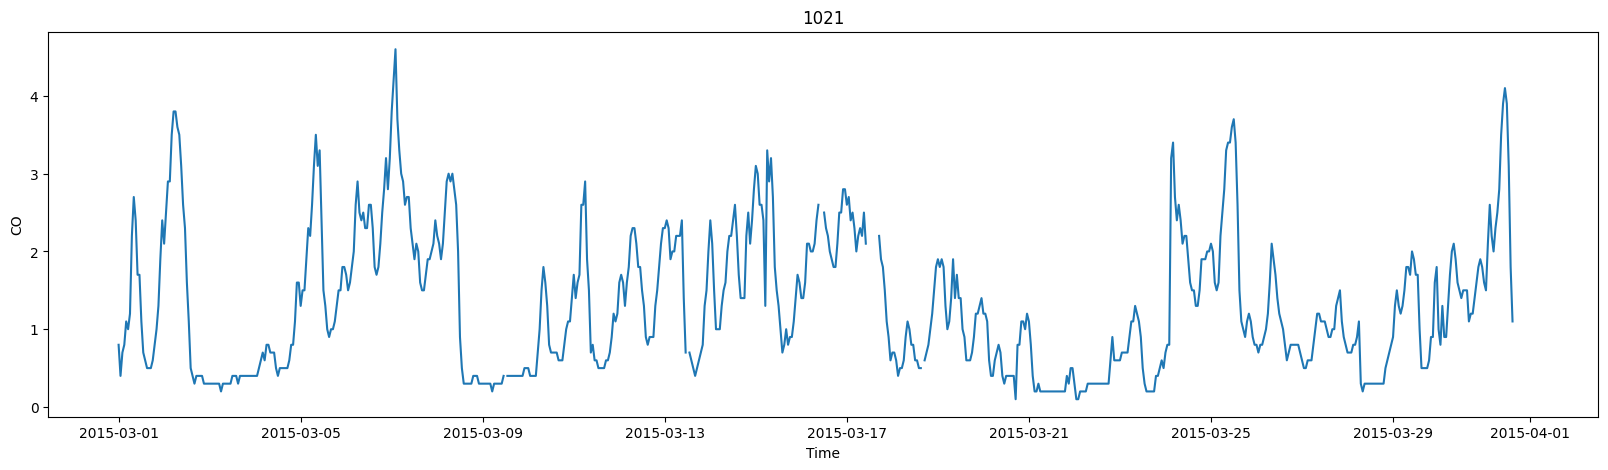

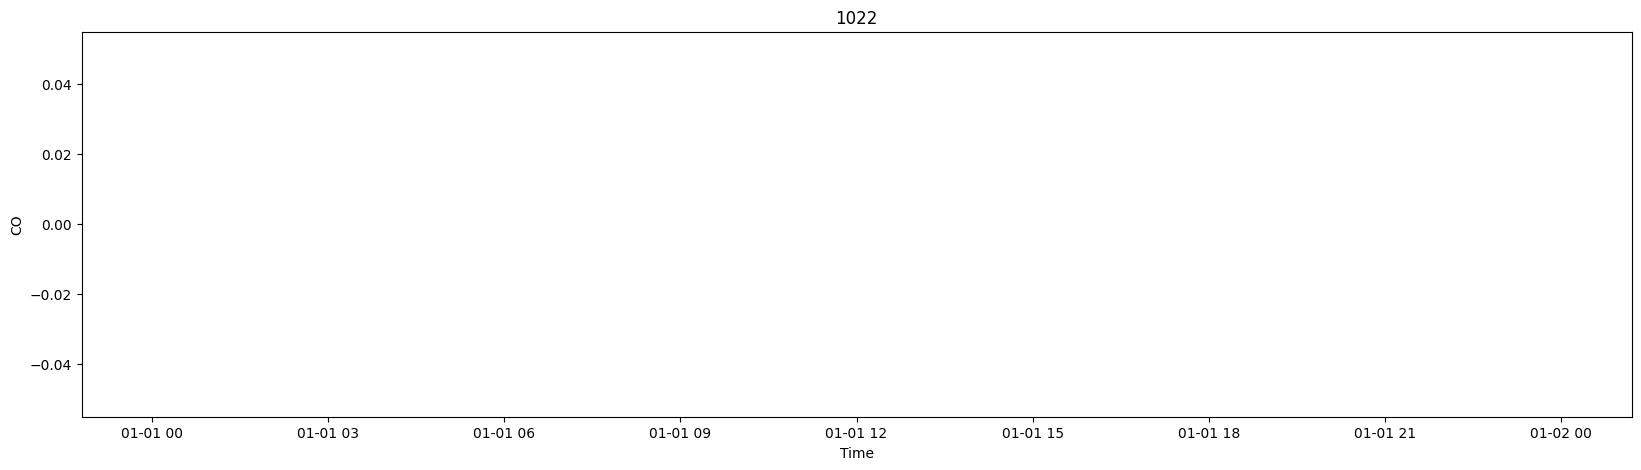

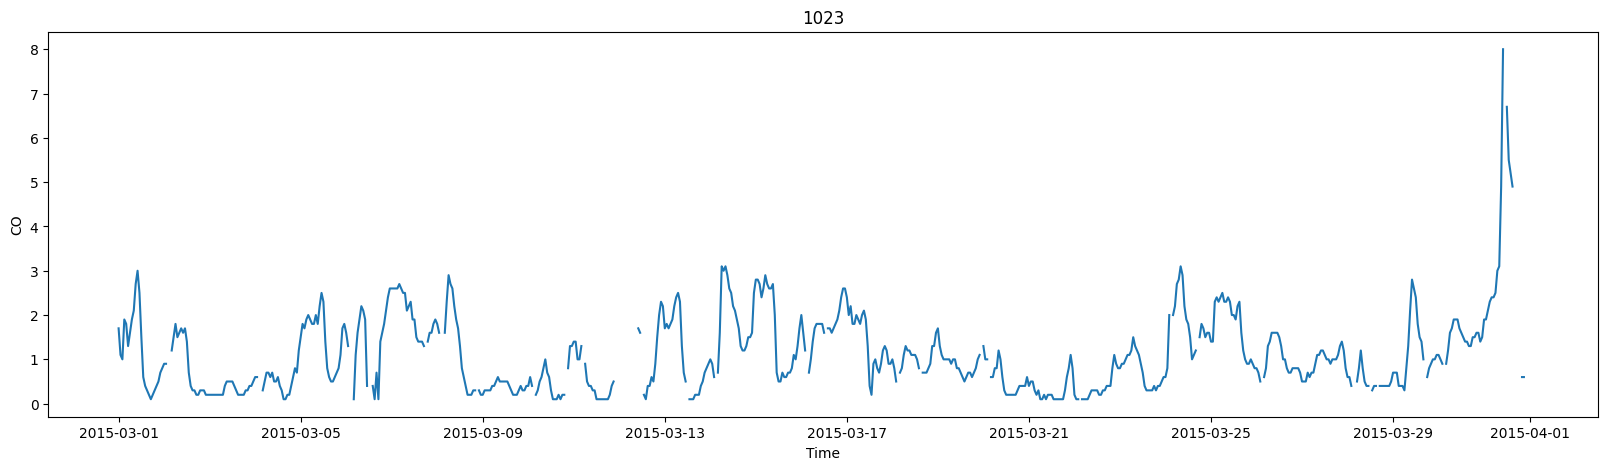

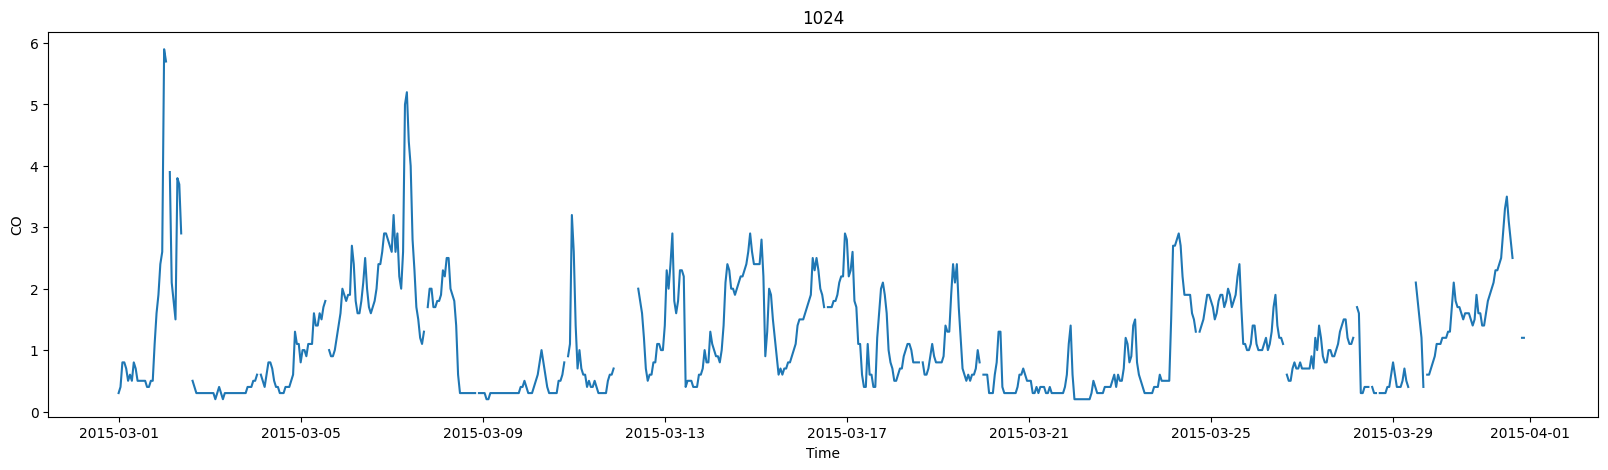

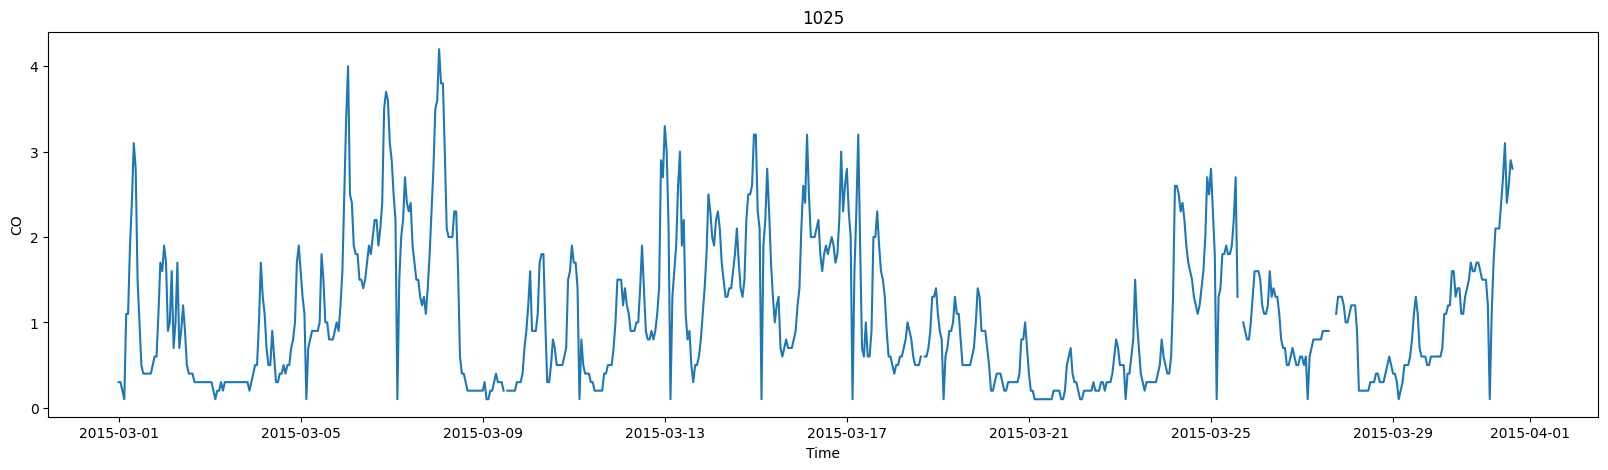

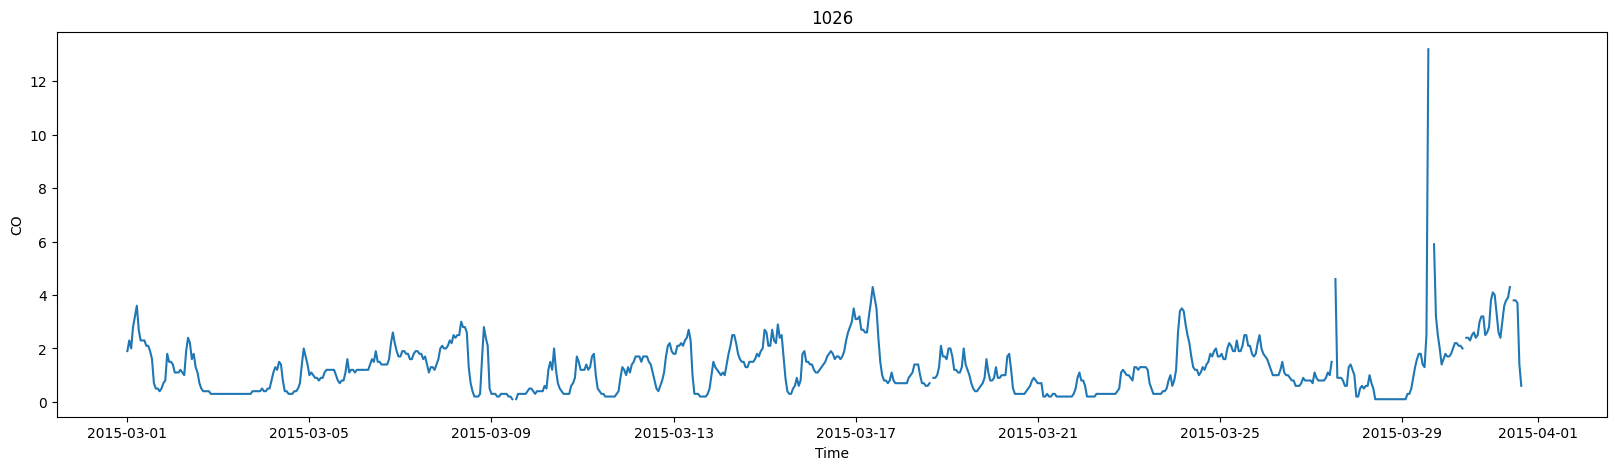

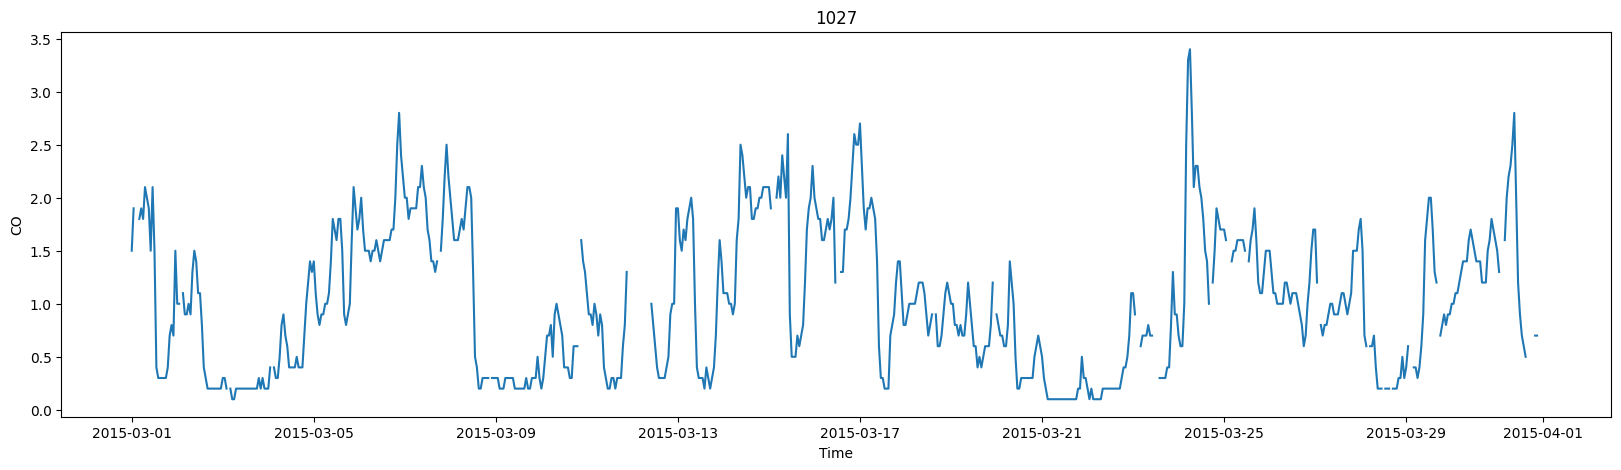

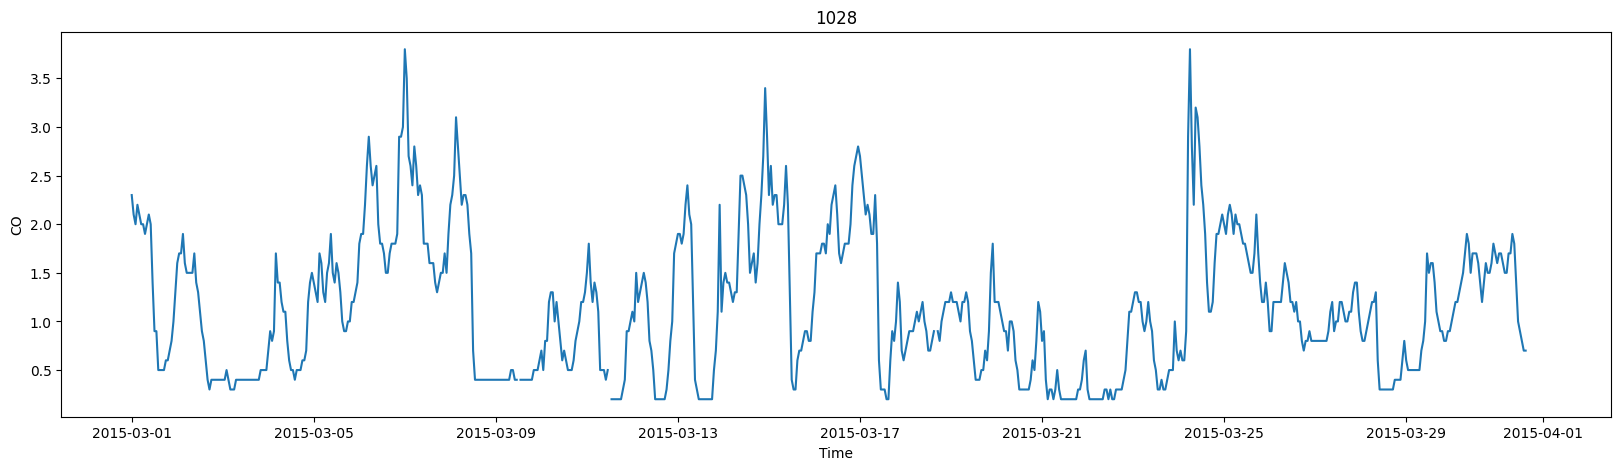

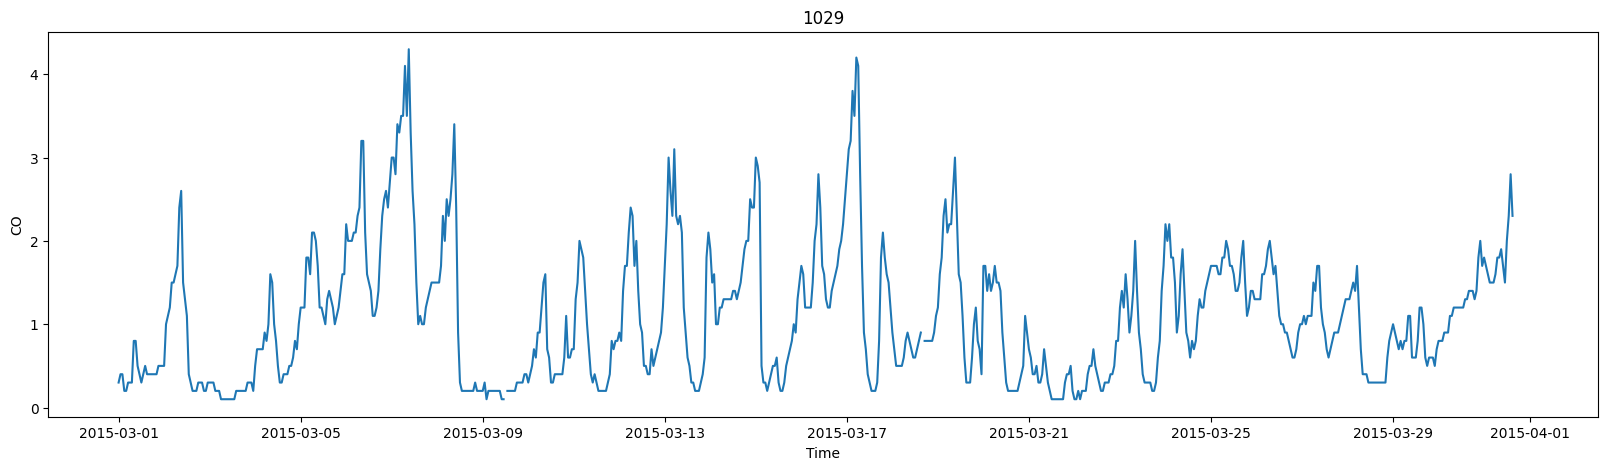

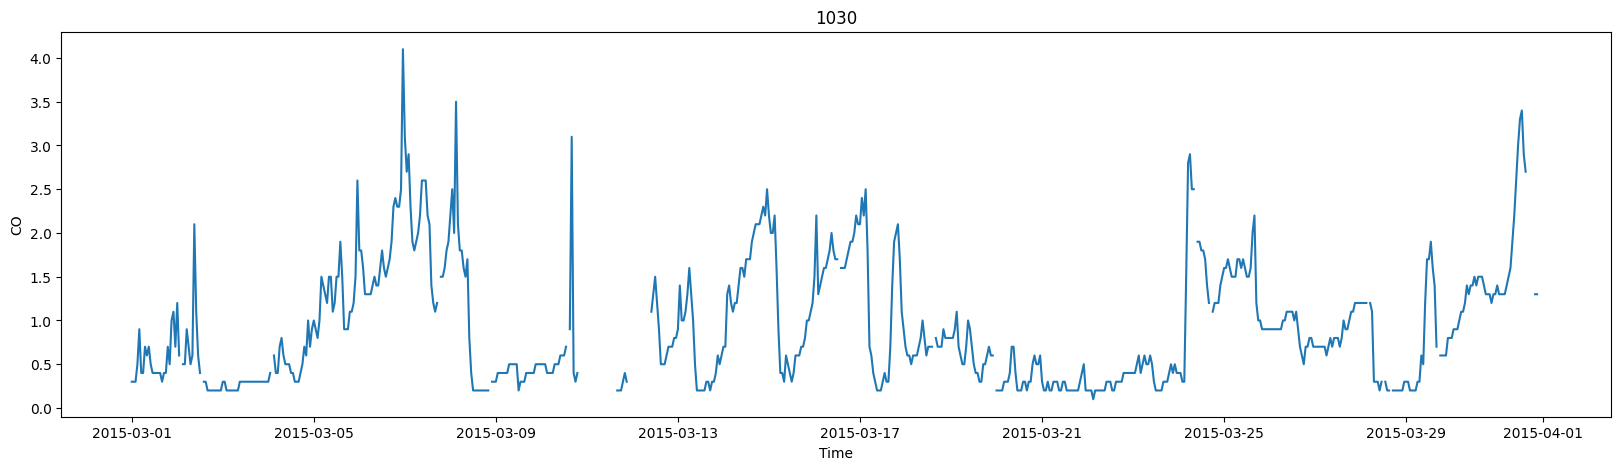

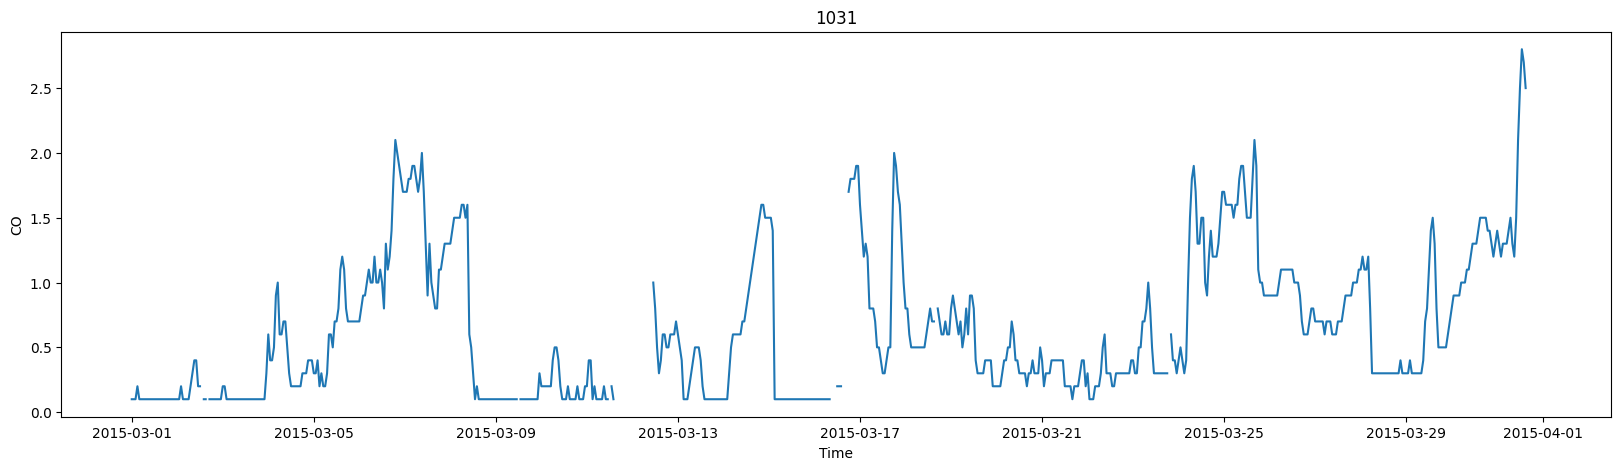

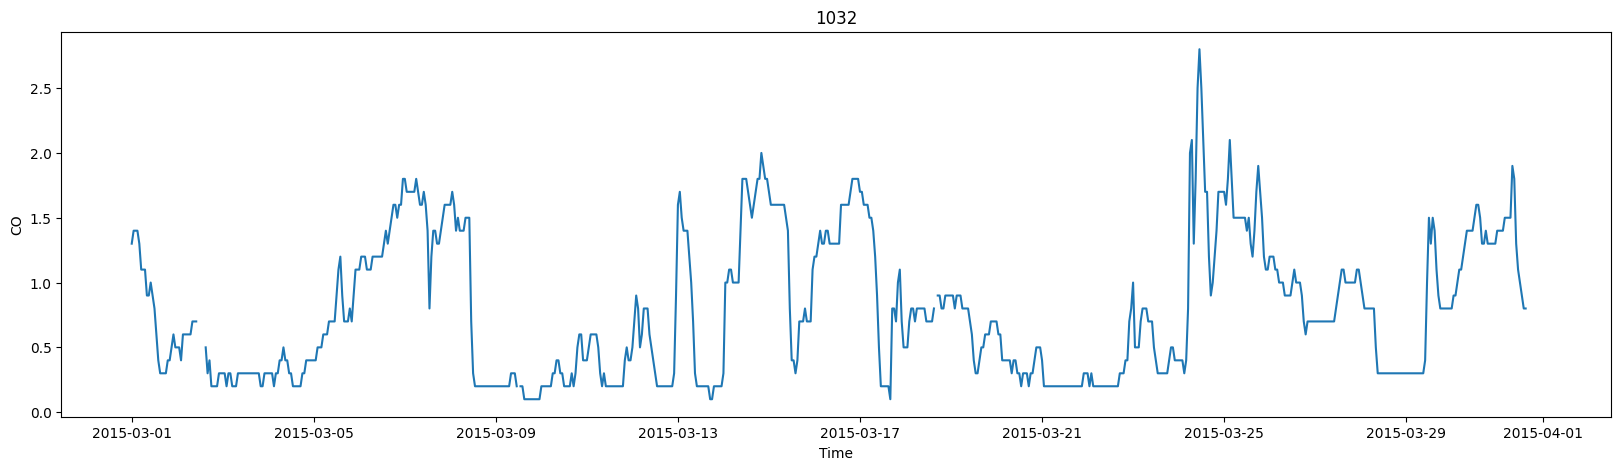

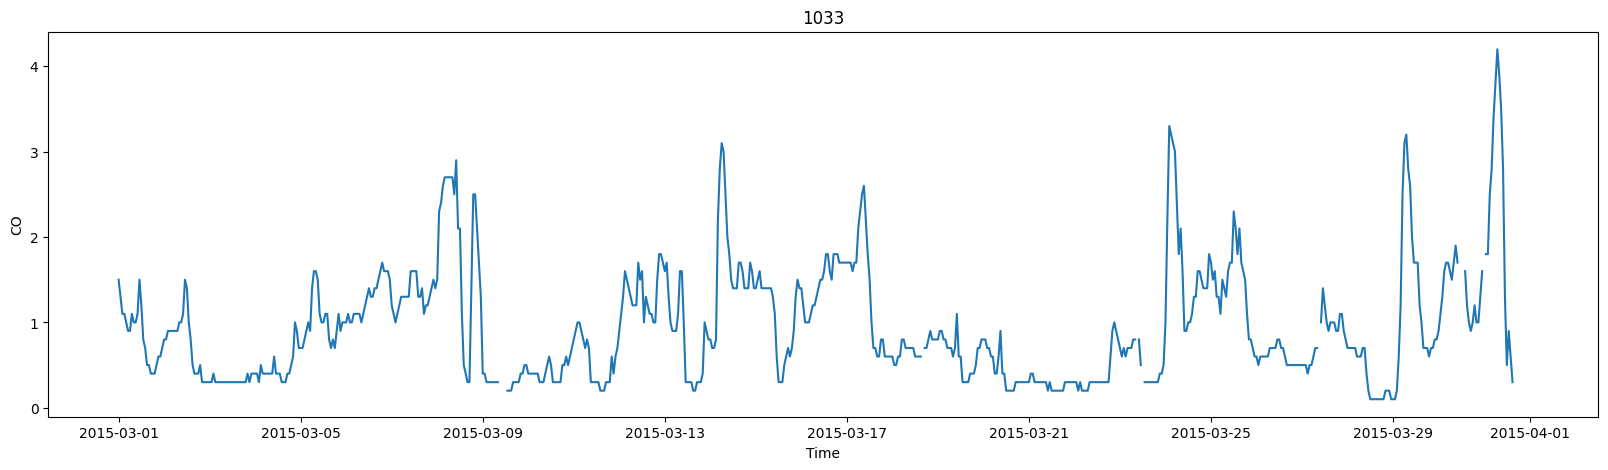

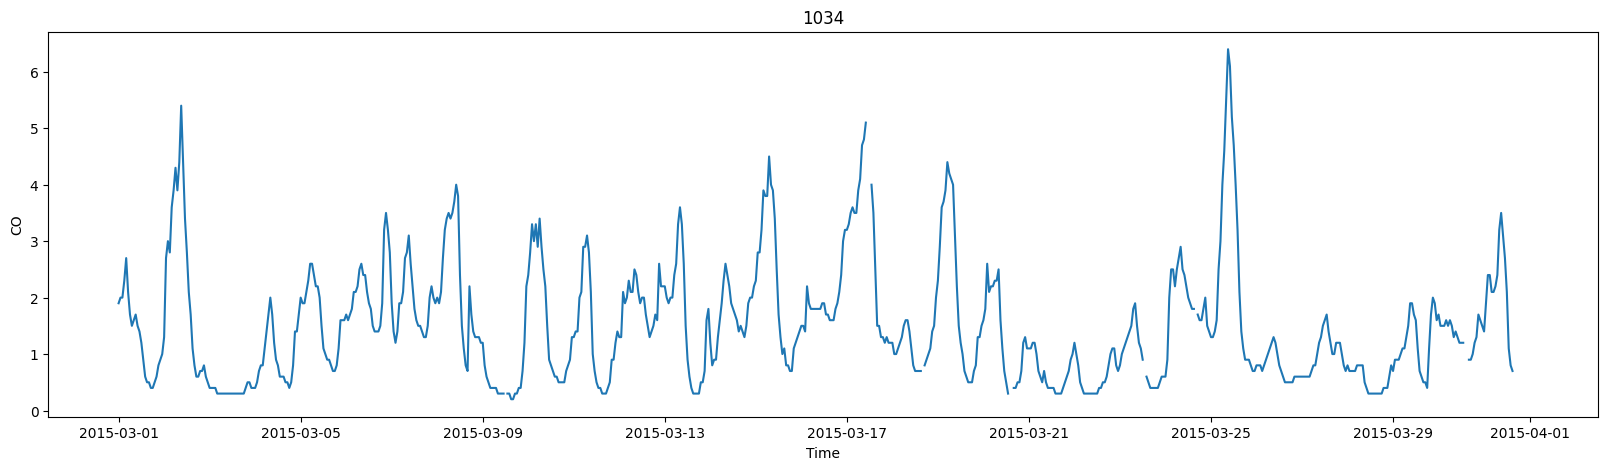

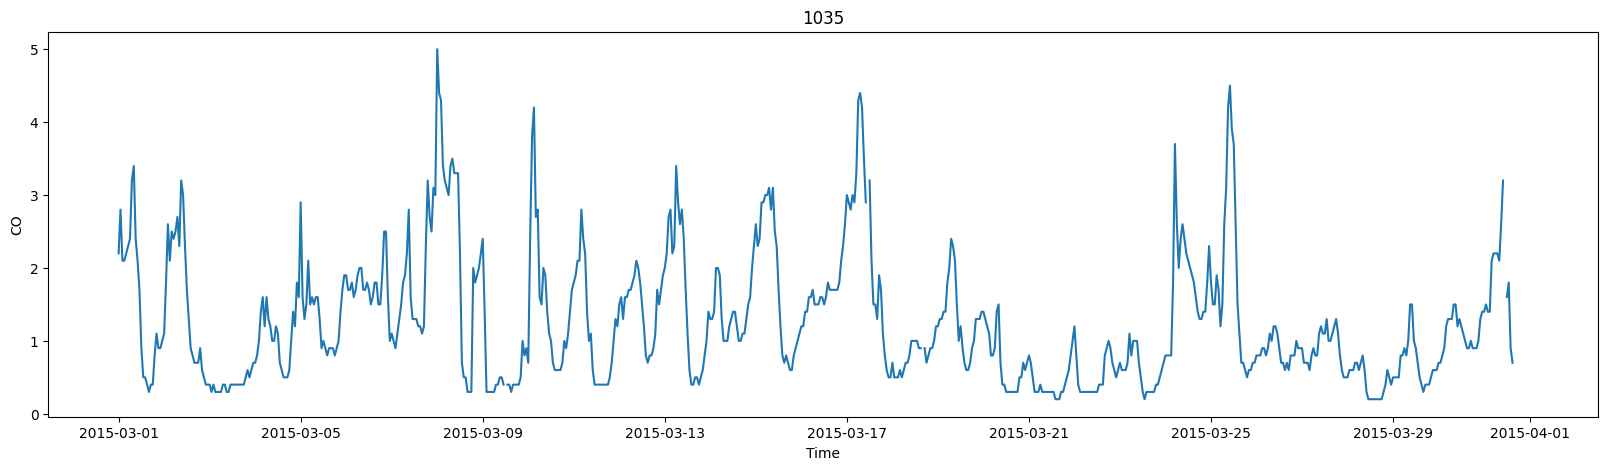

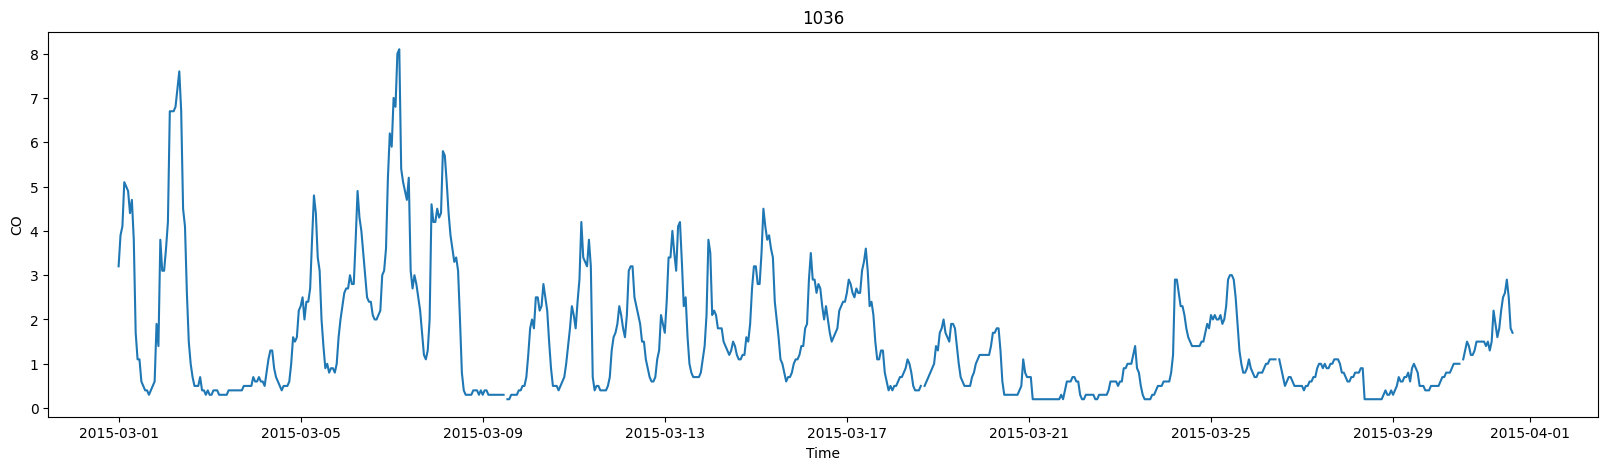

In [9]:
vars = ['CO_Concentration']#, 'weather', 'temperature', 'pressure', 'humidity', 'wind_speed', 'wind_direction']
for var in vars:    
    for m in range(3,4):
        values = []
        for station in beijing_stations.station_id:
            tmp_df = beijing_aq_plus_met[beijing_aq_plus_met.station_id==station]
            tmp_df['time'] = pd.to_datetime(tmp_df['time']).values
            tmp_df = tmp_df.set_index('time')['2015-'+str(m).zfill(2)]
        #     print(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
#             values.append(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
        #     break
            plt.figure(figsize=(20,5));
#             plt.plot(beijing_stations.station_id.values.astype(int), values);
            plt.title(str(station));
            plt.plot(tmp_df.index, tmp_df[var])
            plt.ylabel('CO')
            plt.xlabel('Time')
#             plt.xticks(beijing_stations.station_id)
#             plt.grid(True)